In [4]:
import torch
import torchvision

import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.optim import SGD

ImportError: cannot import name 'trainset' from 'torchvision' (C:\Users\Dima\AppData\Roaming\Python\Python312\site-packages\torchvision\__init__.py)

In [2]:
class MnistSoftMaxModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Linear(784, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.linear(x)
        x = F.softmax(x)

        return x

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 100
train_set = torchvision.datasets.MNIST(root='./data/', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data/', train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [53]:
# model
model = MnistSoftMaxModel()

# loss
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = SGD(model.parameters(), lr=0.0001, momentum=0.9)

for epoch in range(1000):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        labels_one_hot = F.one_hot(labels, 10).double()
        # Zero your gradients for every batch!
        optimizer.zero_grad()
    
        # output of model
        outputs = model(inputs)
        
        loss = loss_fn(outputs, labels_one_hot)
        loss.backward()
    
        optimizer.step()
        
        if i % 200 == 0:
            print(i)
            print(loss.item())
            # print('w Grad', torch.sum((inputs * (outputs - labels)) / 5))
            # print('b Grad', torch.sum((outputs - labels) / 5))
            print('---------')

C:\Users\Dima\AppData\Local\Temp\ipykernel_2368\3967903500.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


0
2.3138892889022826
---------
200
2.2926336312294007
---------
400
2.290330164432526
---------
0
2.2836022174358366
---------
200
2.2538938903808594
---------
400
2.238218981027603
---------
0
2.205208455324173
---------
200
2.1891130793094633
---------
400
2.1785319125652314
---------
0
2.0665756940841673
---------
200
2.1012123930454254
---------
400
2.1392406749725343
---------
0
2.053177762031555
---------
200
2.069645388126373
---------
400
1.9670508849620818
---------
0
2.0536896204948425
---------
200
1.9637125790119172
---------
400
1.995987936258316
---------
0
2.016203203201294
---------
200
2.030771007537842
---------
400
2.023209578990936
---------
0
1.9361449837684632
---------
200
1.9543073391914367
---------
400
1.955080052614212
---------
0
2.0111150622367857
---------
200
1.9672338962554932
---------
400
1.962865480184555
---------
0
1.9869249260425568
---------
200
1.909036386013031
---------
400
1.962742758989334
---------
0
1.916891725063324
---------
200
1.9012405

In [59]:
all_test_inputs = None
all_test_labels = None

for j, data in enumerate(test_loader):
        inputs_test, labels_test = data 
        if all_test_inputs is None:
            all_test_inputs = inputs_test
            all_test_labels = labels_test
        else:
            all_test_inputs = torch.cat((all_test_inputs, inputs_test))
            all_test_labels = torch.cat((all_test_labels, labels_test))

In [ ]:
def plot(img, label, prediction):
    plt.title(str(label) + ' ' + str(prediction))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

C:\Users\Dima\AppData\Local\Temp\ipykernel_2368\3967903500.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


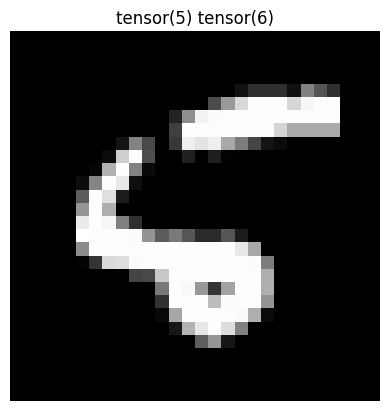

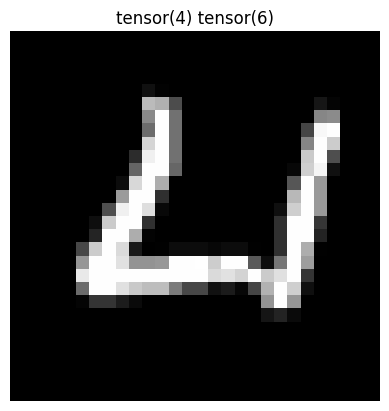

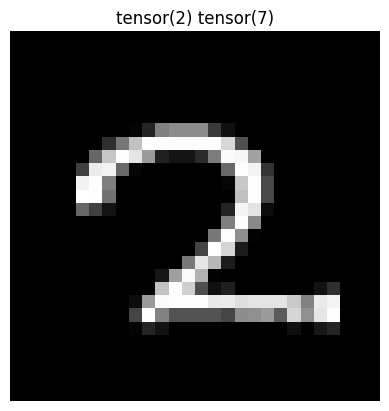

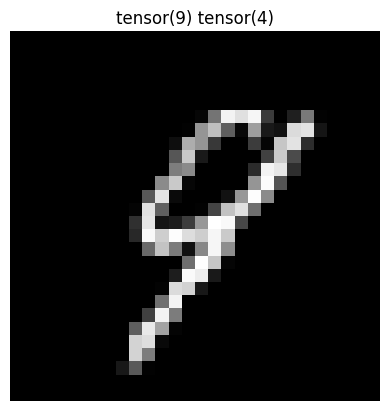

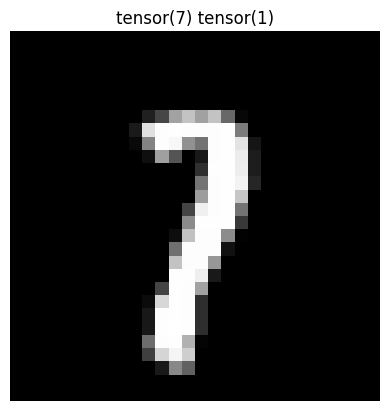

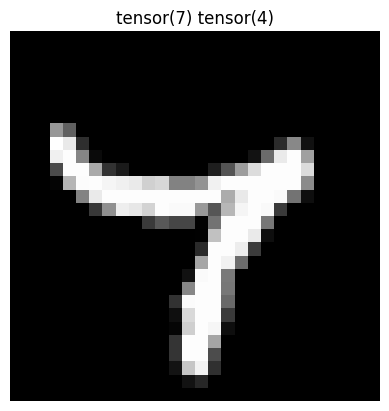

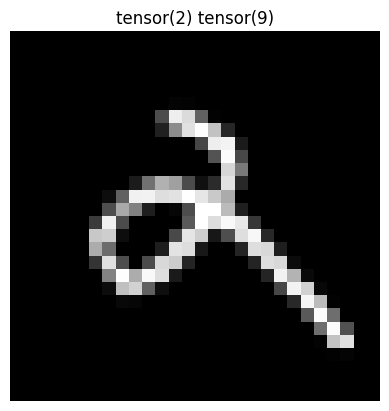

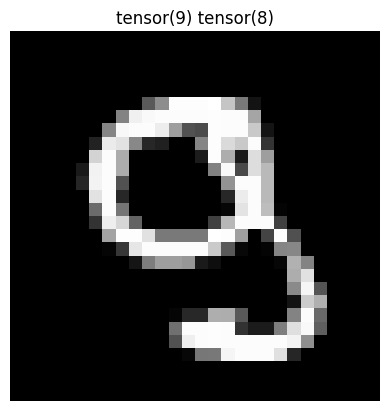

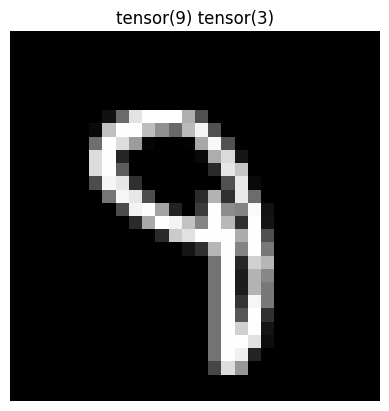

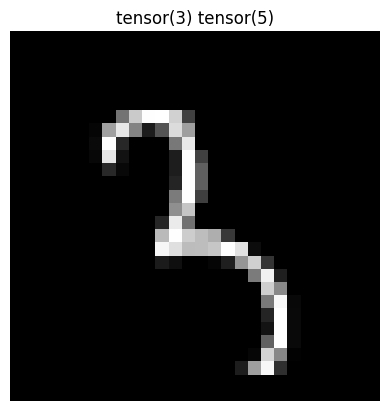

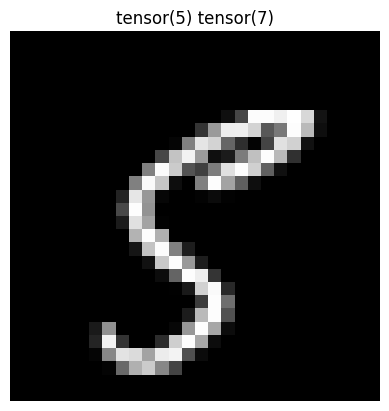

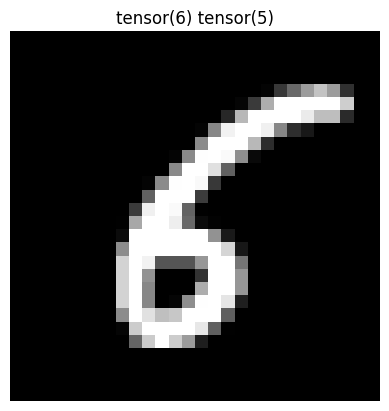

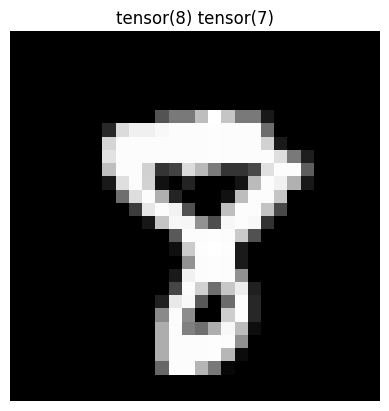

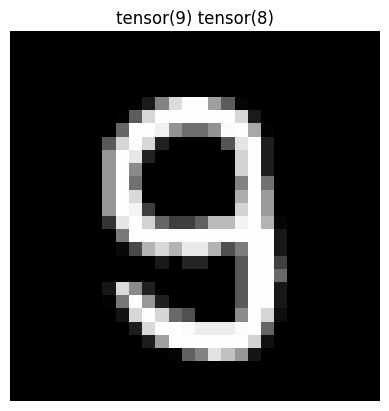

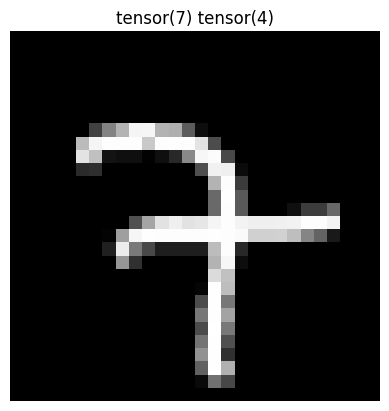

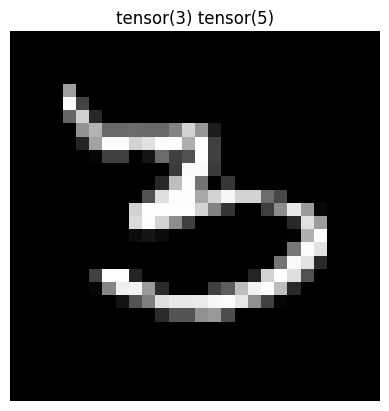

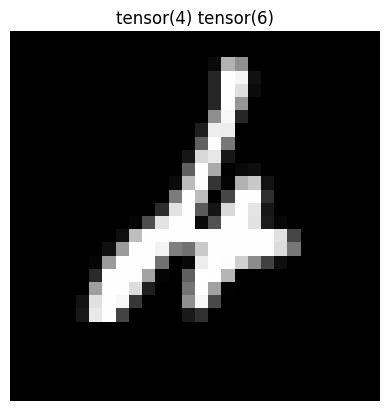

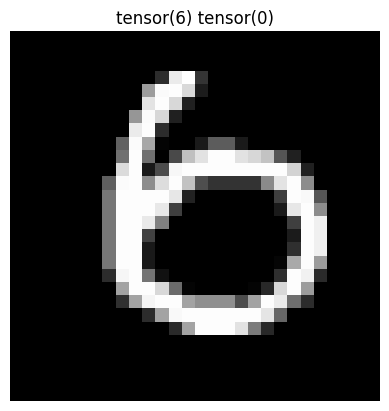

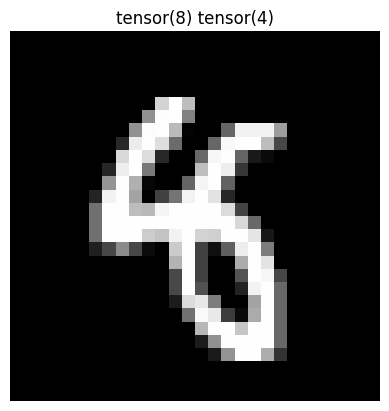

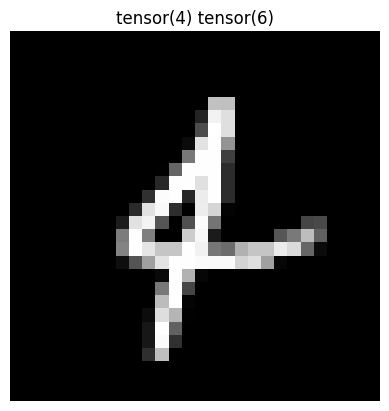

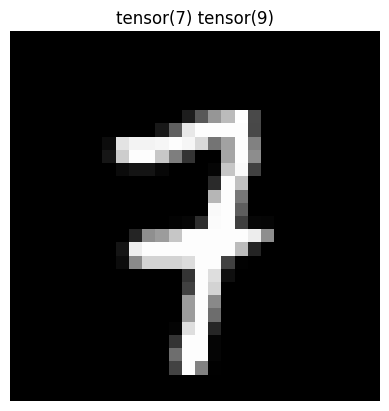

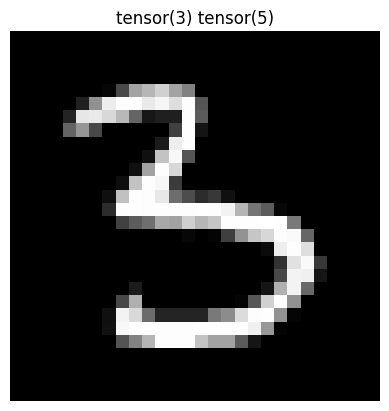

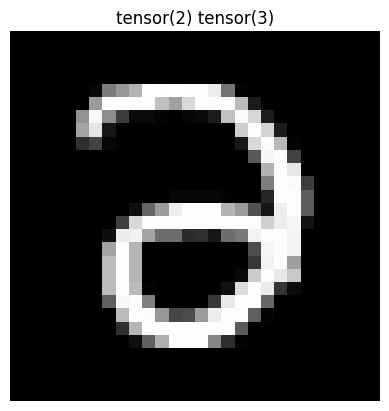

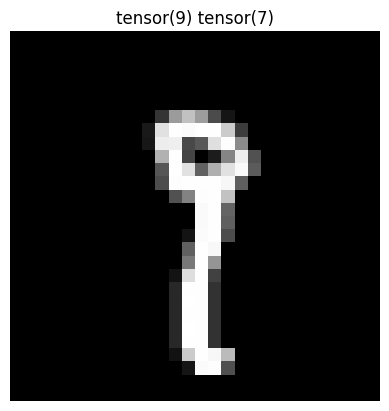

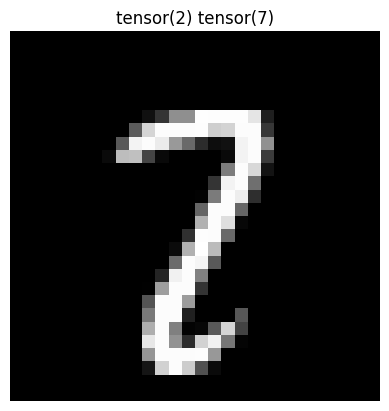

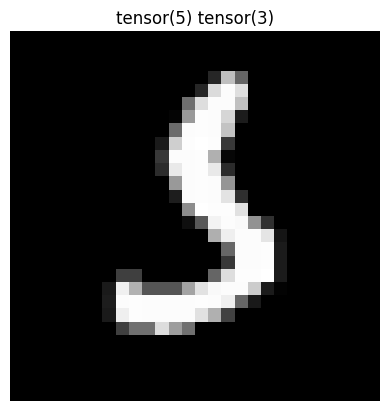

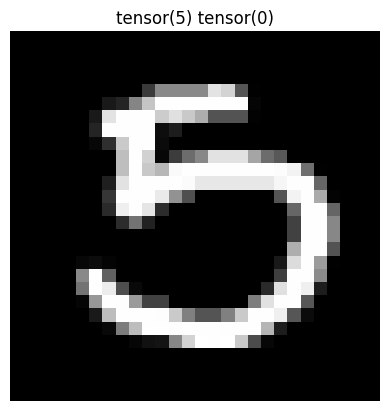

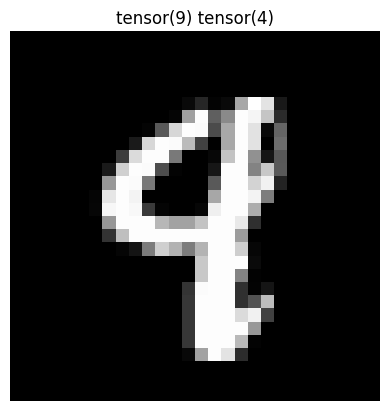

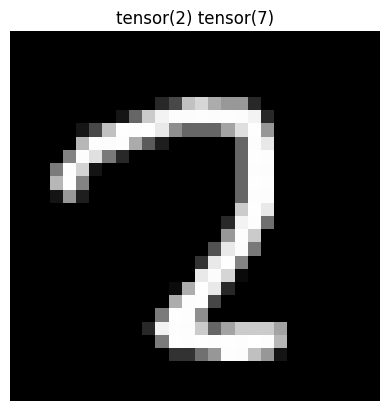

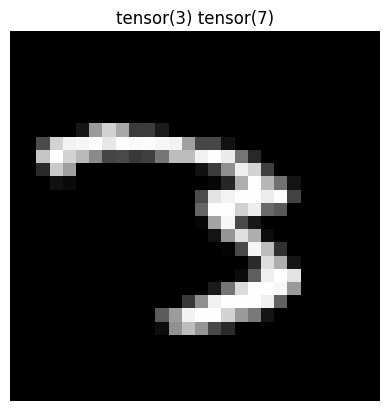

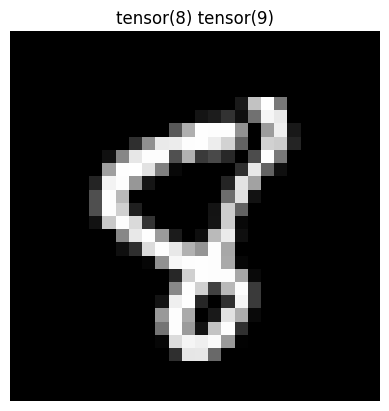

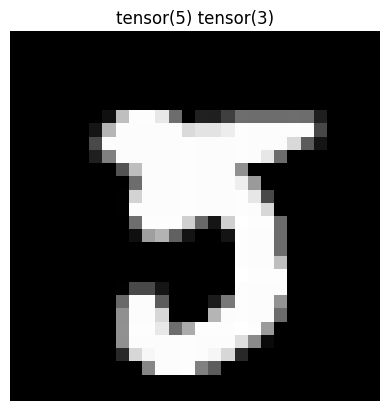

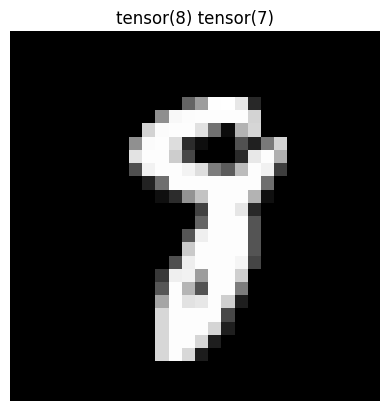

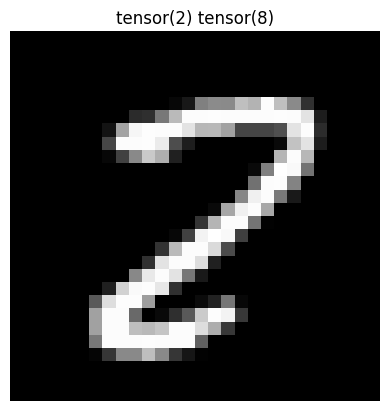

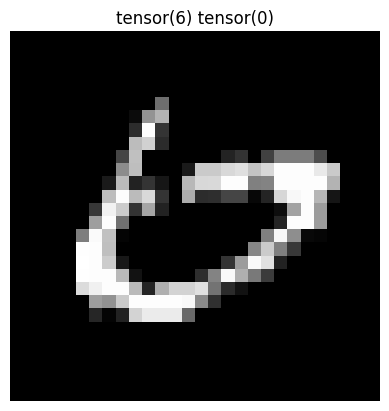

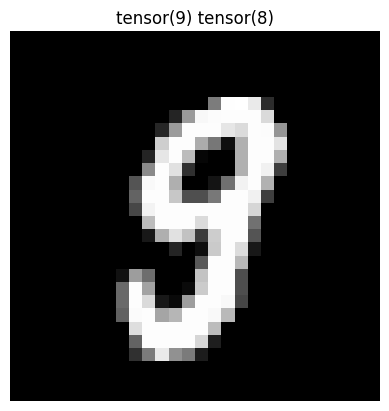

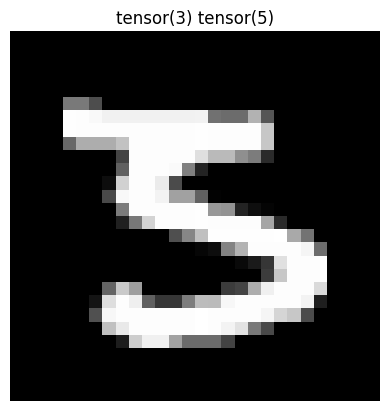

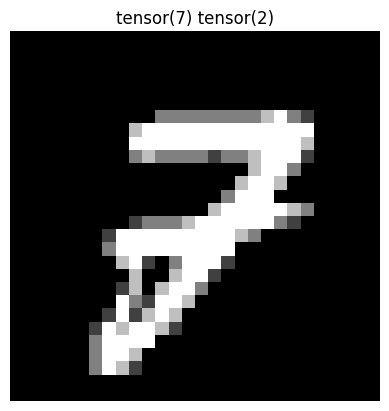

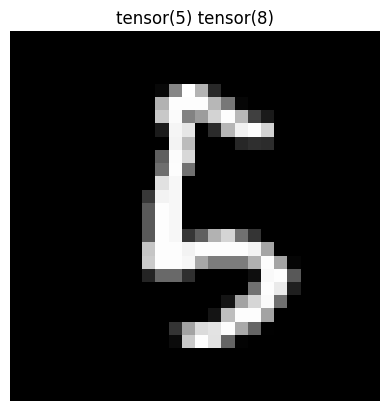

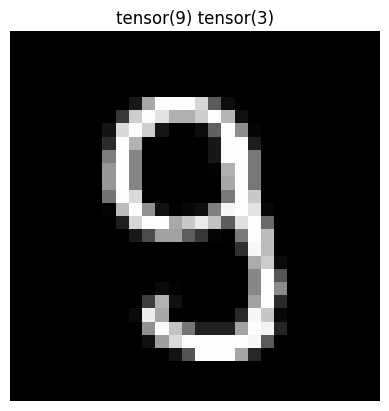

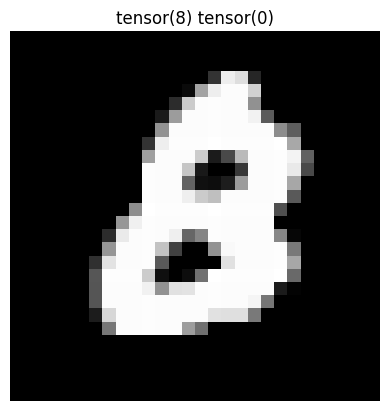

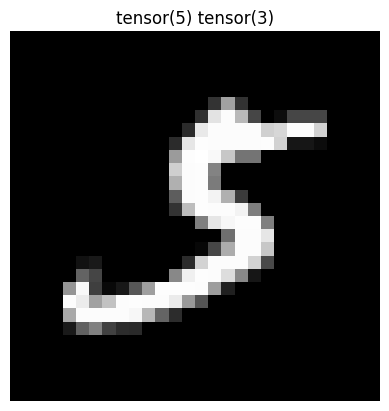

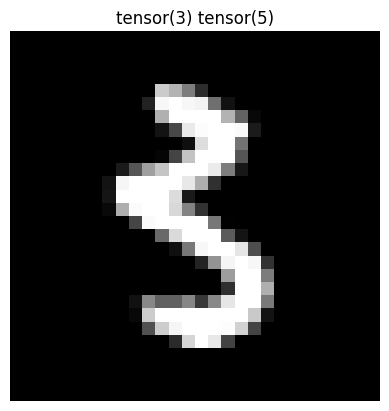

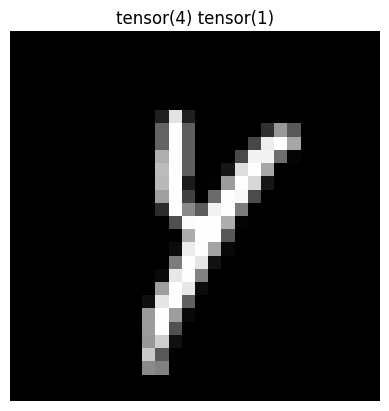

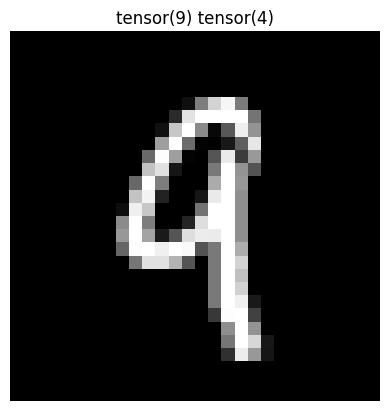

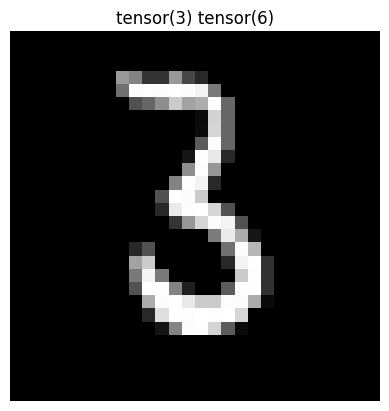

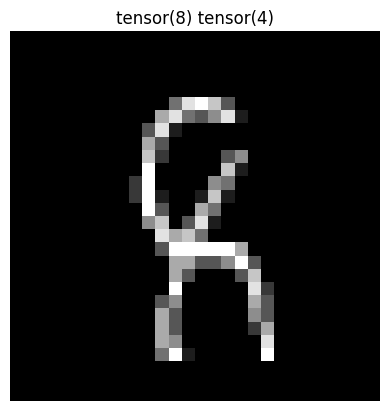

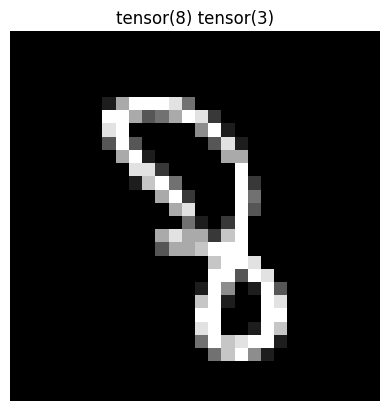

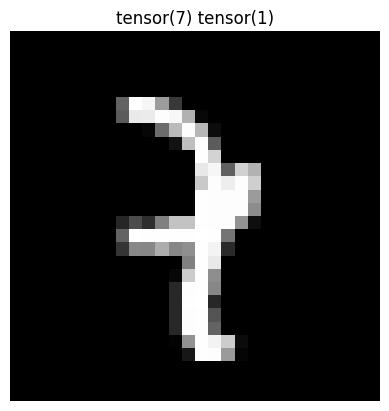

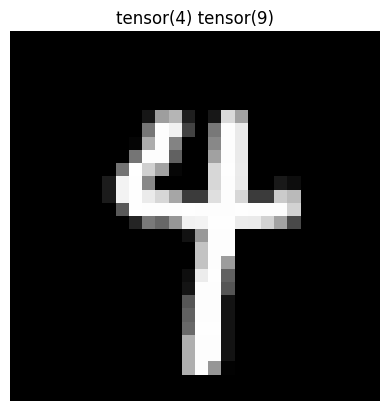

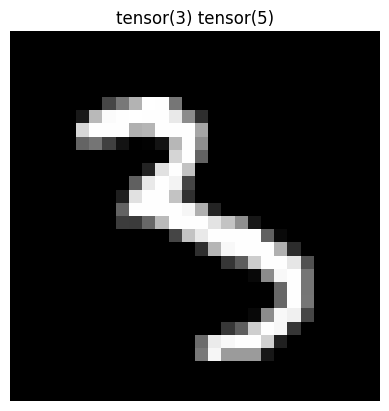

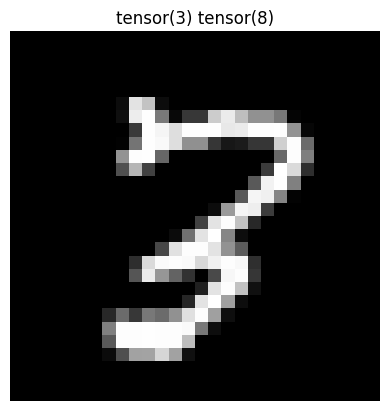

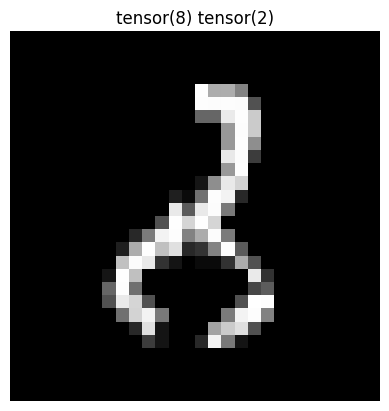

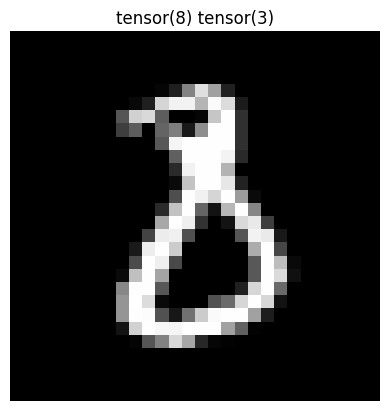

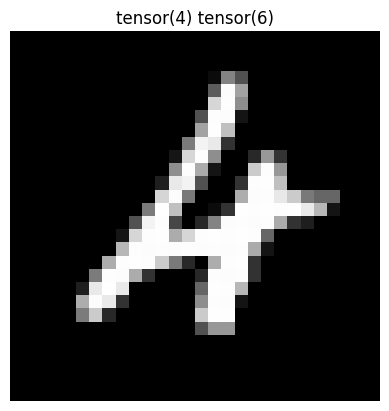

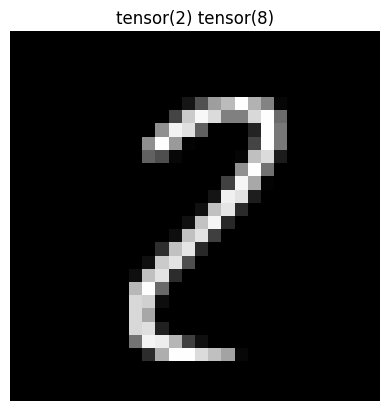

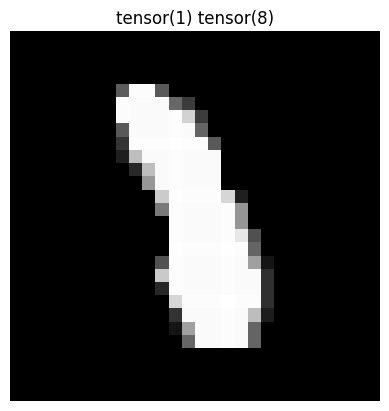

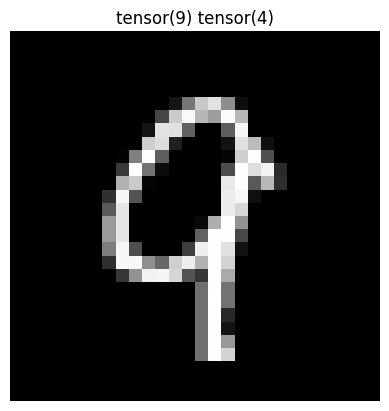

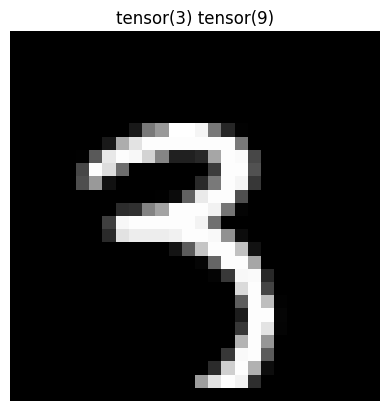

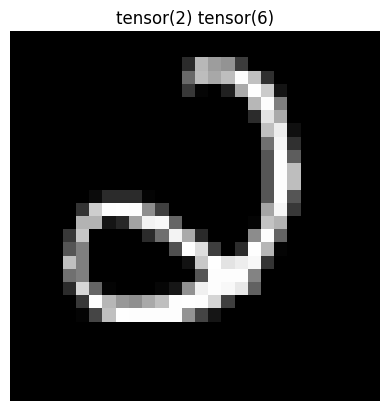

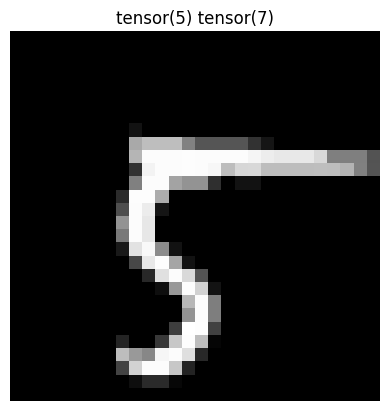

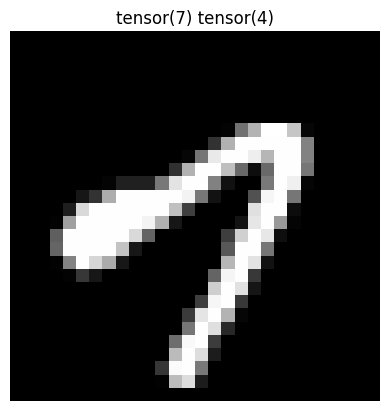

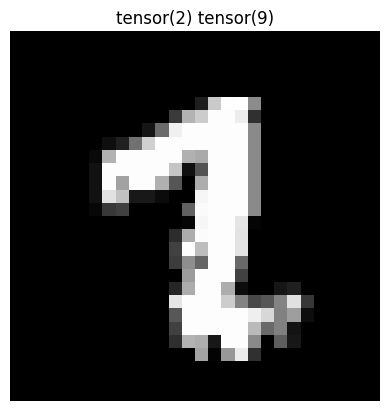

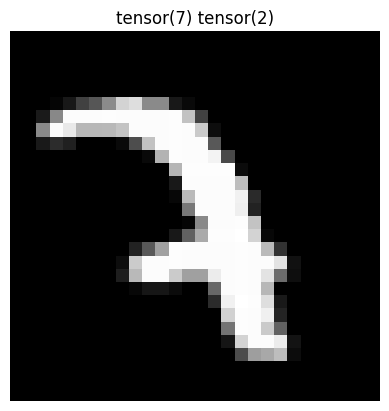

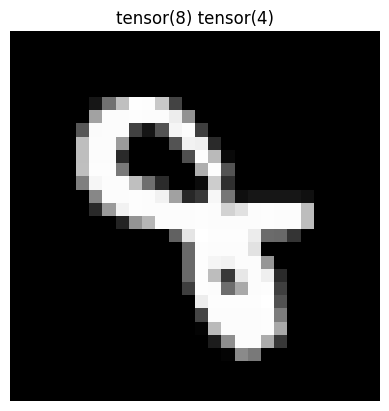

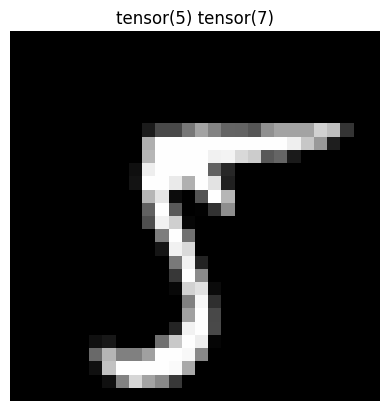

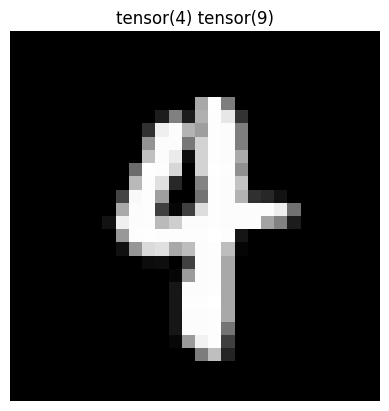

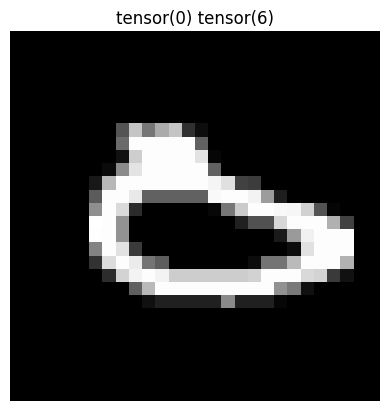

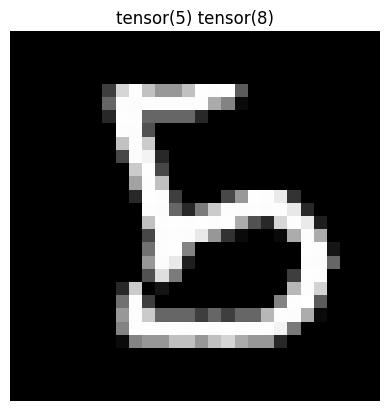

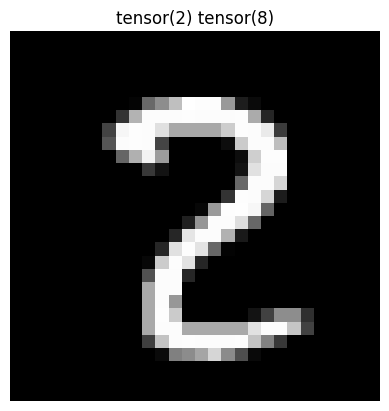

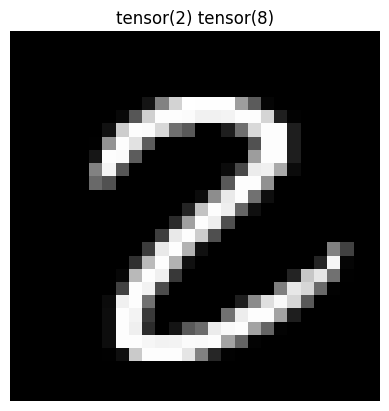

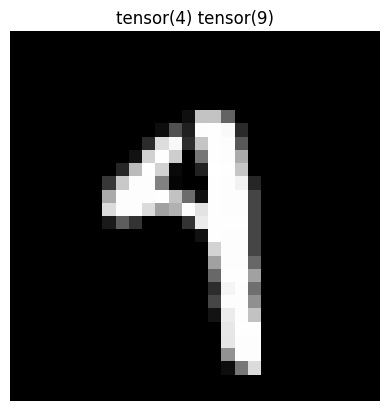

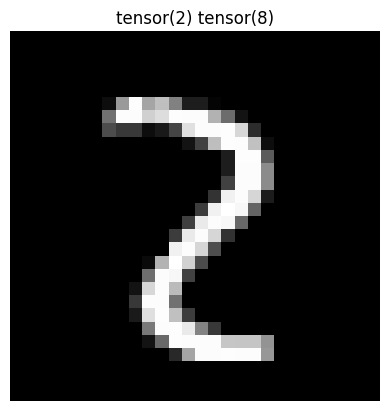

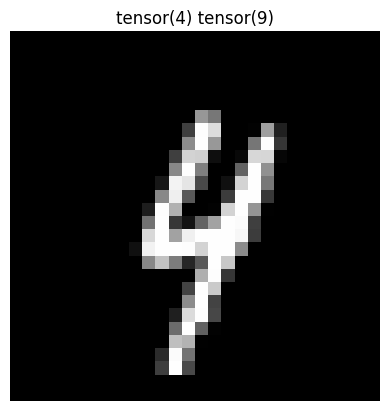

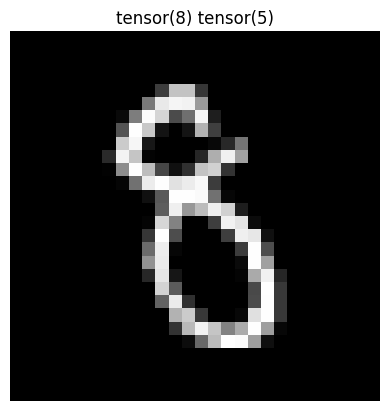

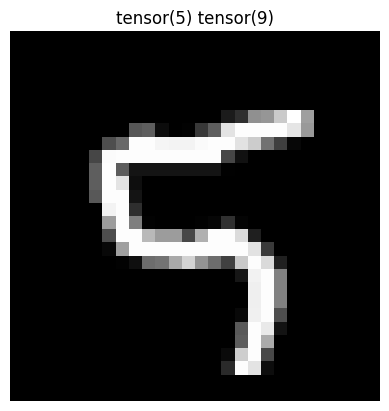

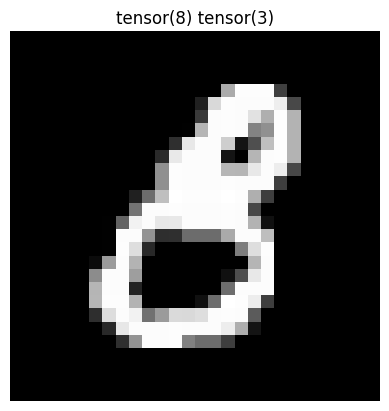

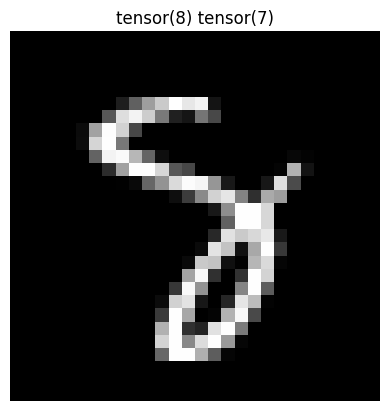

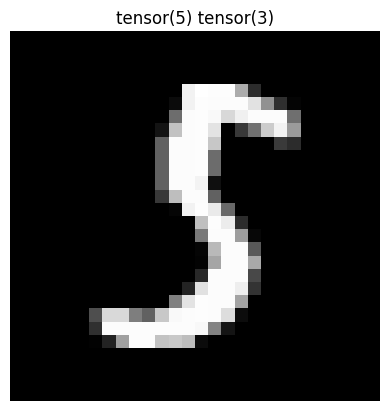

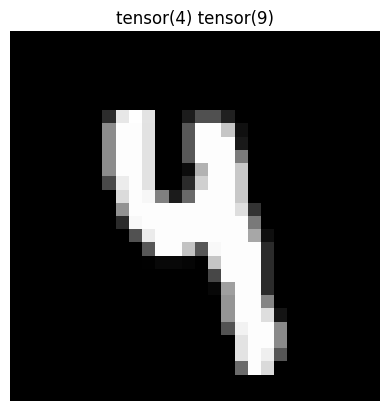

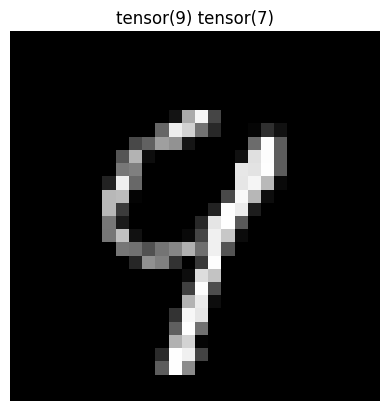

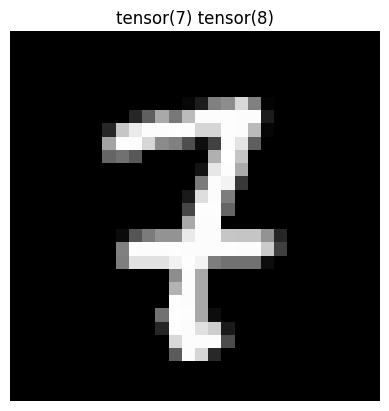

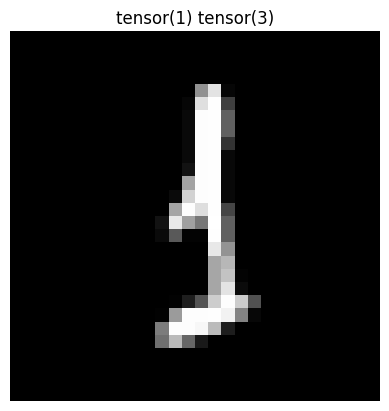

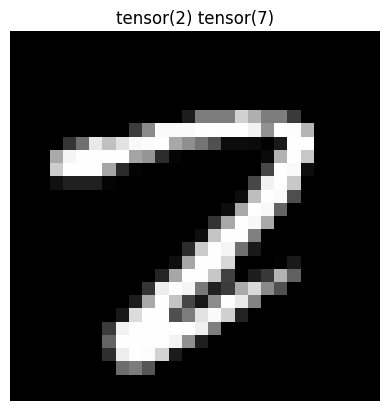

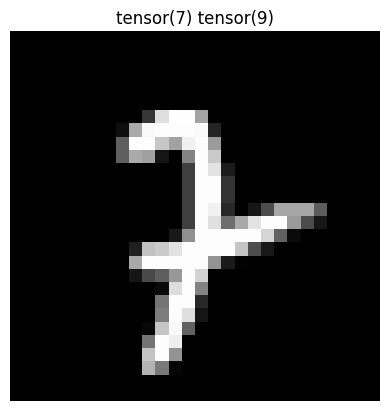

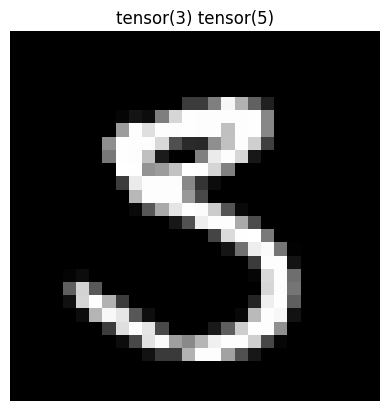

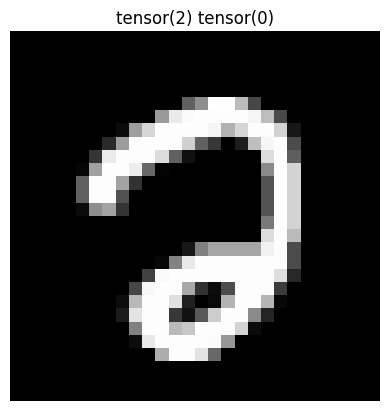

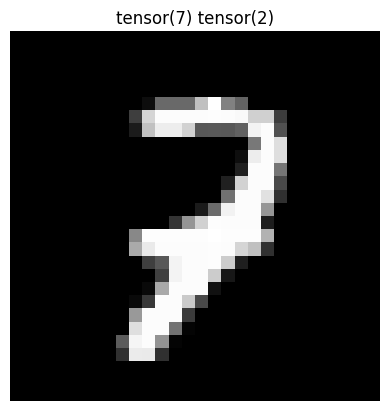

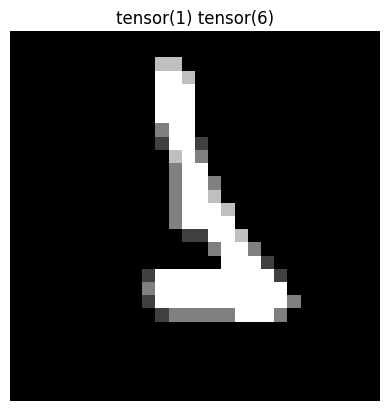

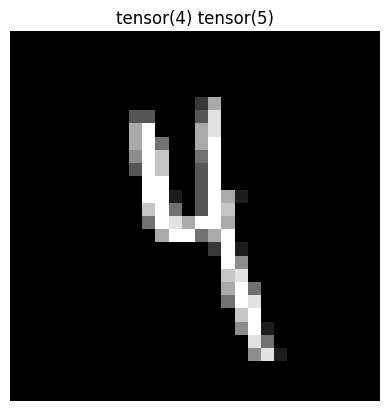

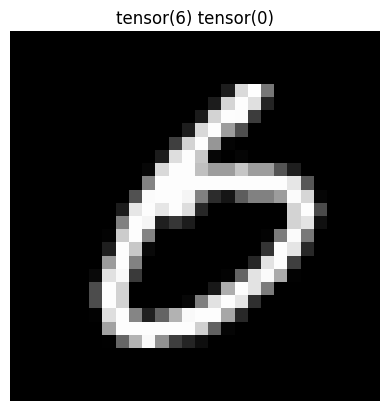

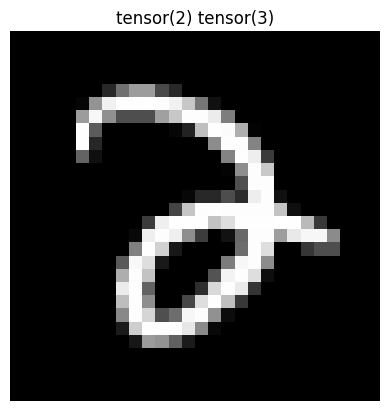

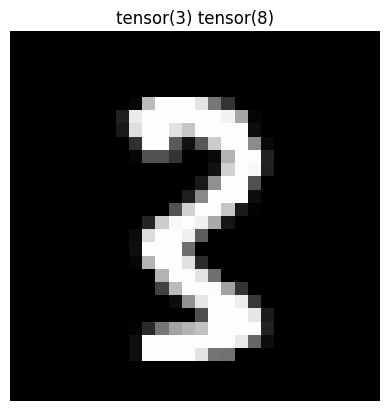

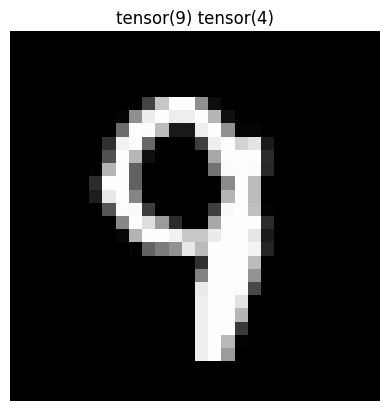

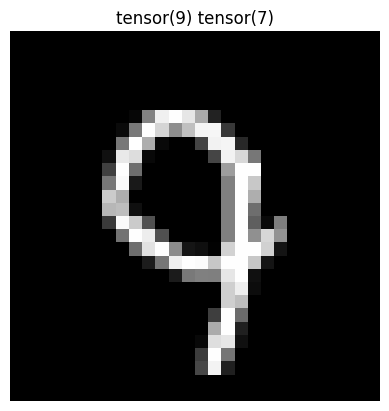

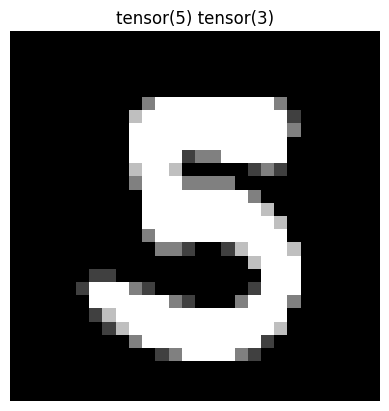

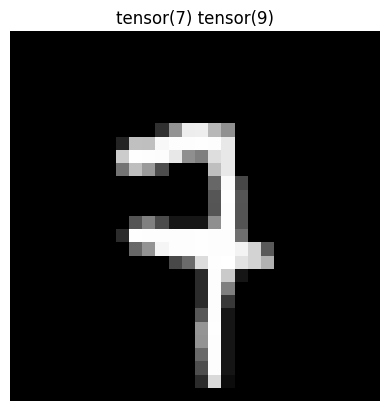

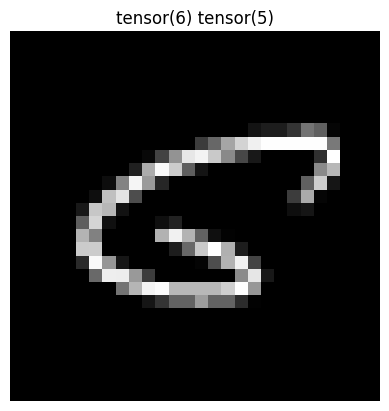

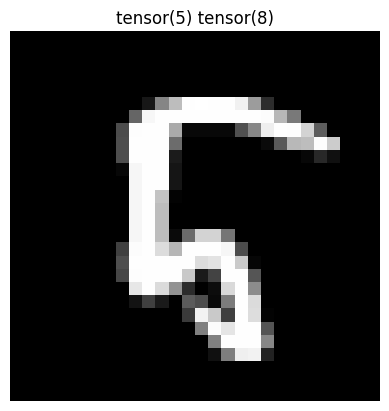

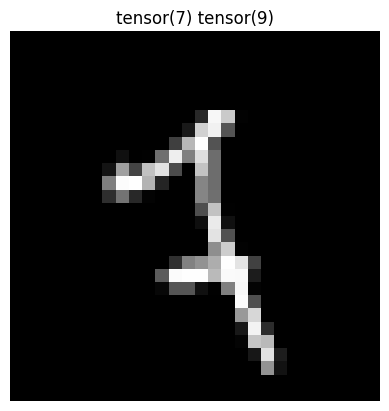

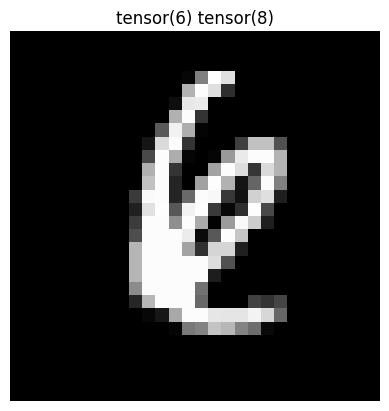

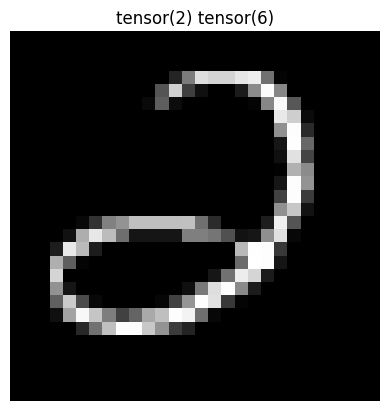

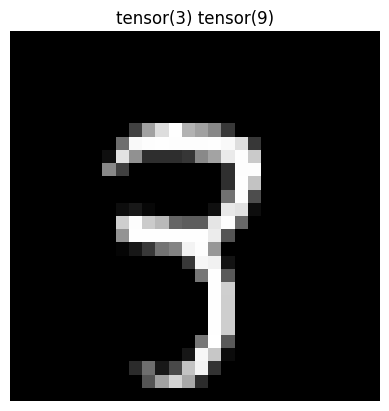

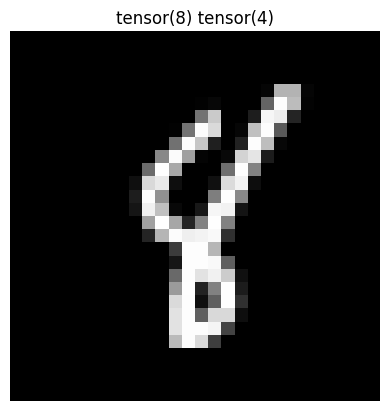

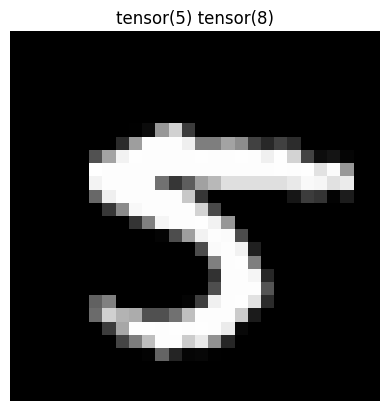

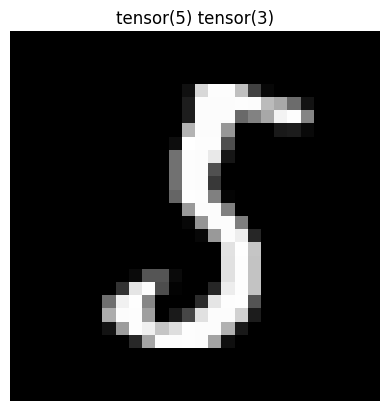

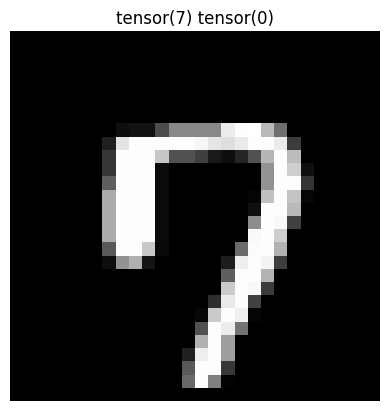

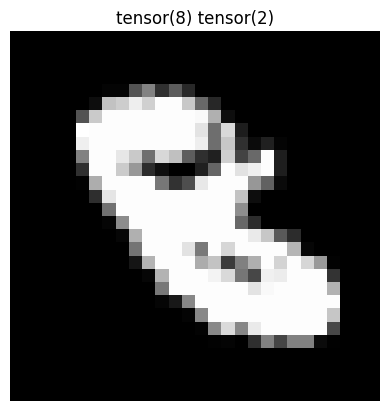

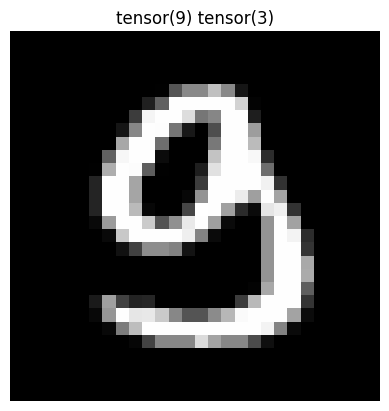

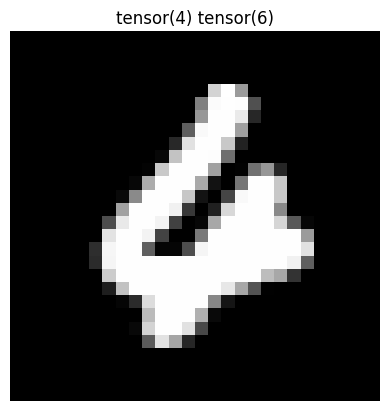

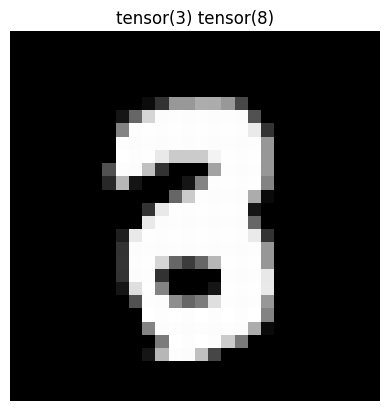

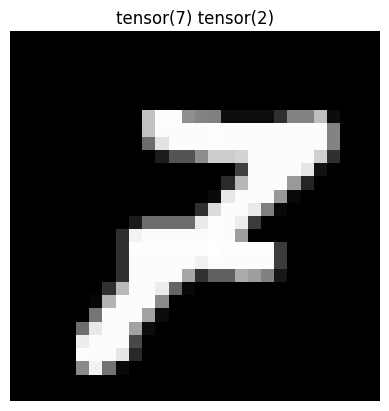

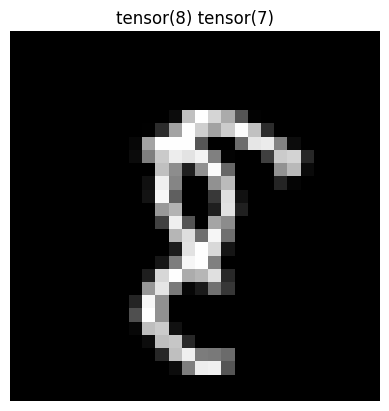

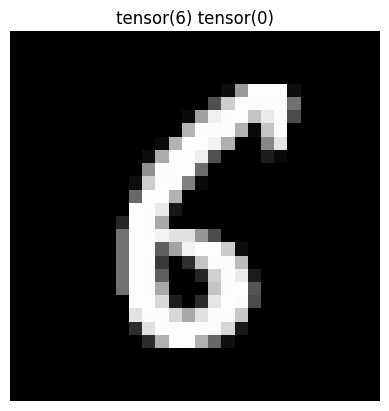

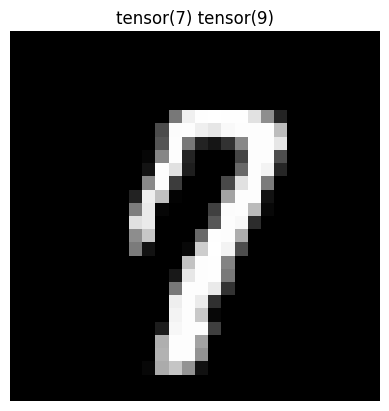

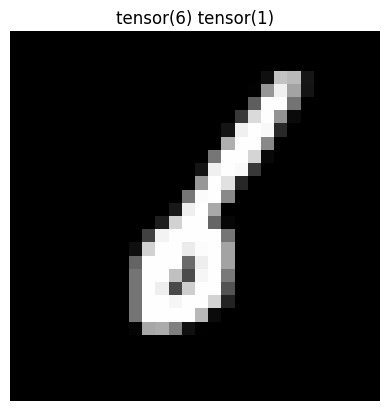

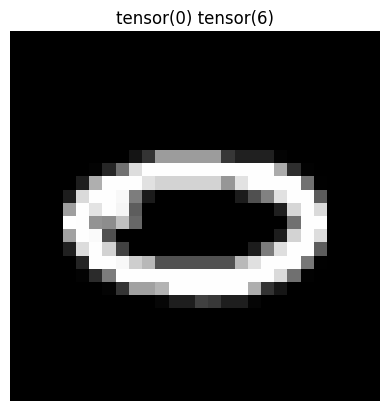

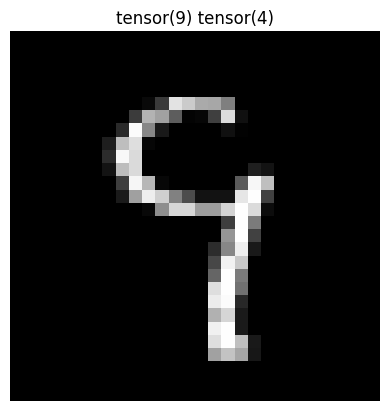

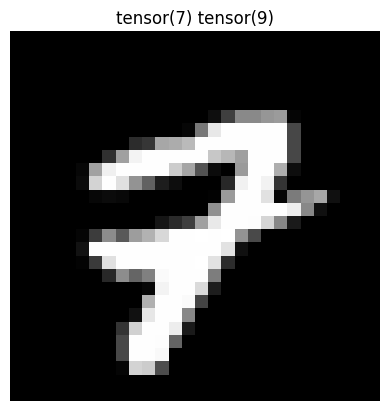

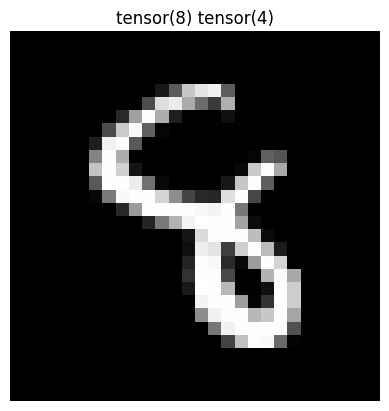

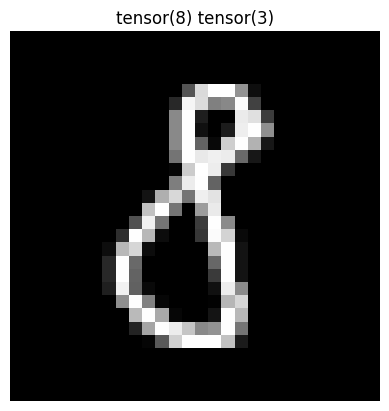

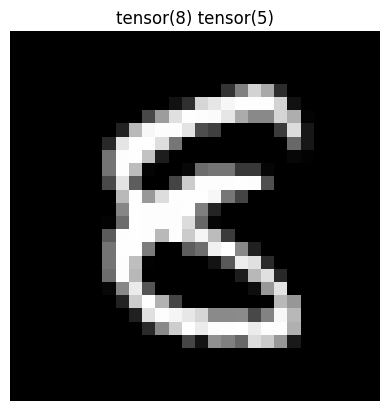

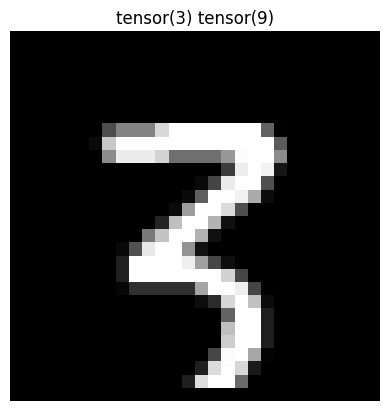

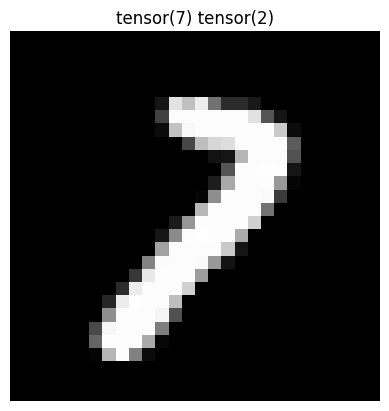

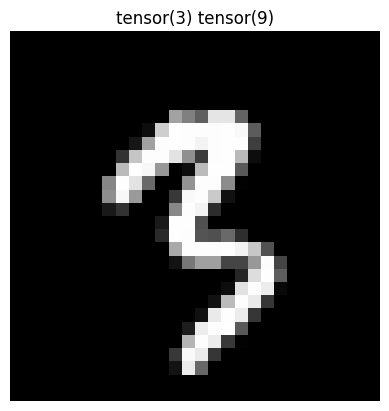

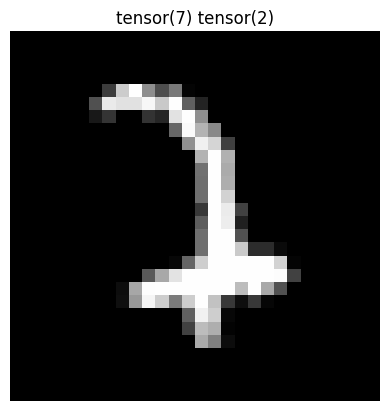

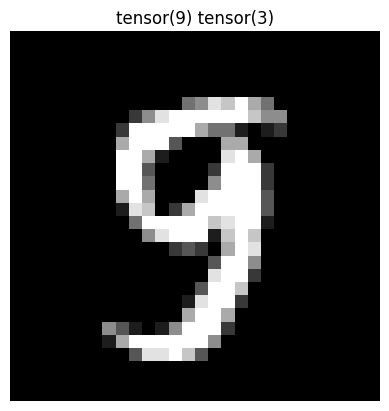

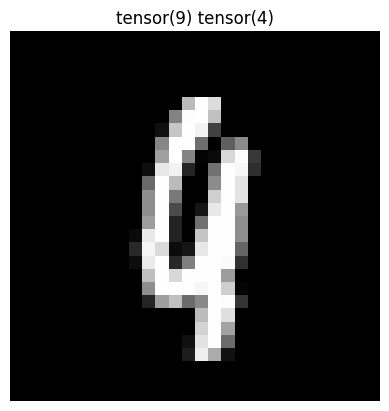

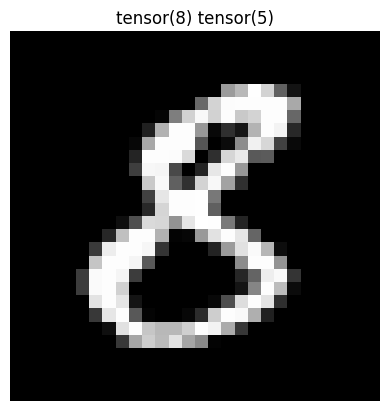

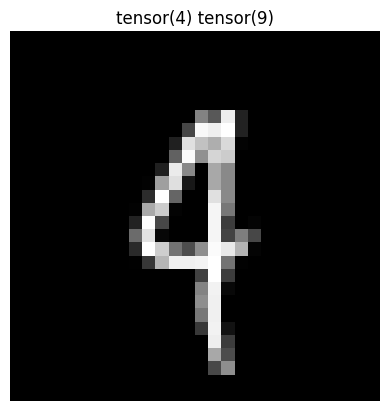

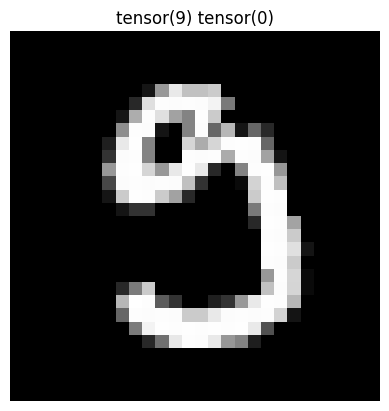

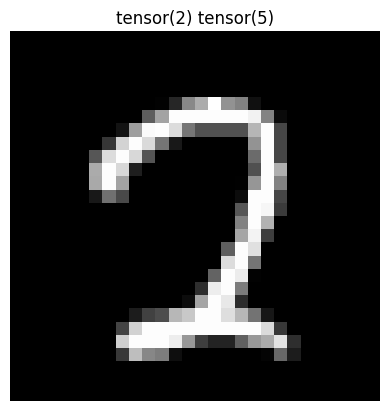

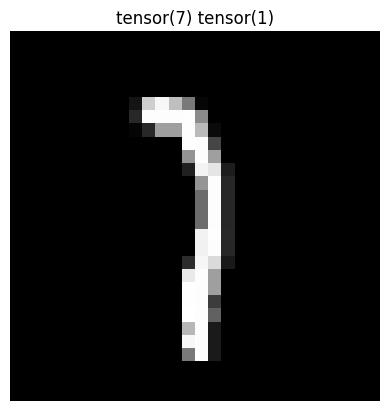

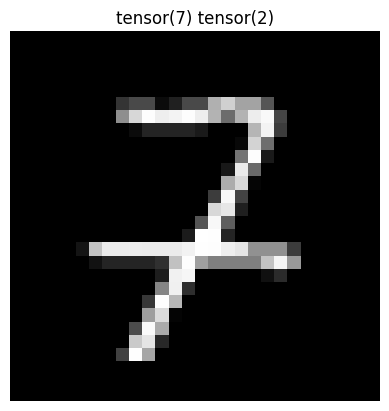

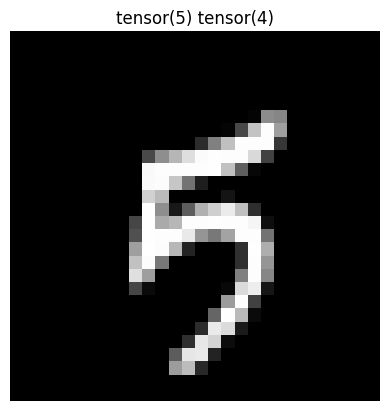

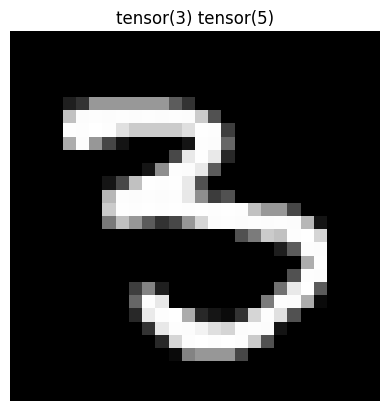

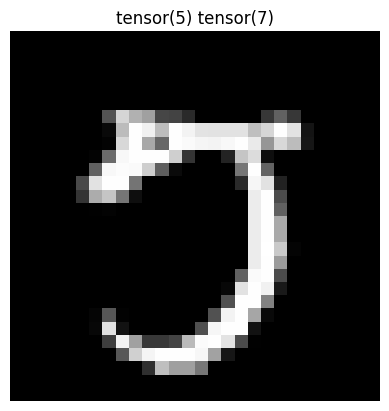

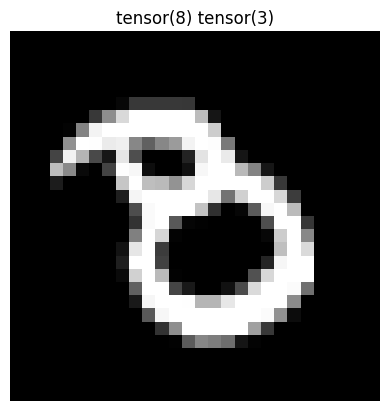

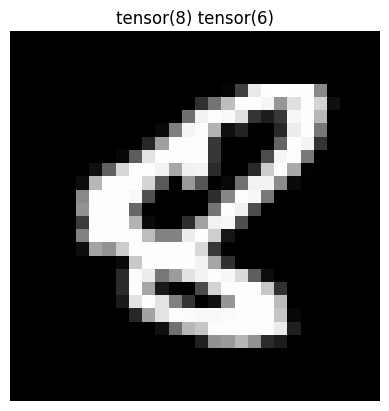

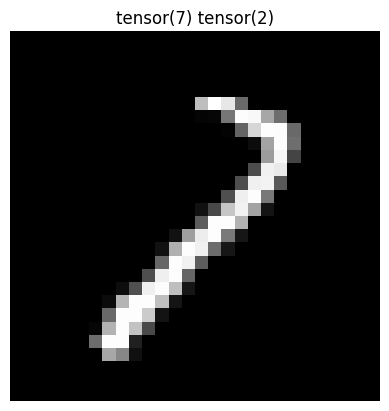

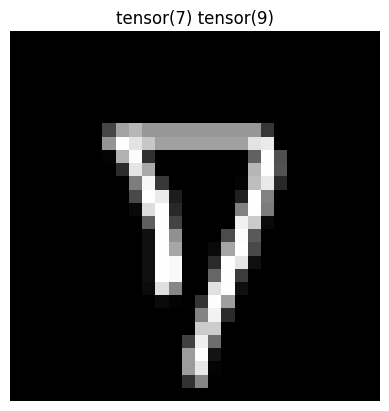

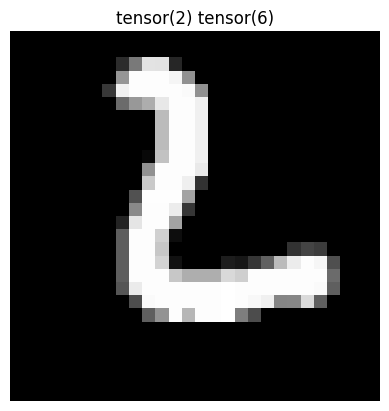

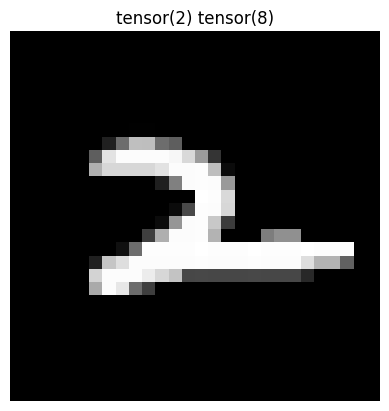

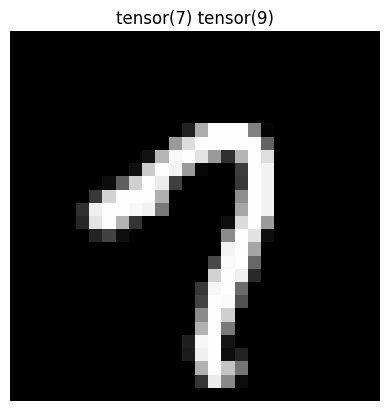

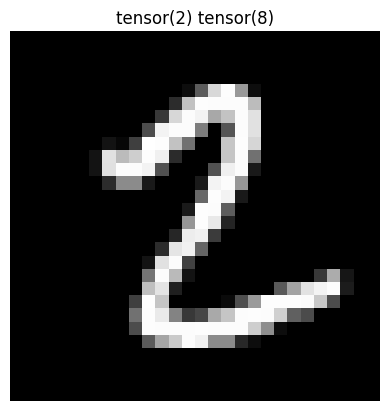

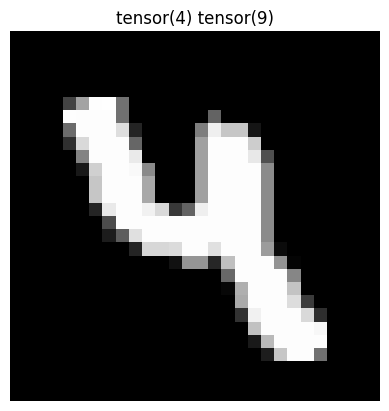

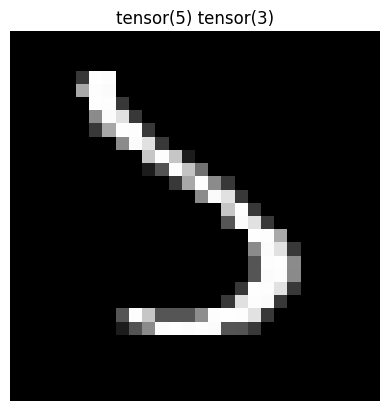

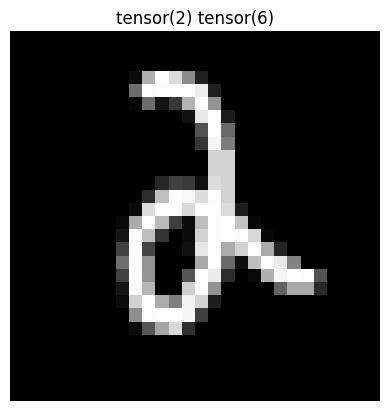

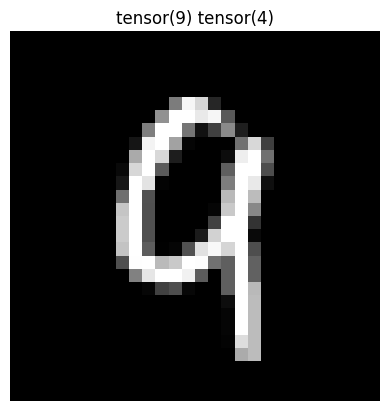

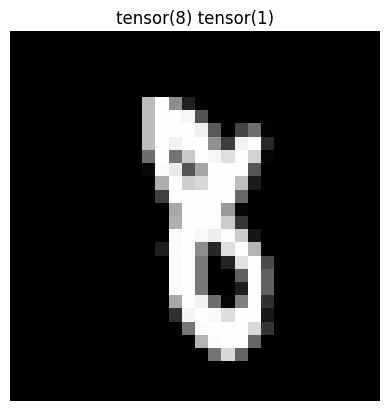

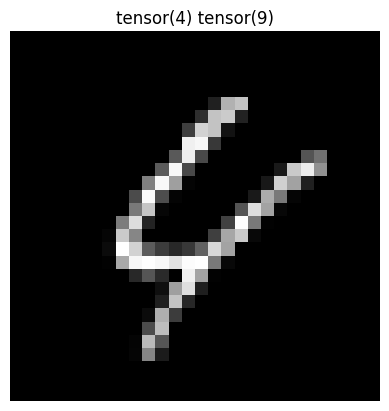

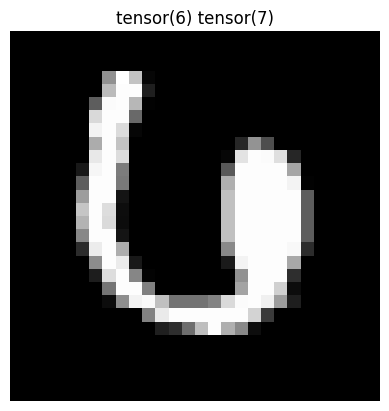

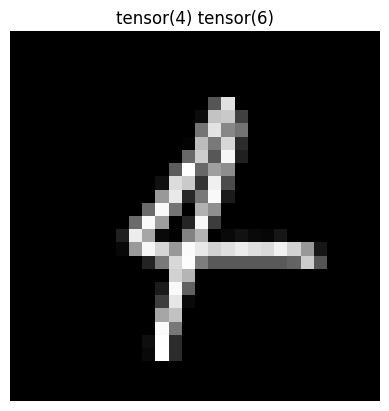

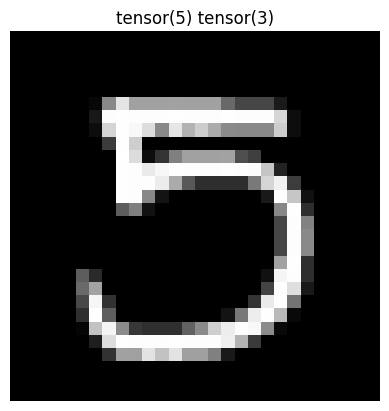

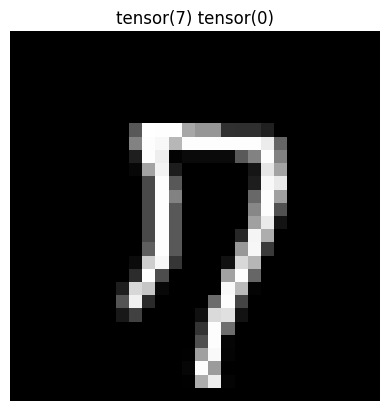

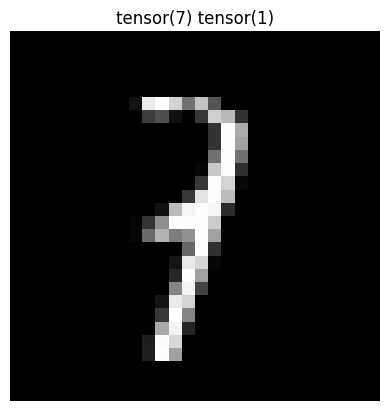

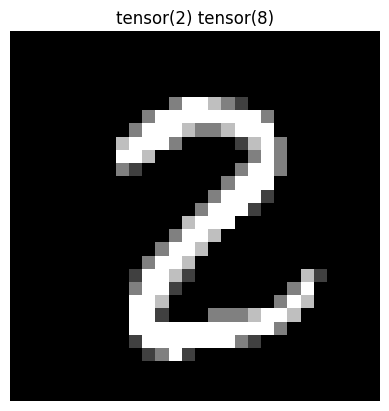

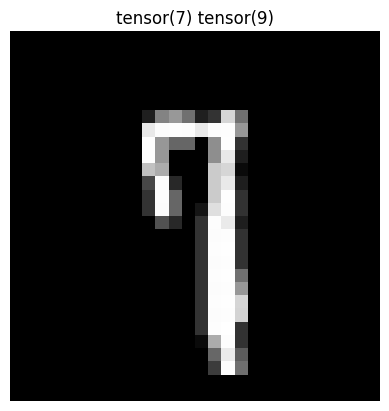

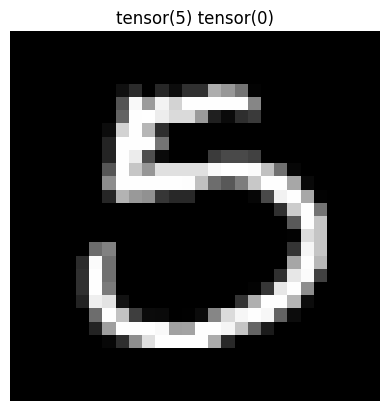

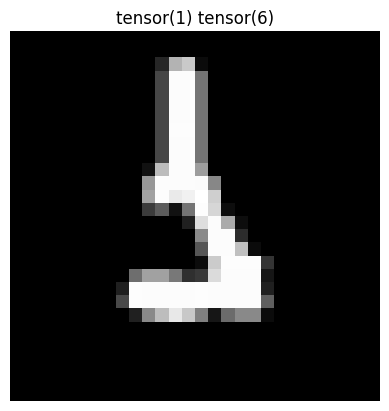

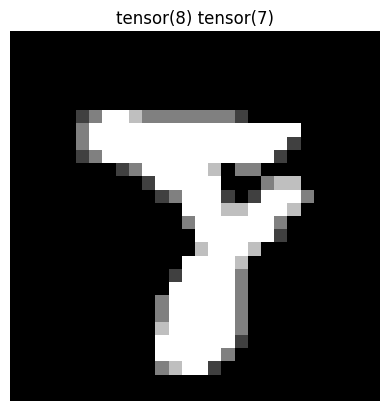

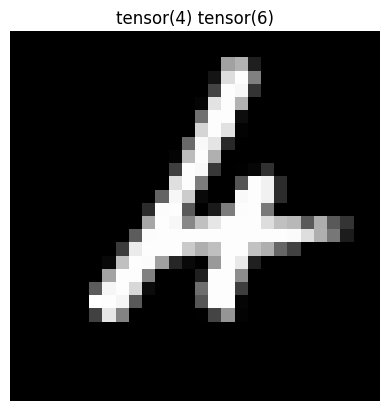

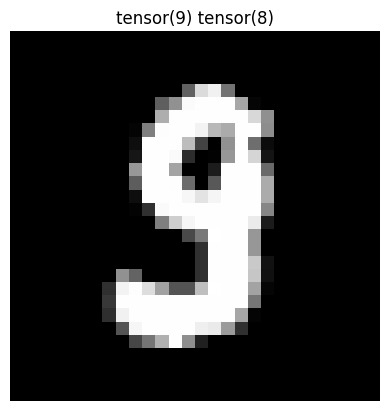

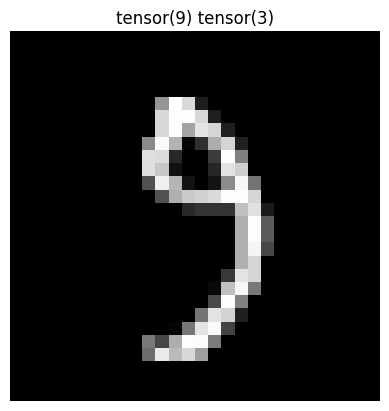

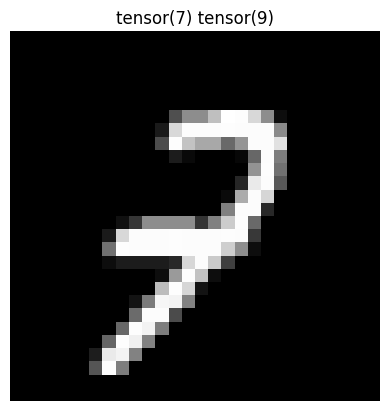

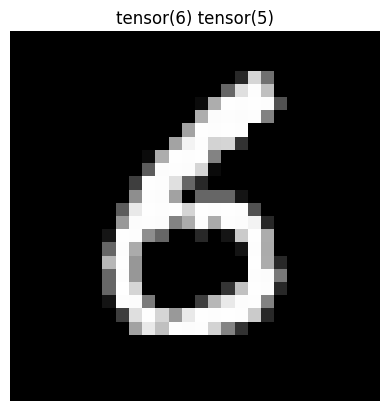

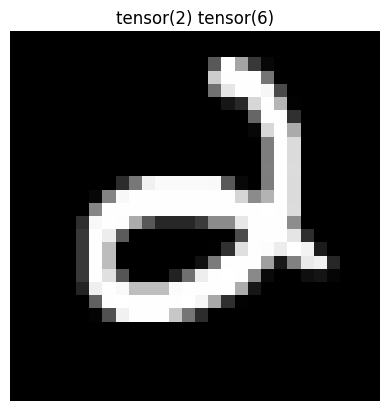

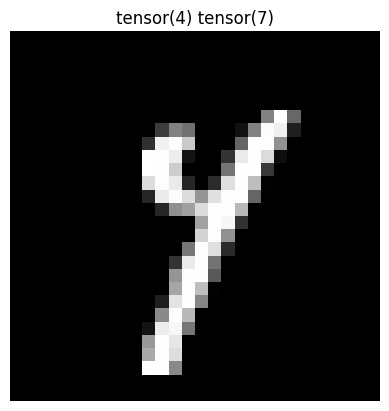

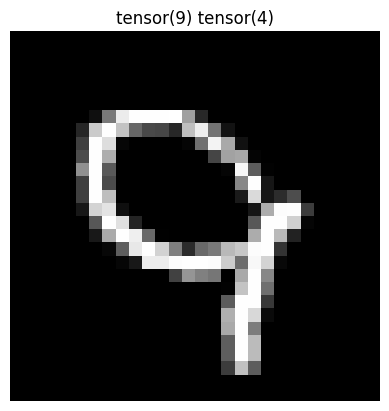

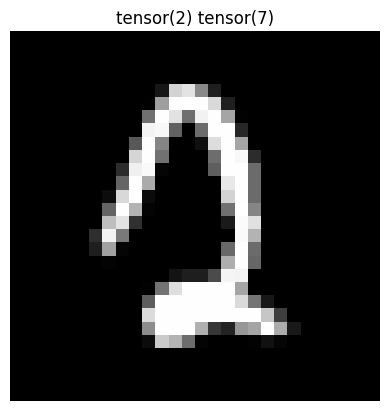

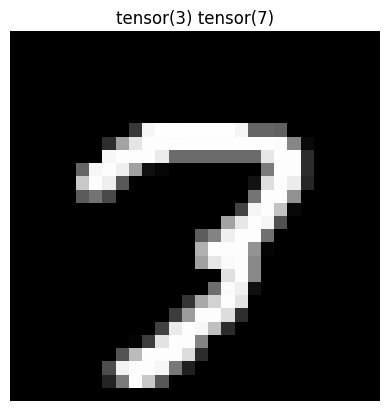

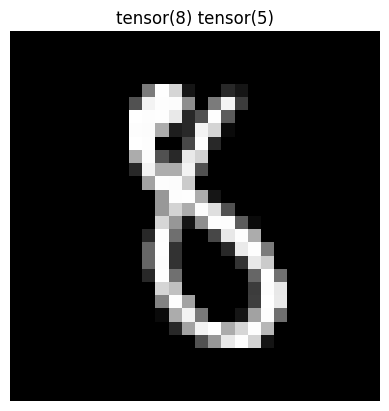

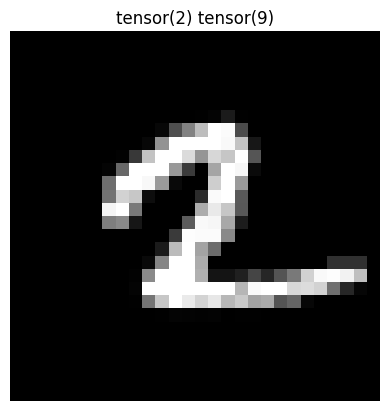

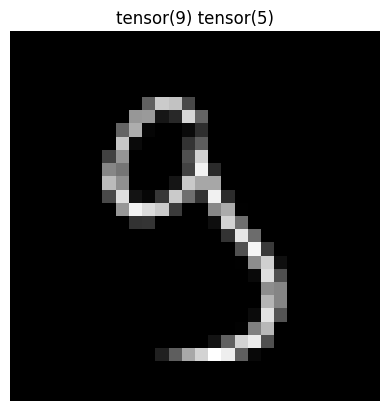

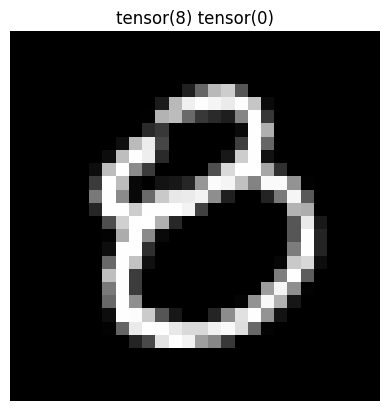

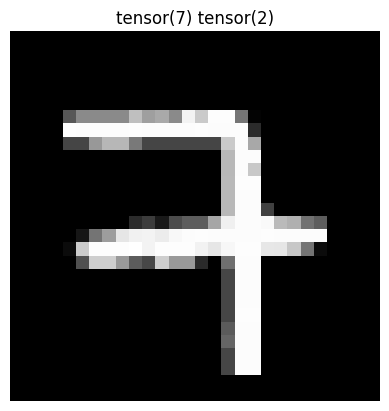

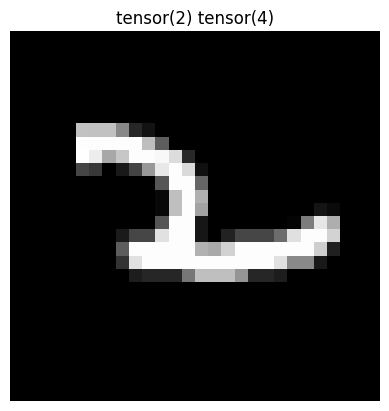

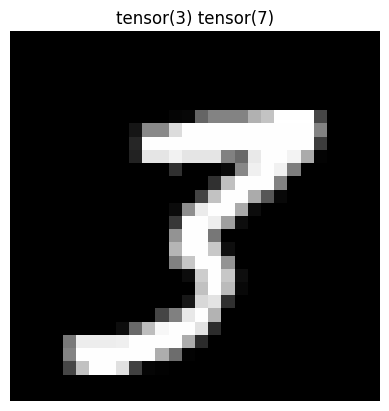

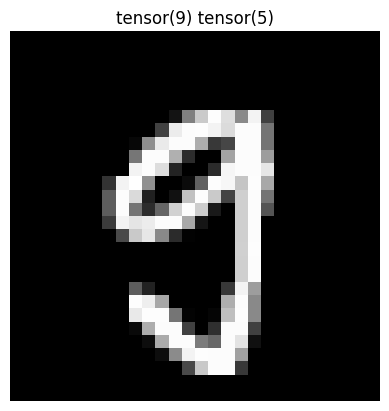

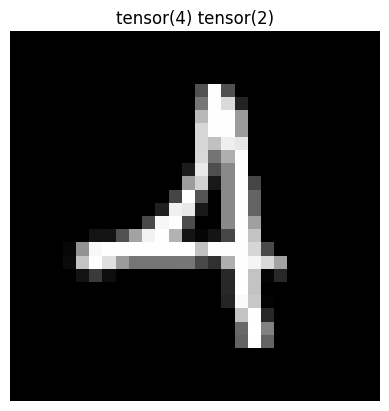

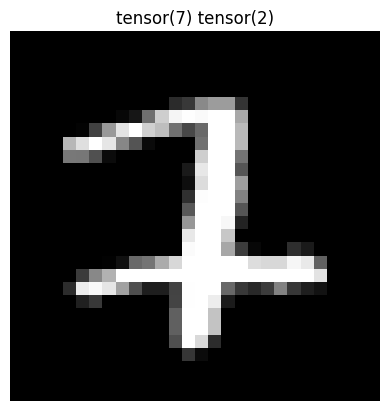

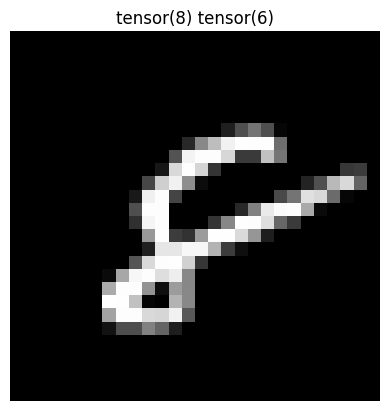

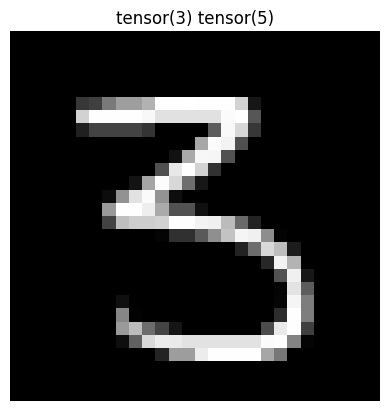

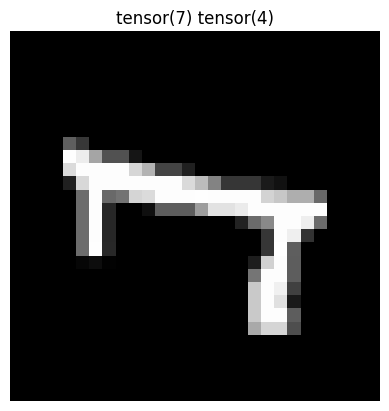

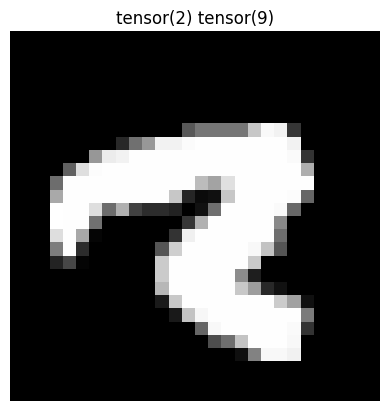

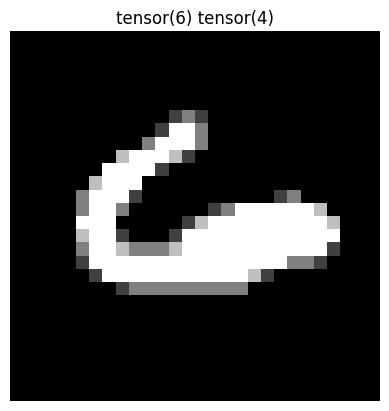

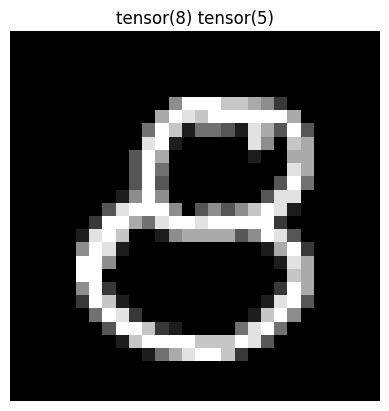

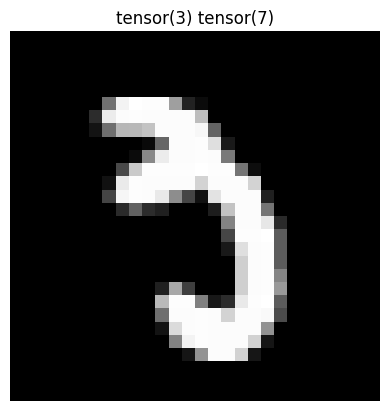

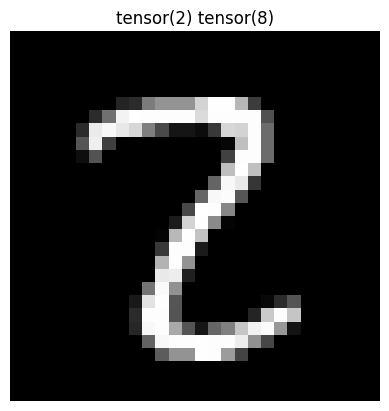

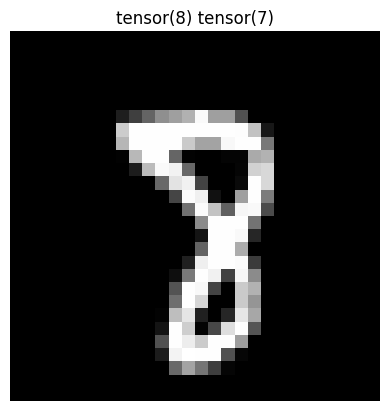

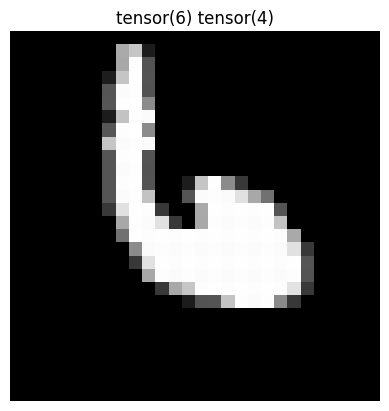

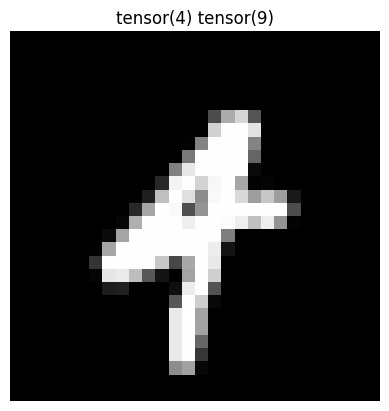

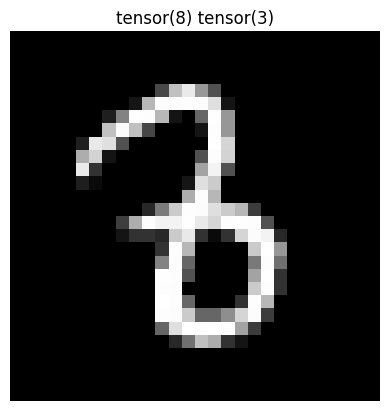

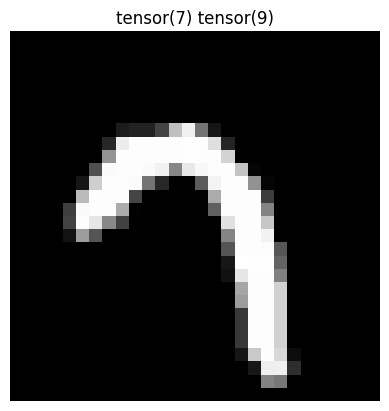

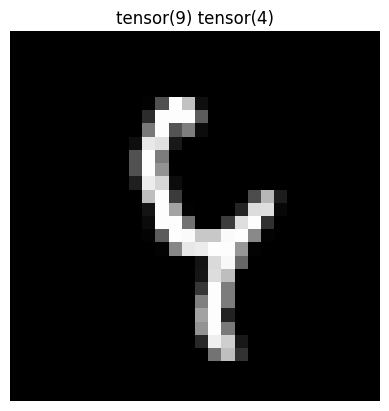

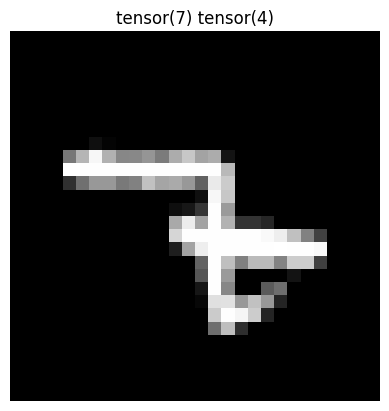

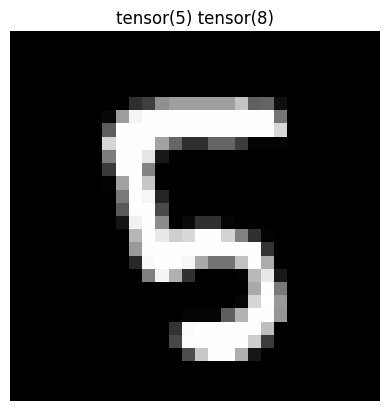

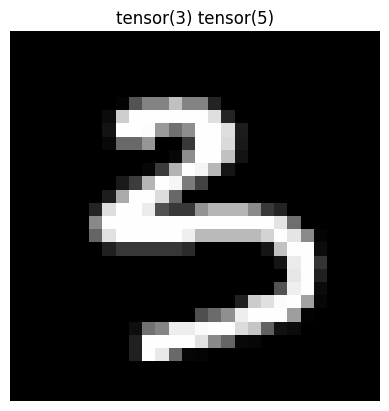

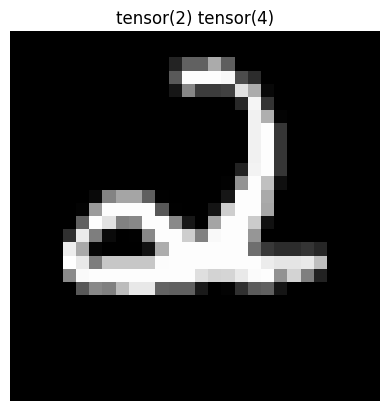

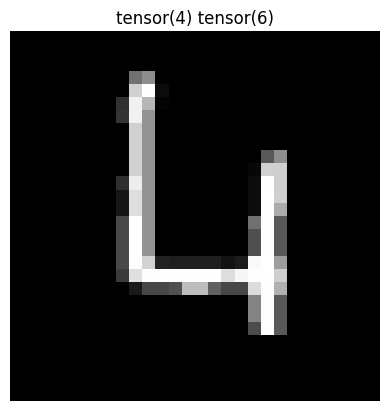

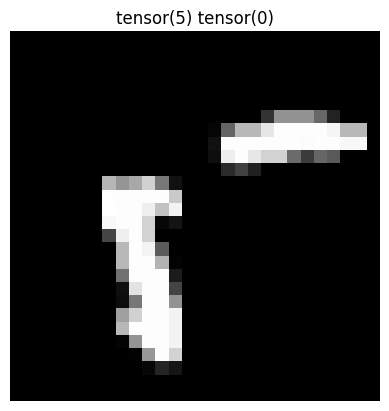

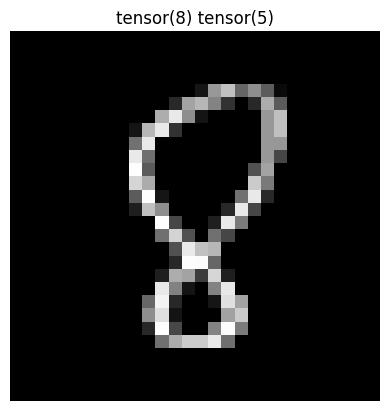

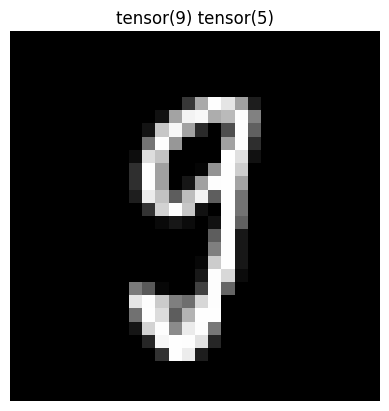

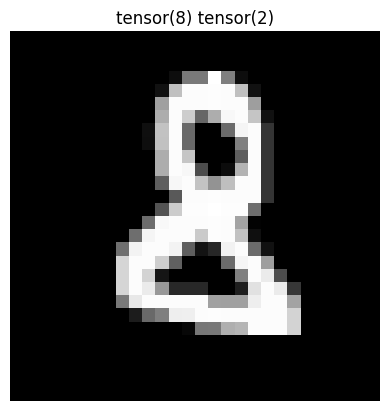

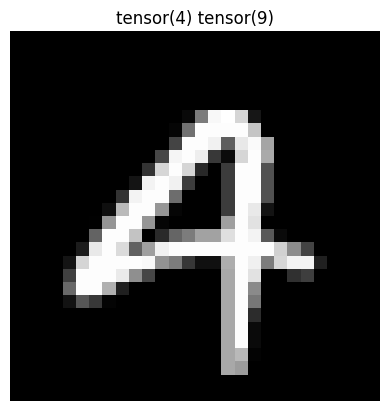

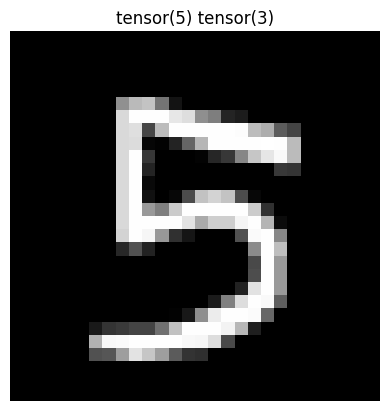

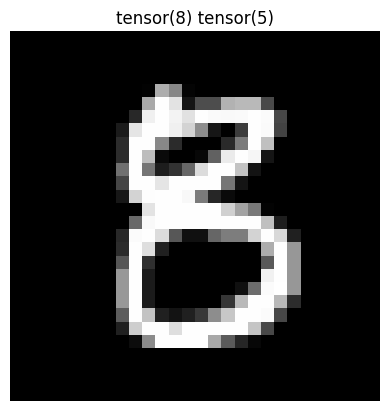

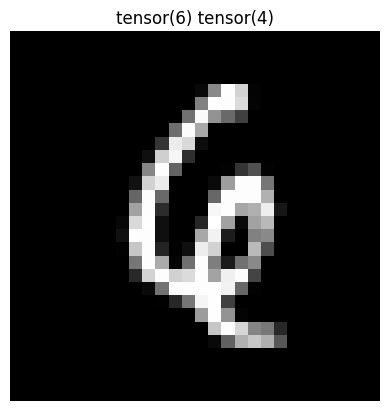

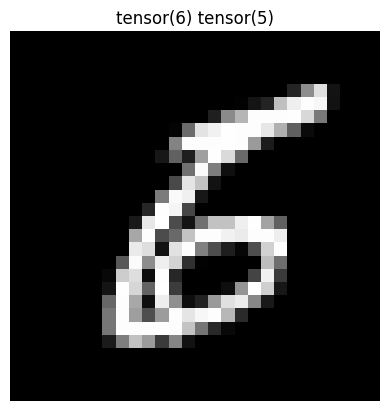

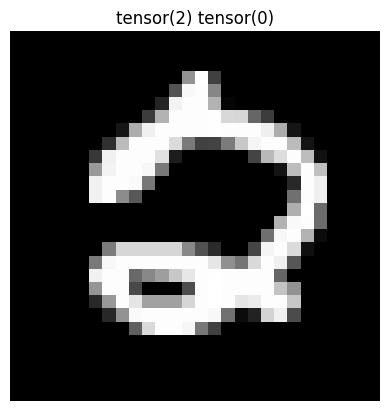

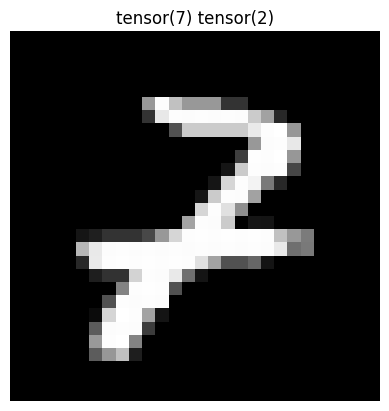

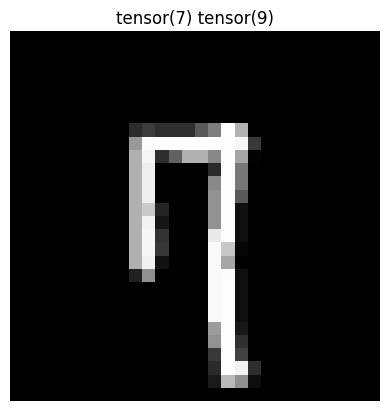

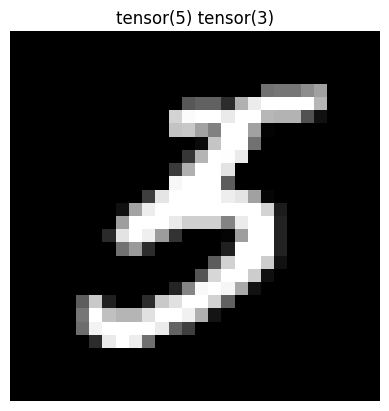

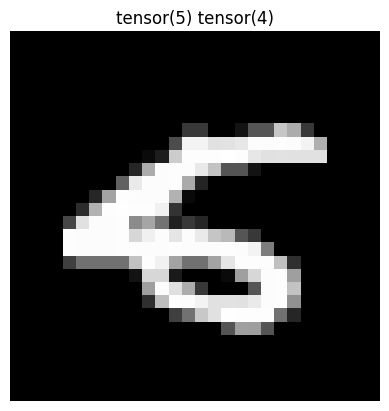

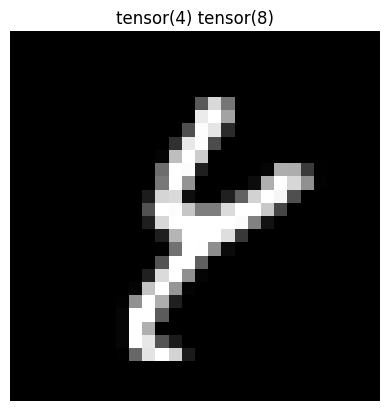

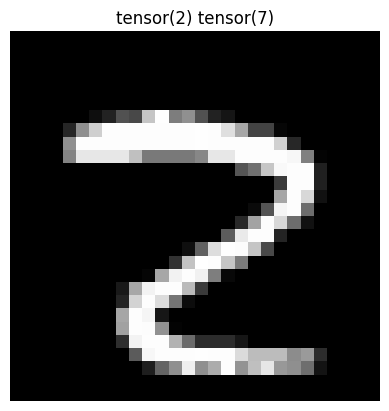

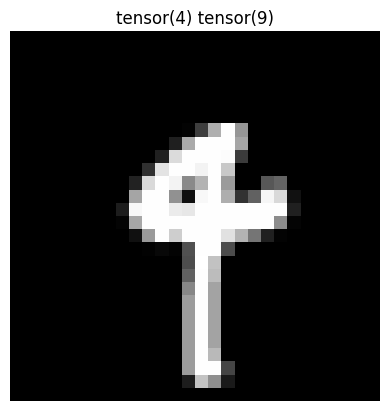

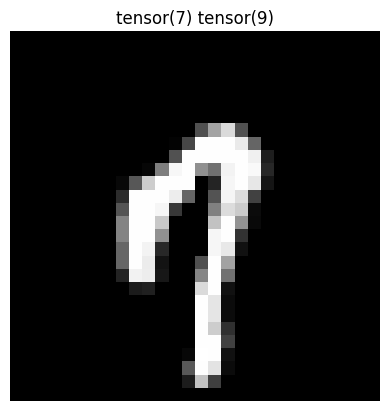

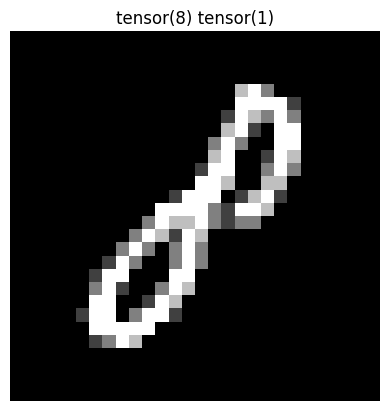

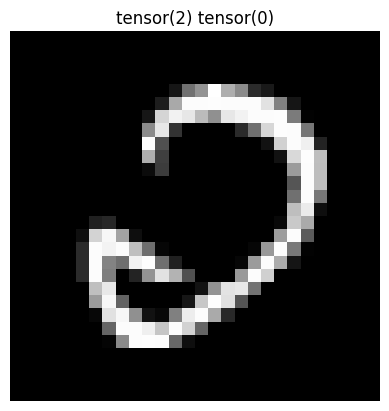

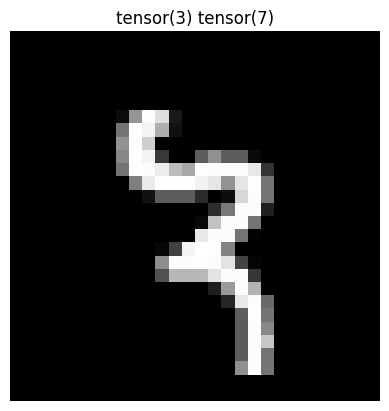

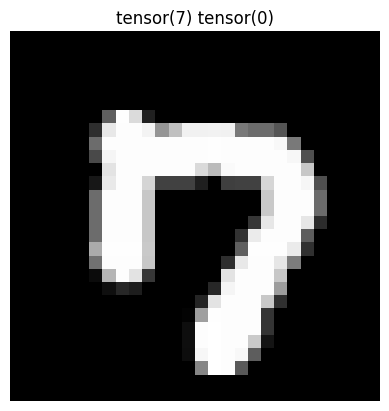

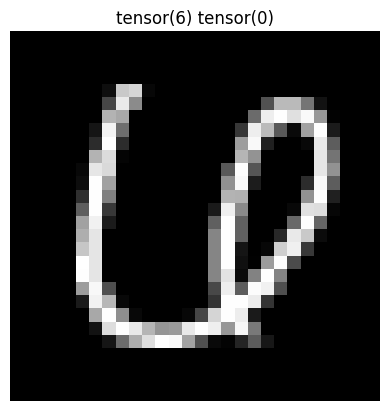

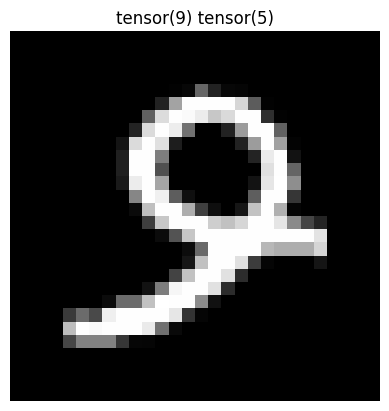

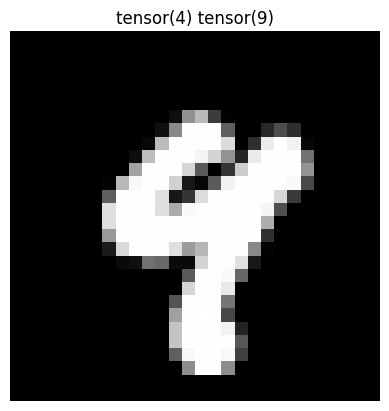

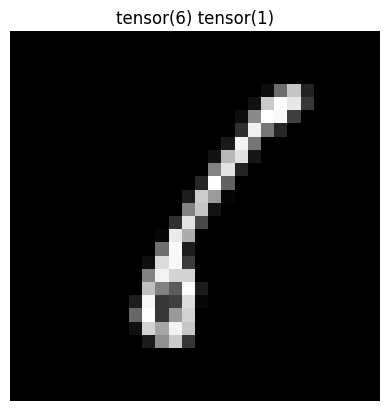

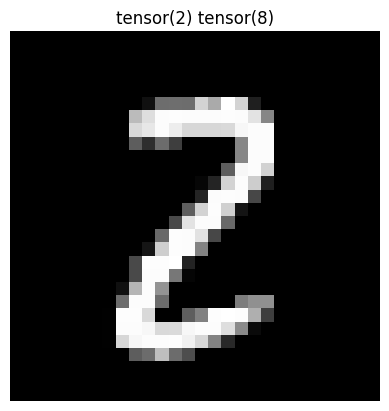

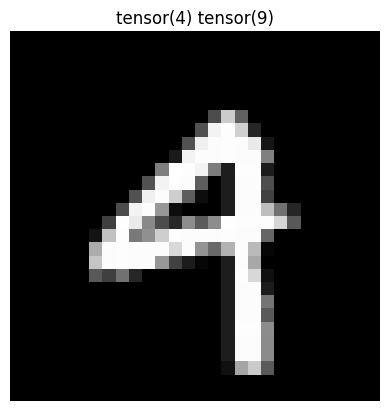

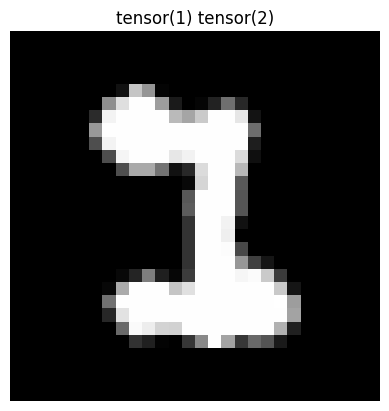

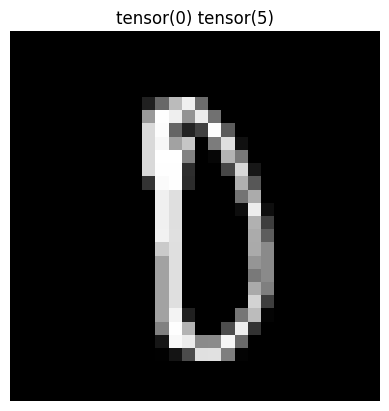

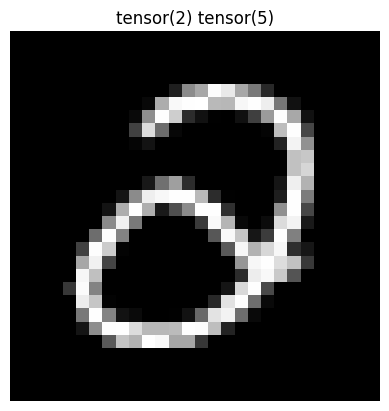

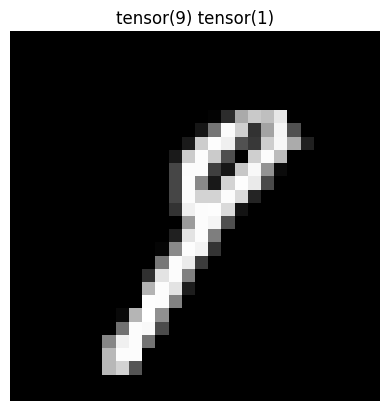

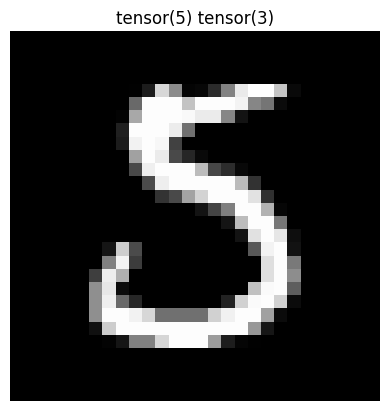

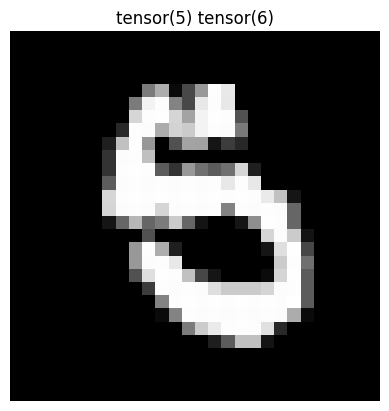

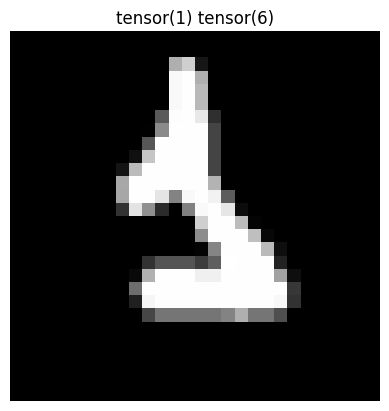

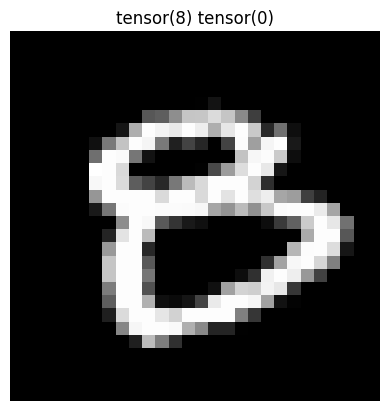

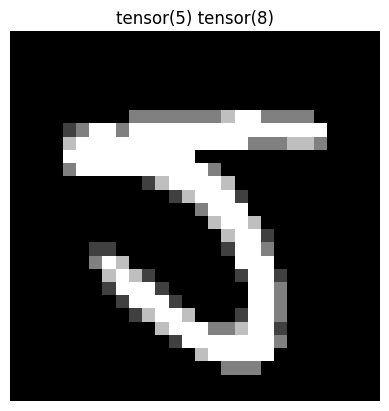

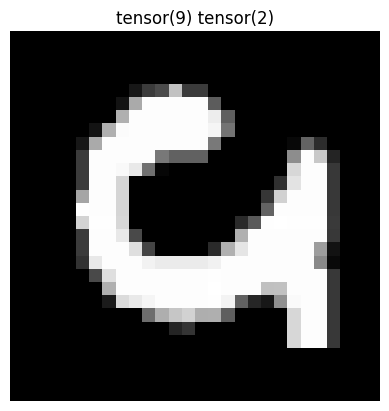

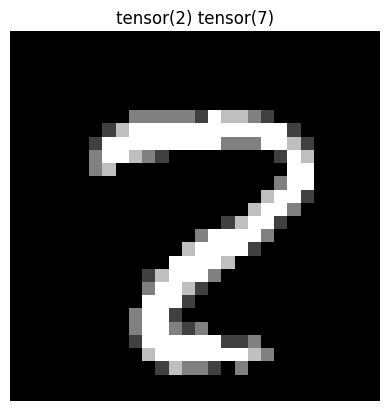

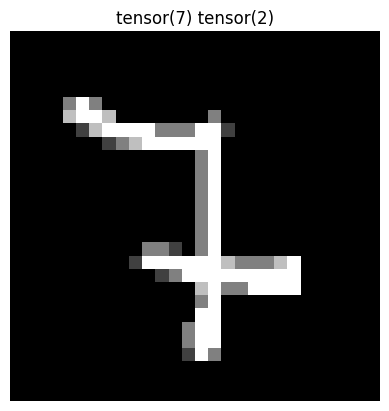

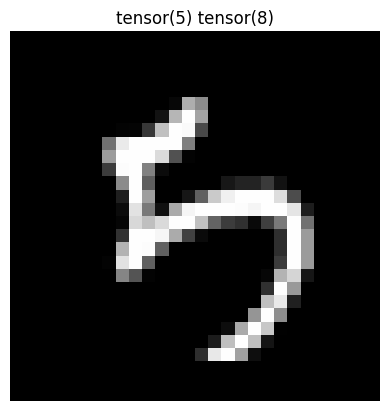

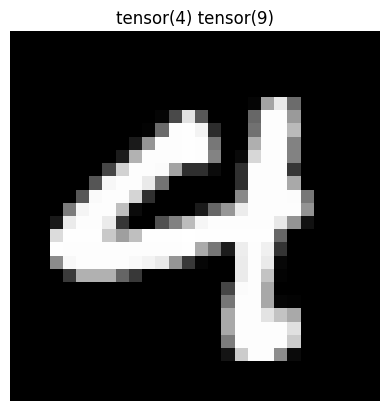

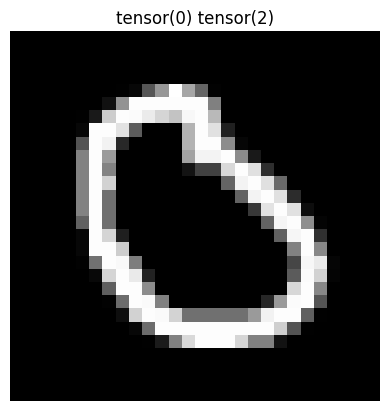

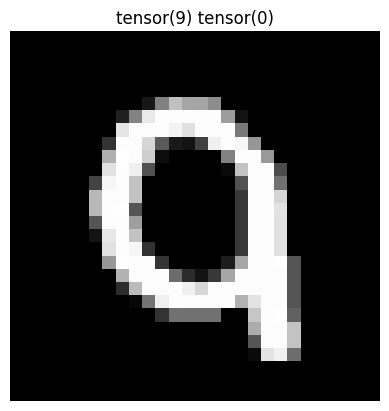

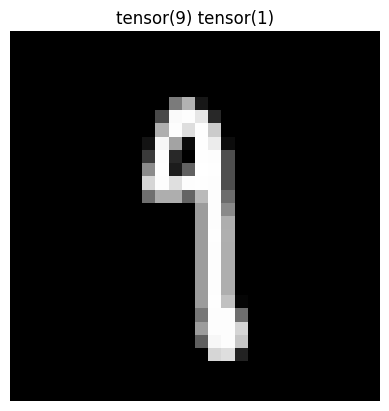

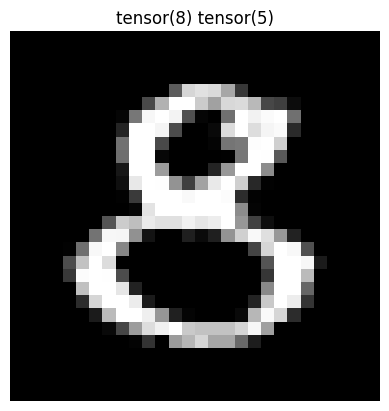

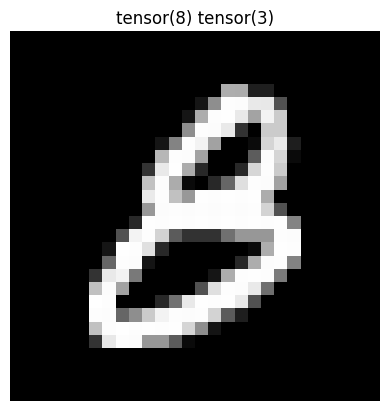

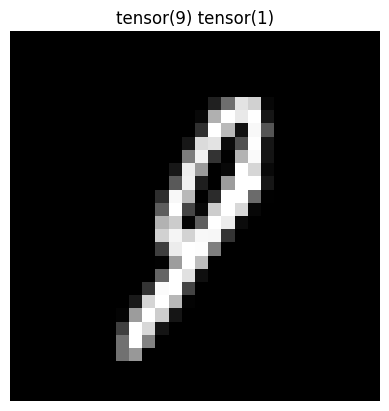

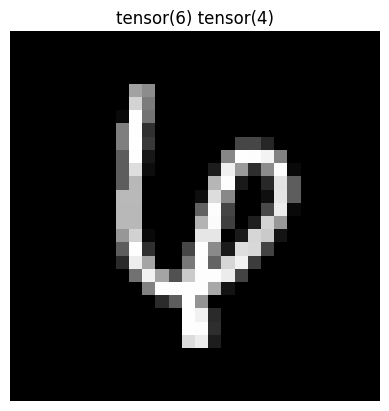

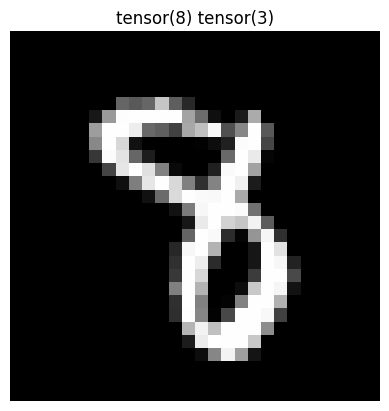

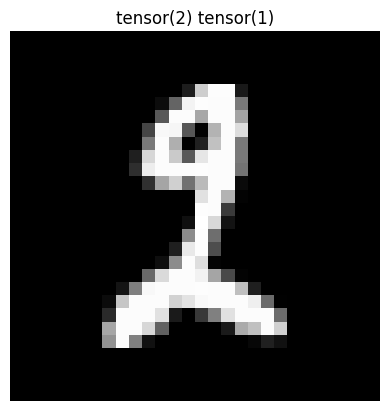

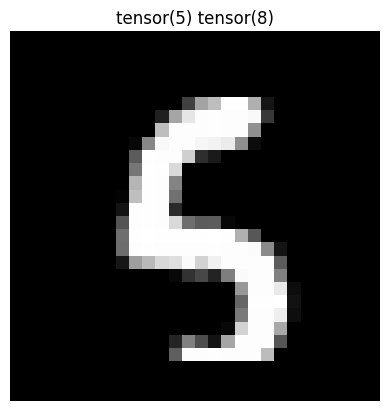

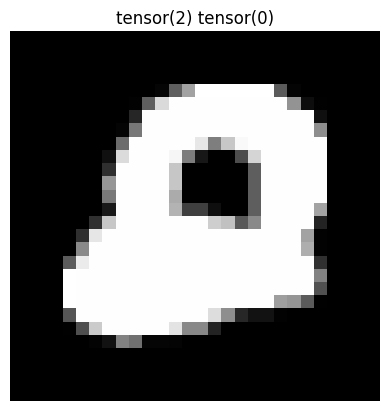

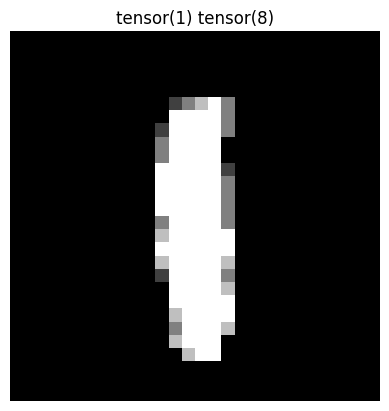

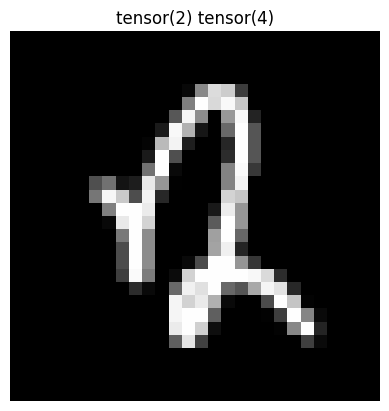

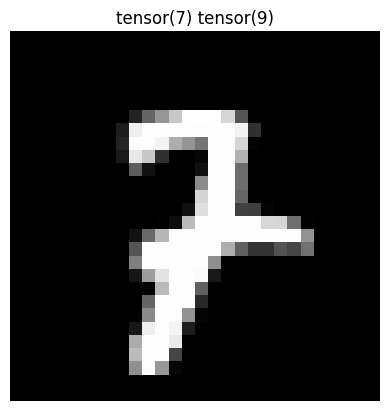

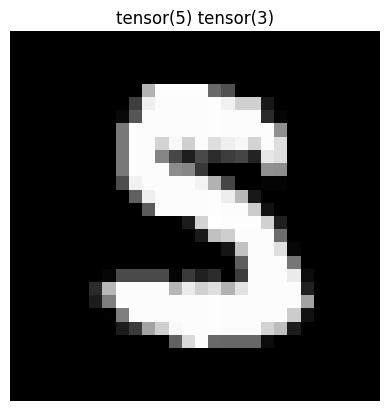

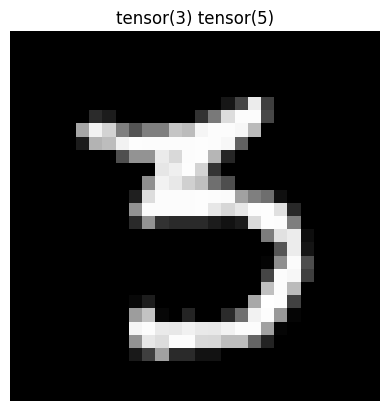

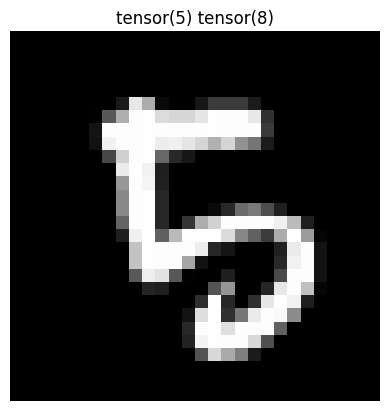

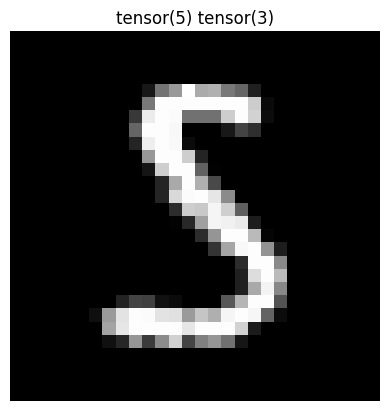

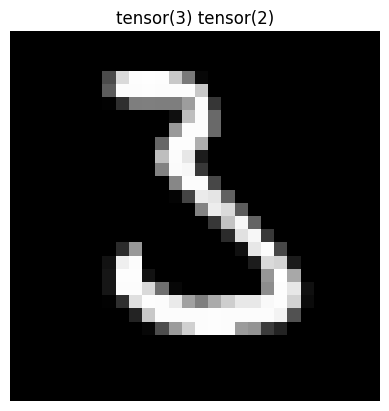

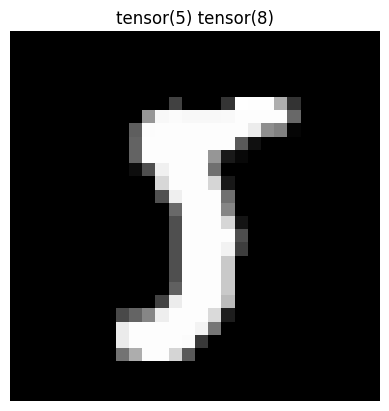

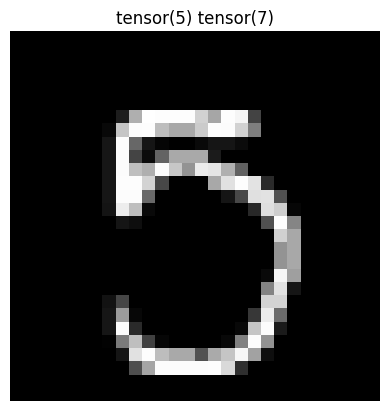

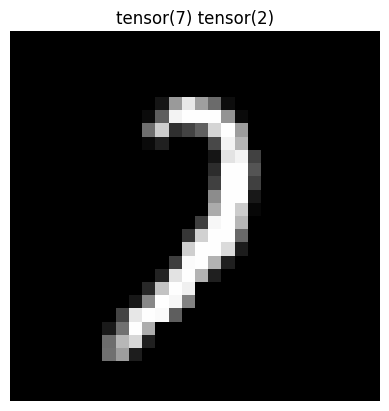

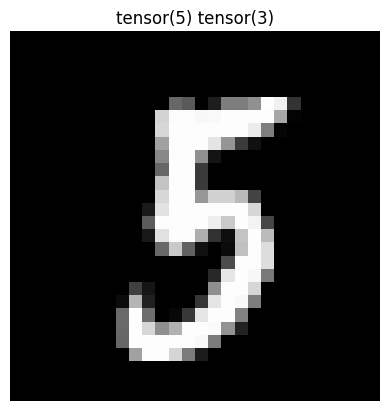

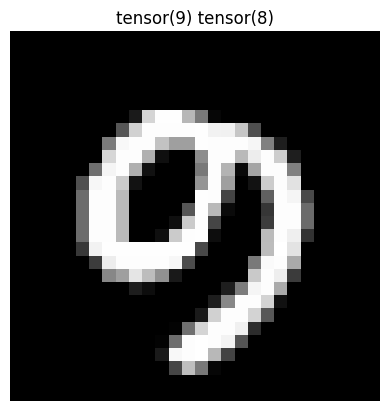

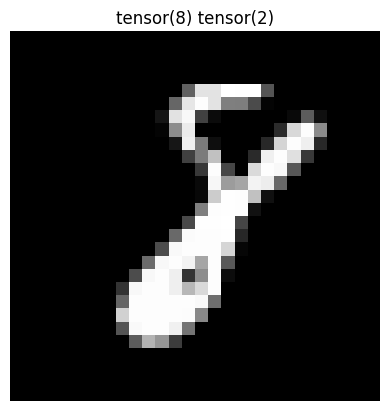

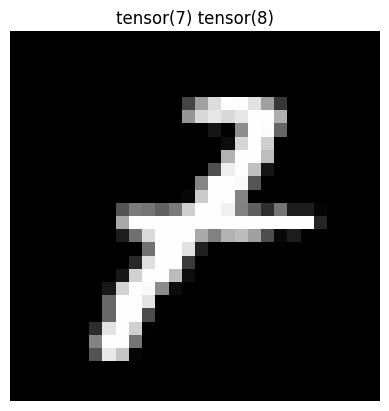

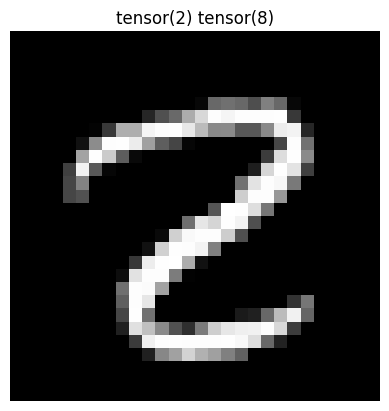

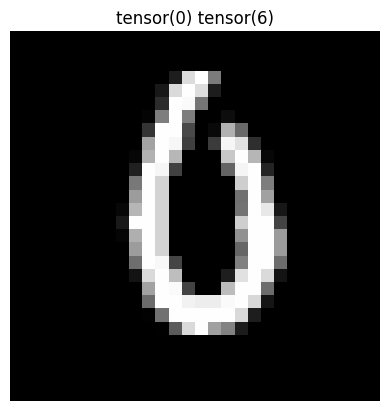

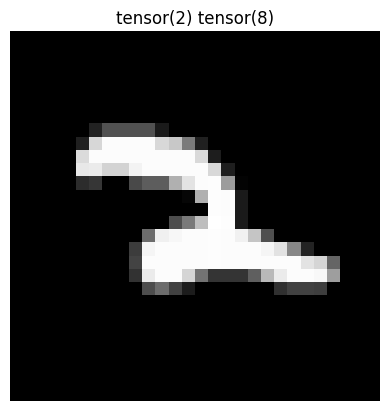

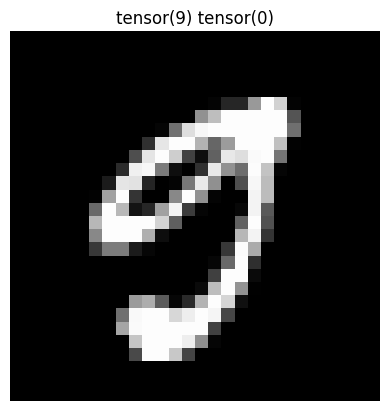

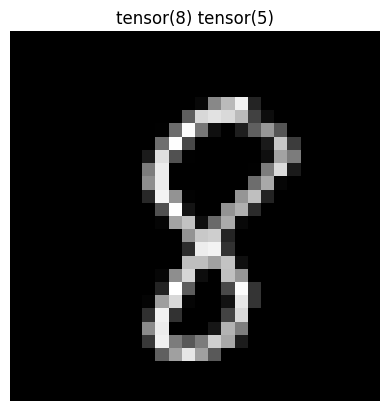

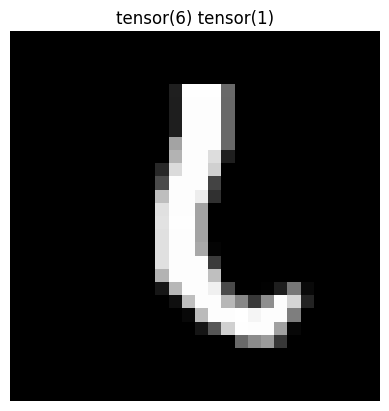

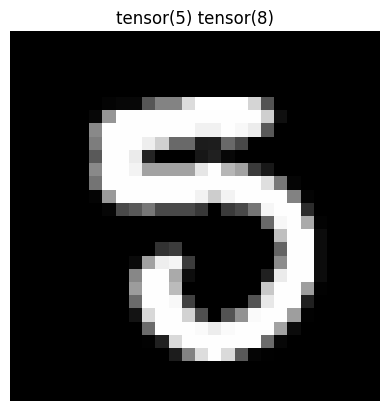

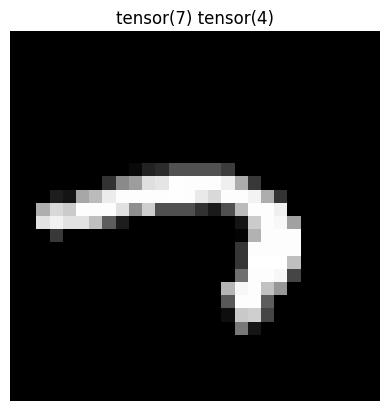

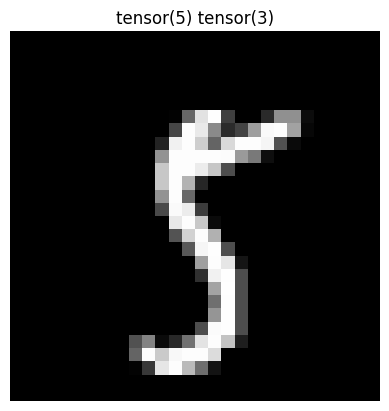

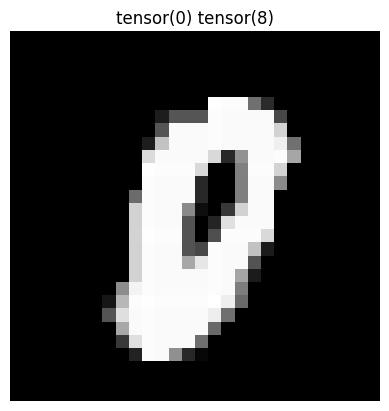

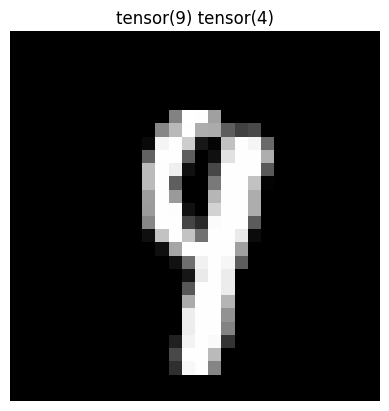

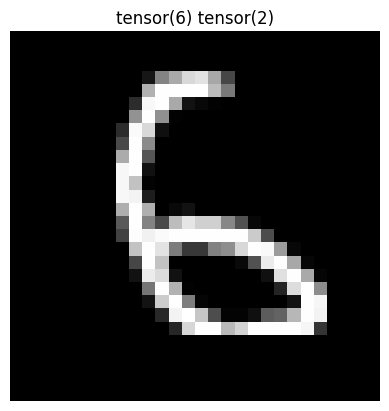

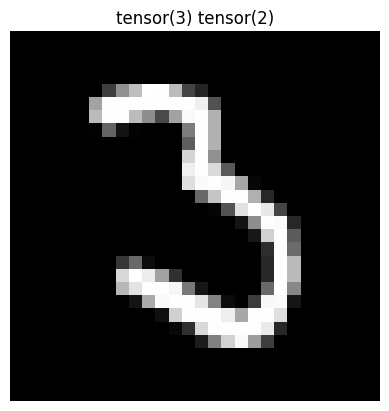

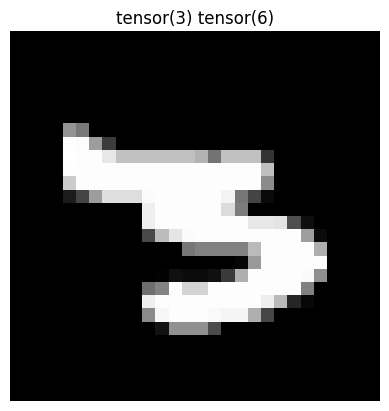

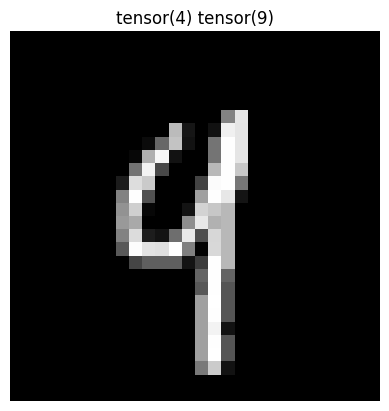

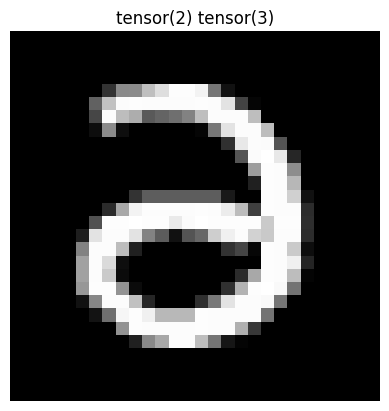

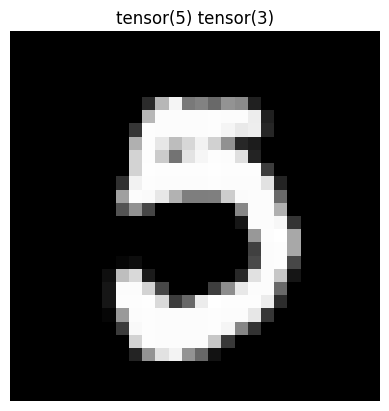

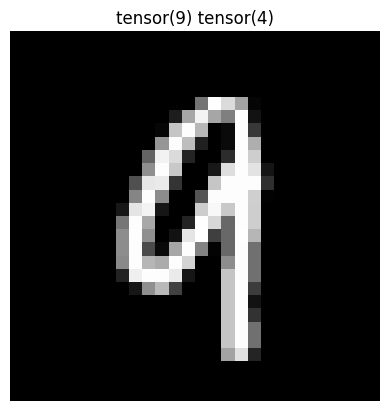

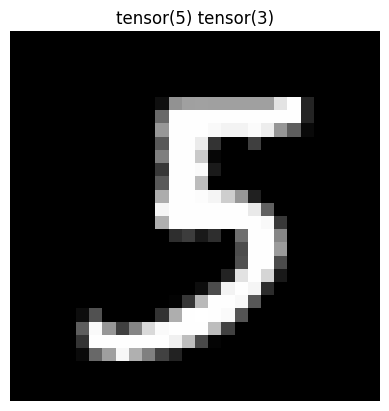

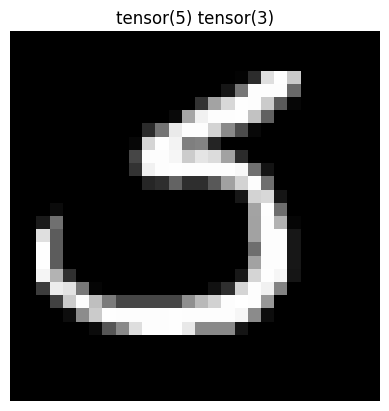

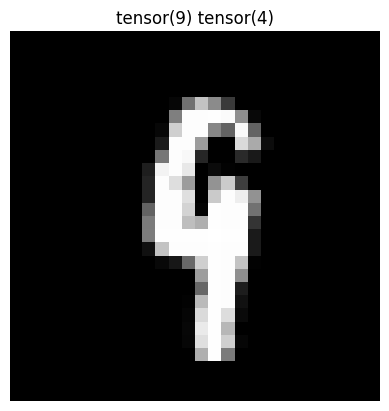

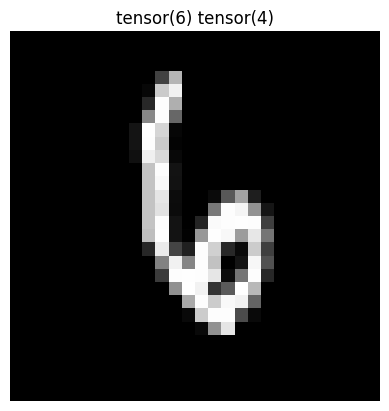

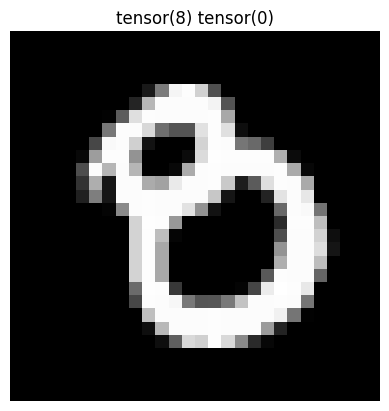

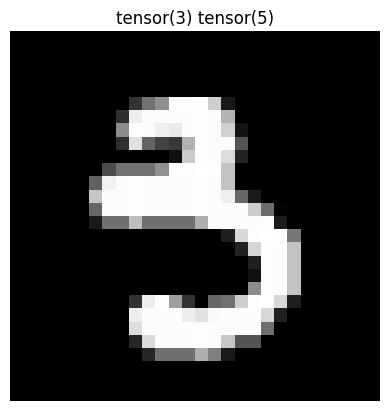

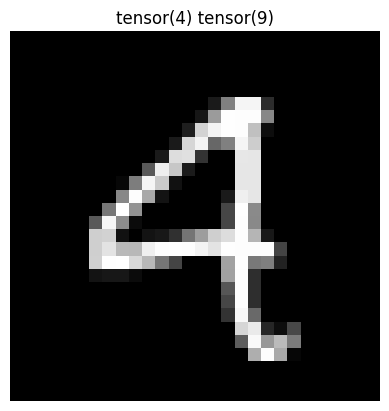

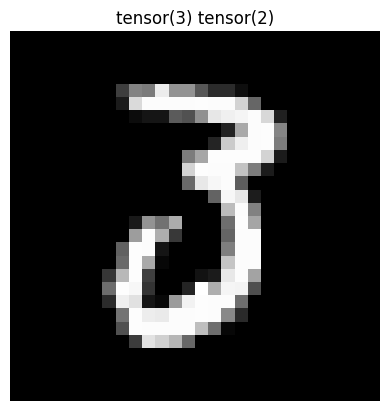

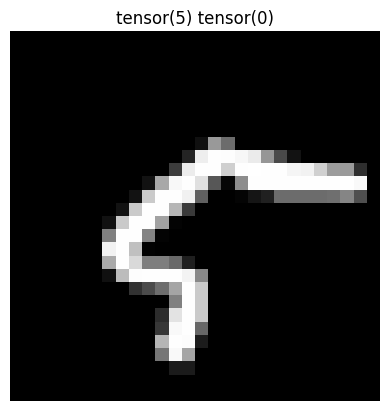

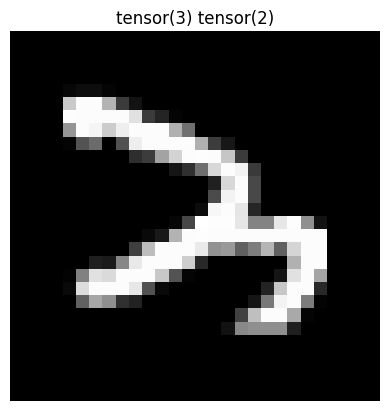

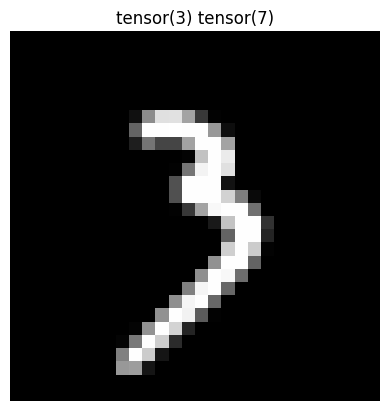

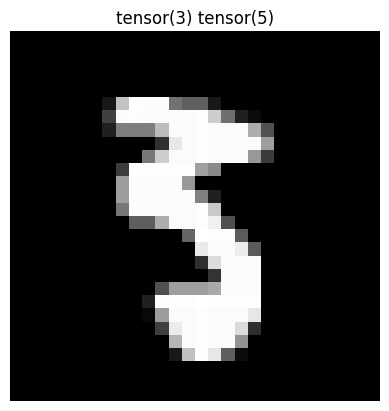

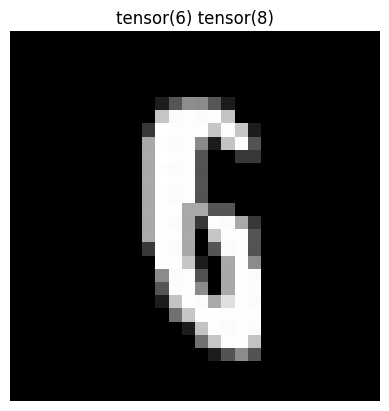

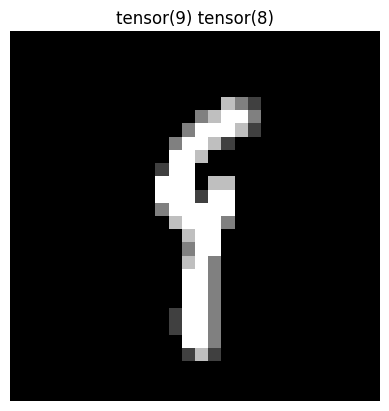

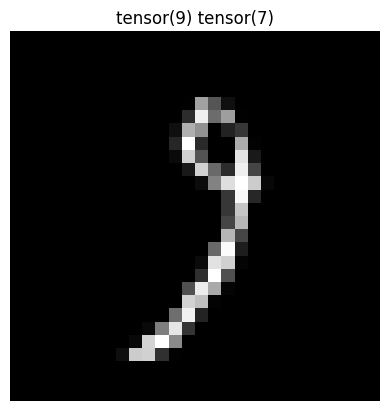

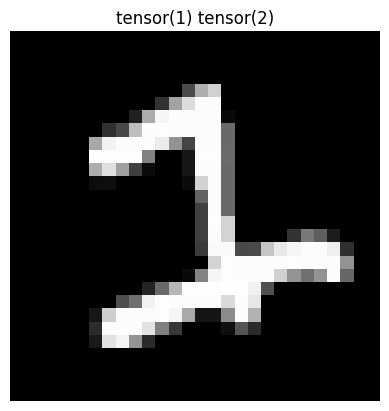

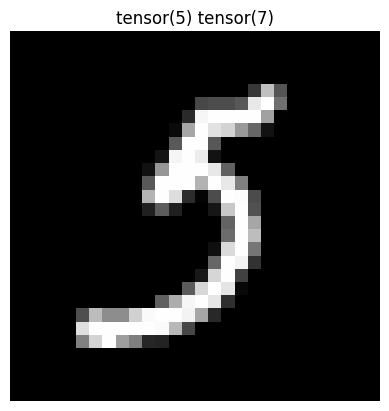

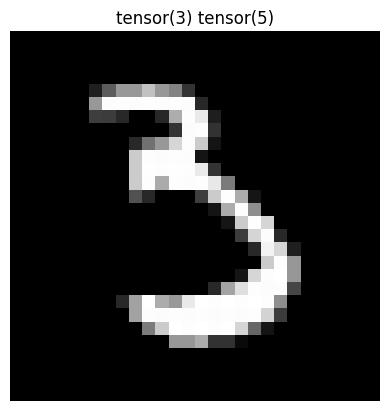

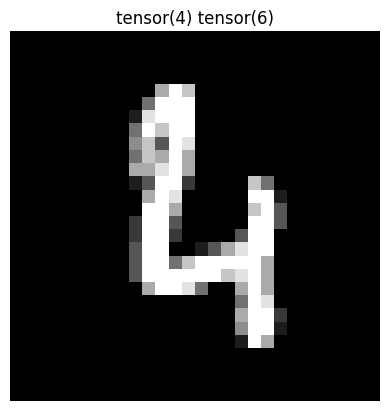

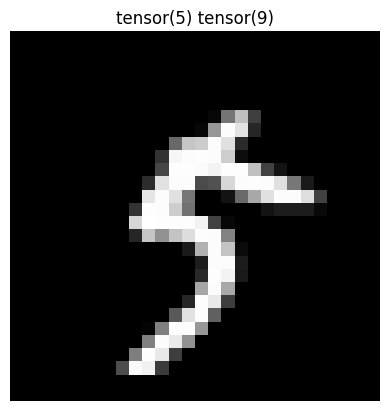

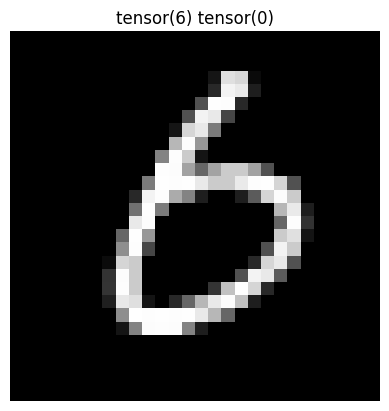

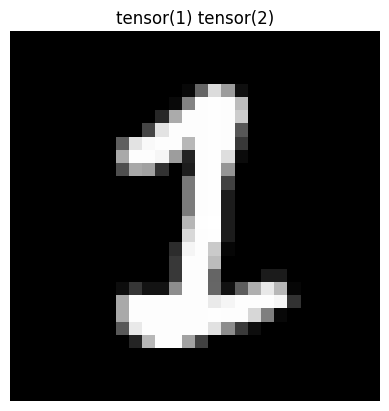

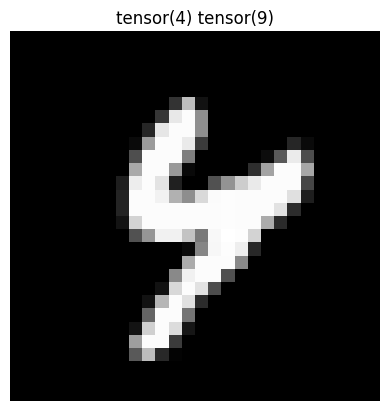

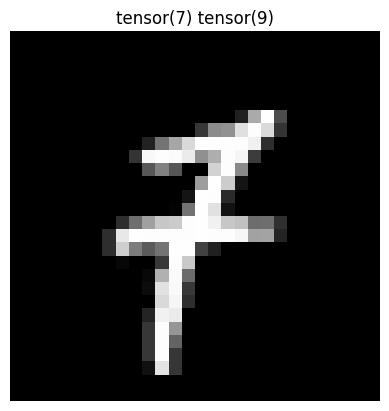

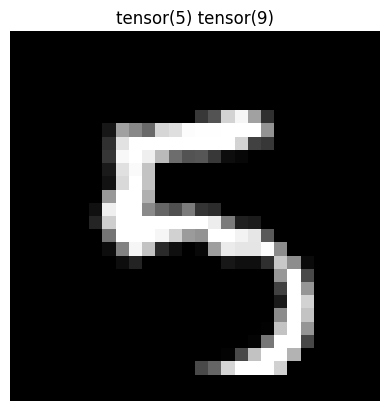

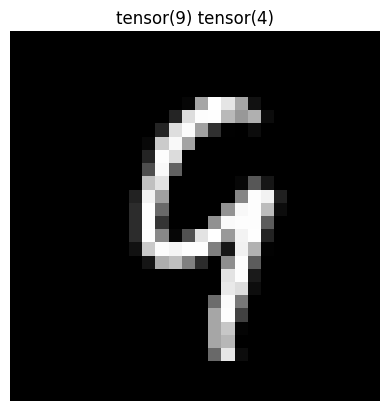

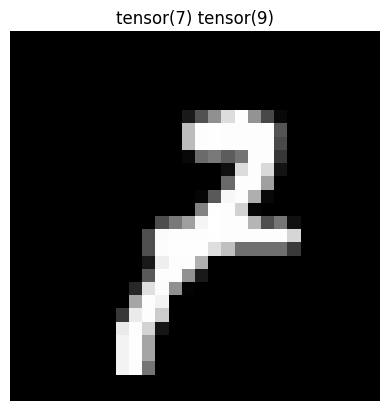

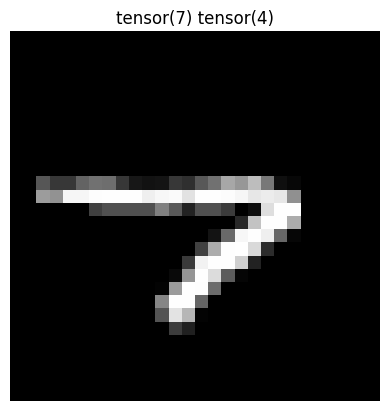

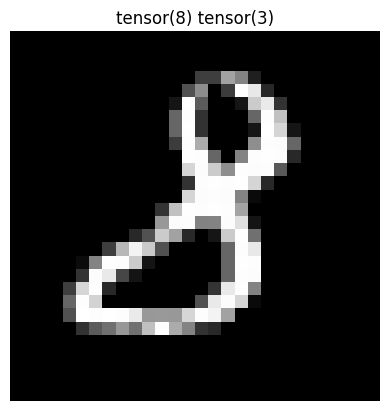

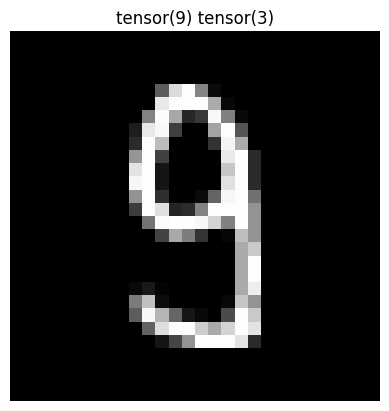

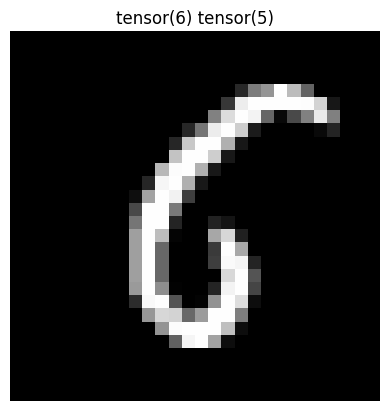

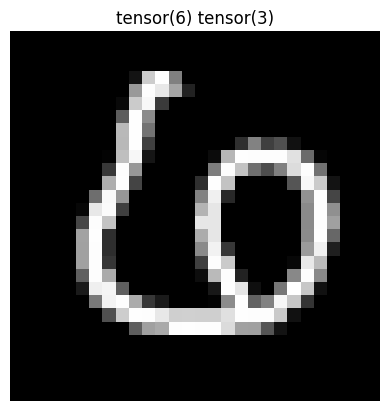

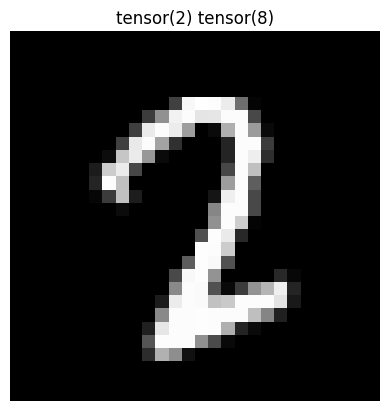

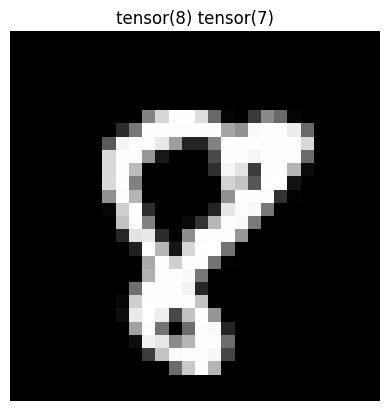

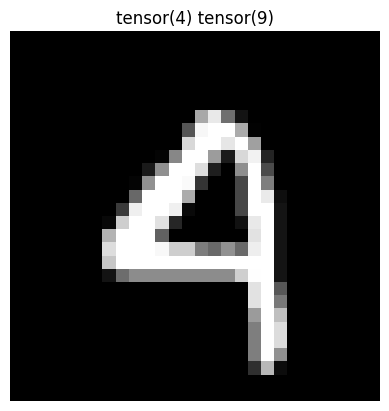

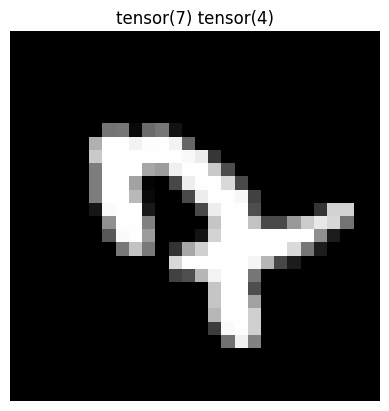

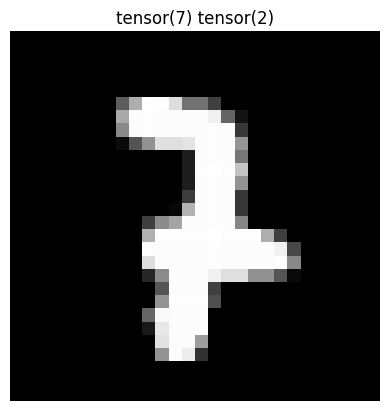

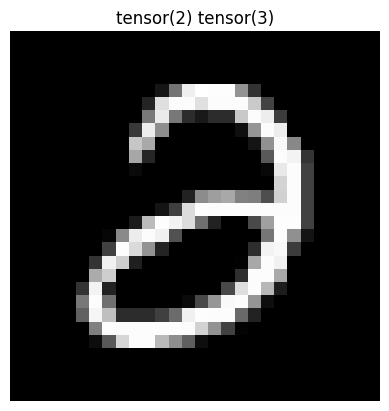

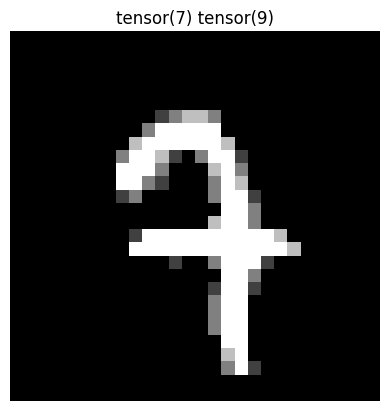

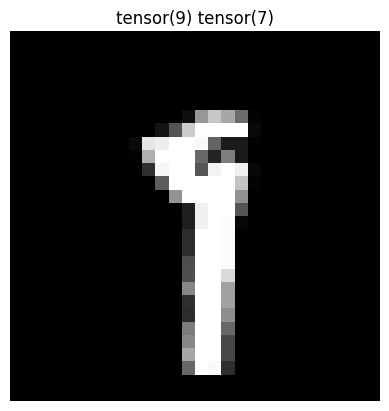

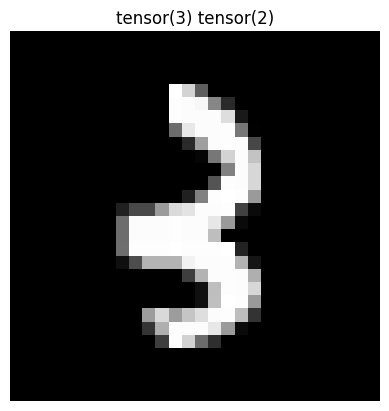

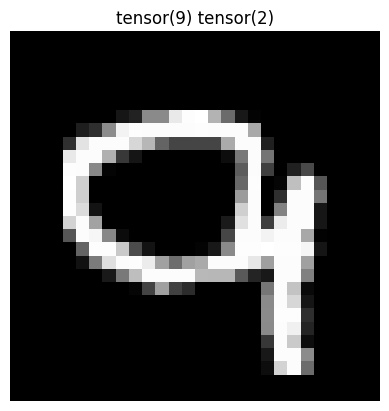

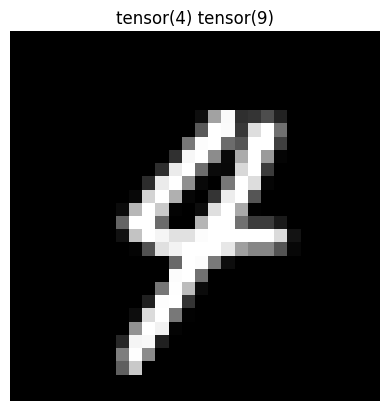

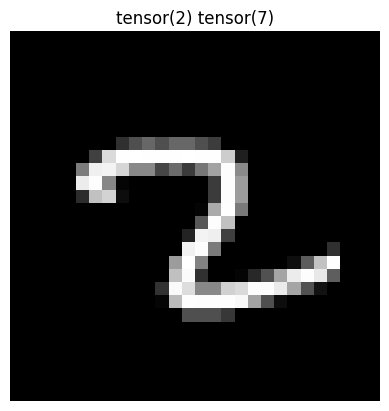

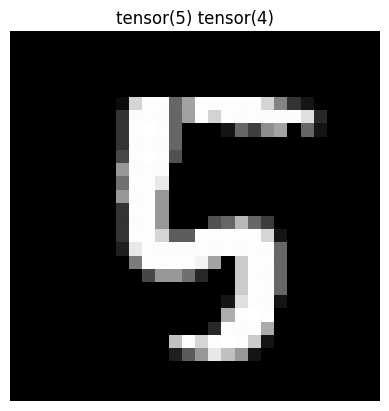

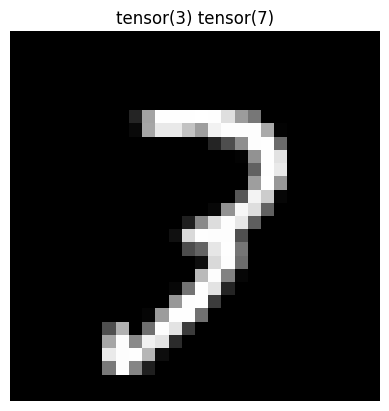

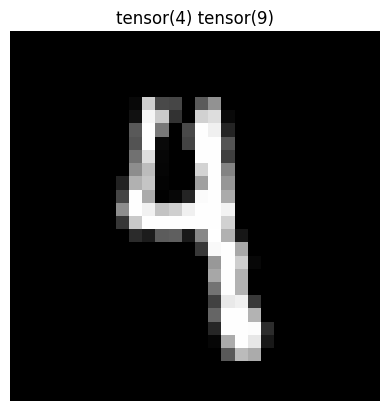

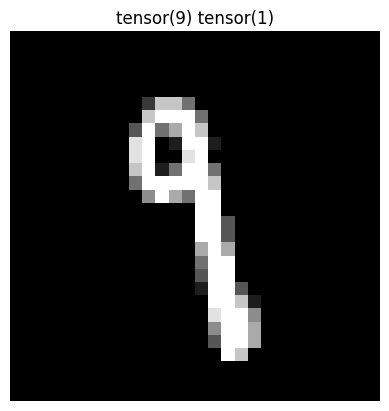

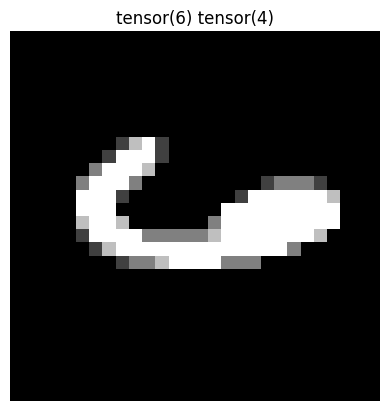

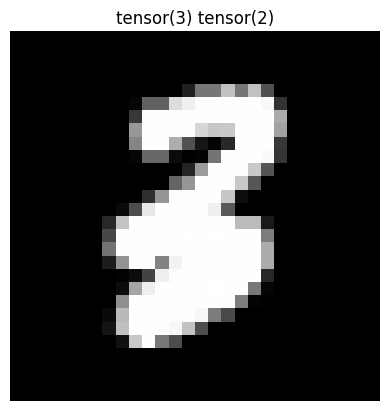

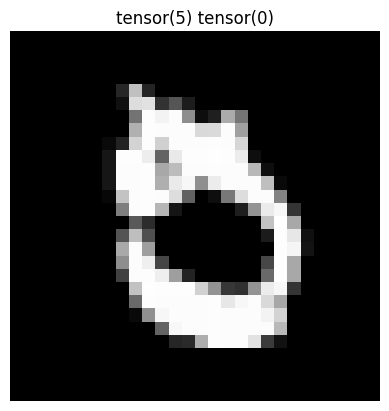

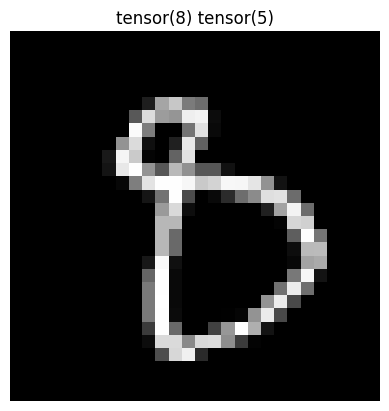

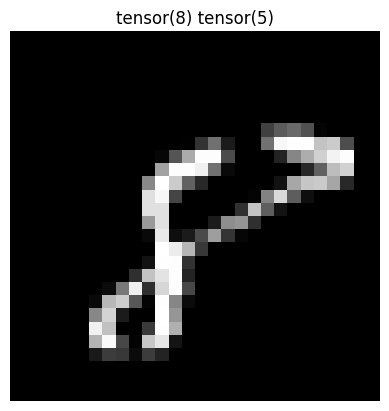

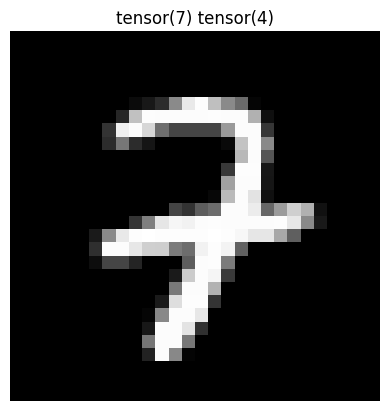

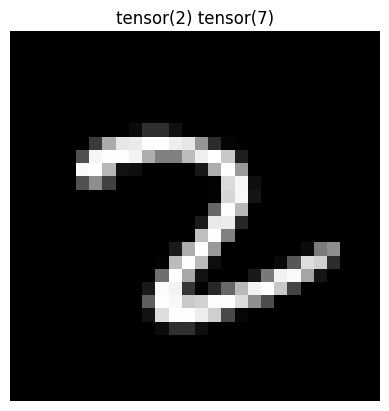

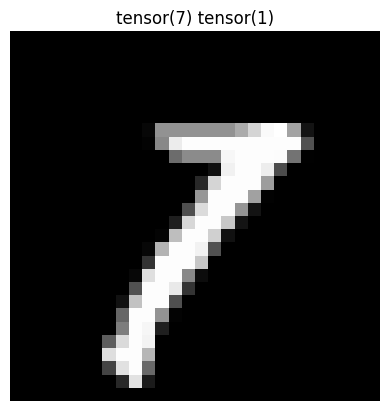

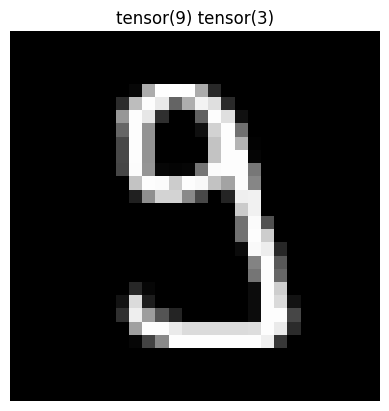

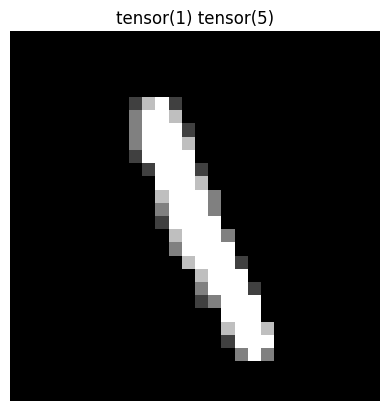

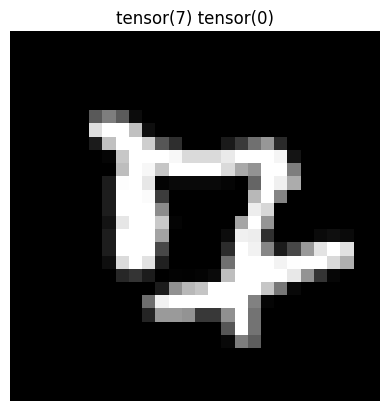

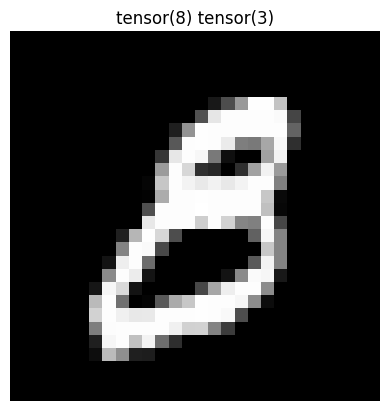

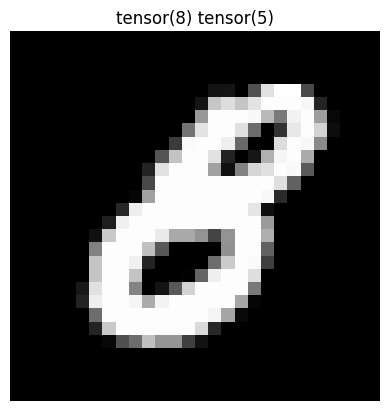

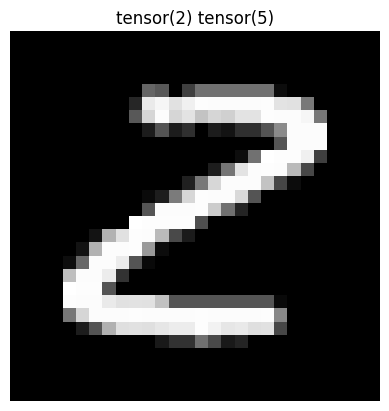

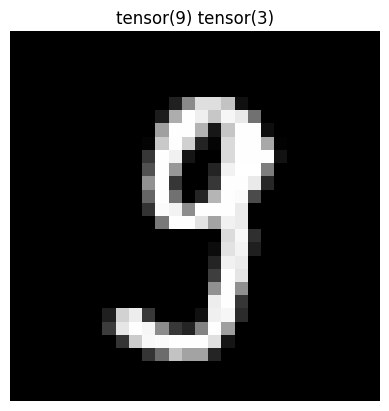

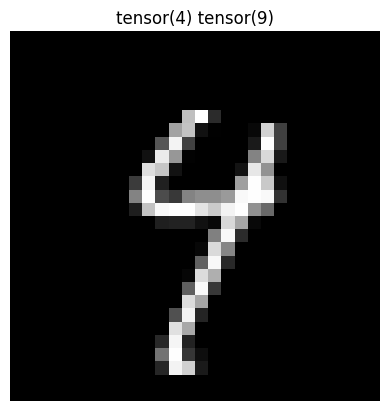

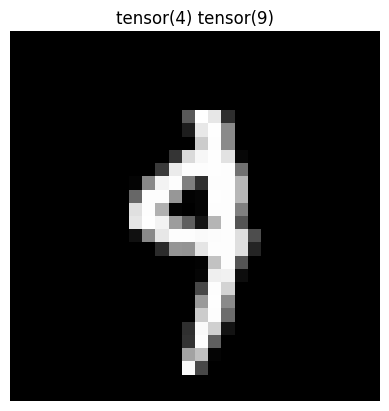

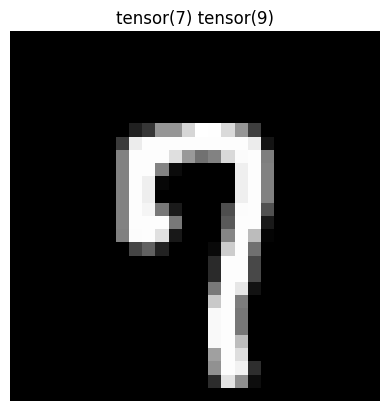

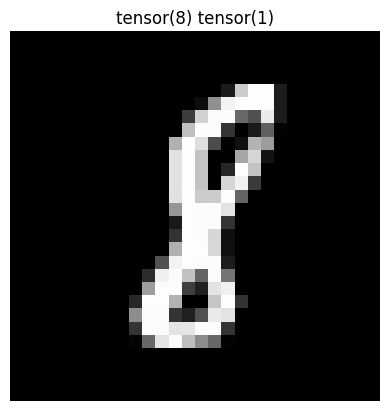

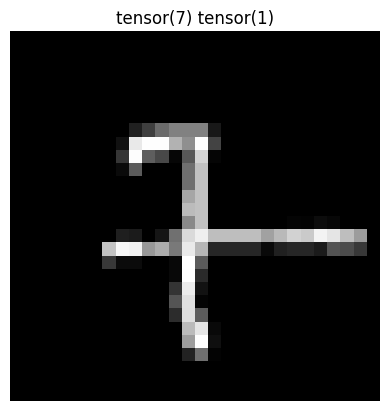

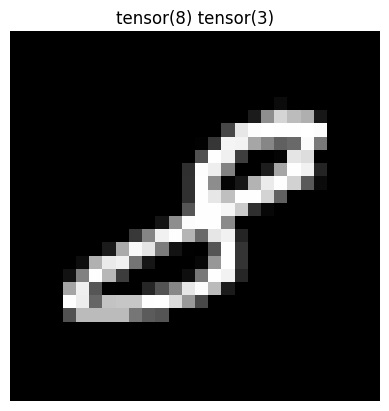

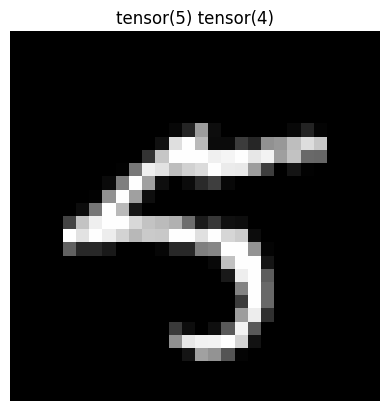

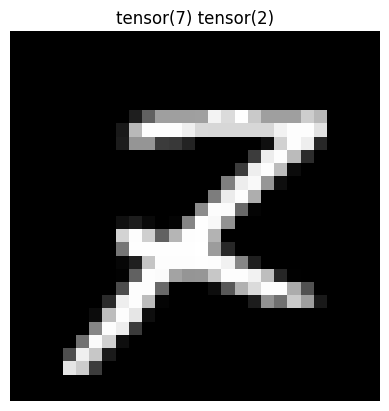

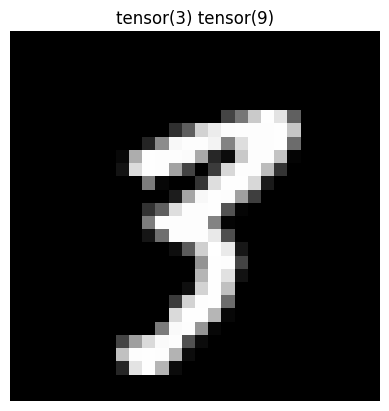

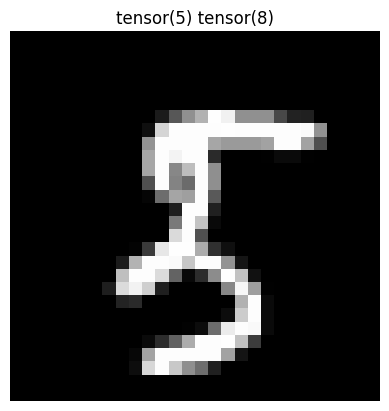

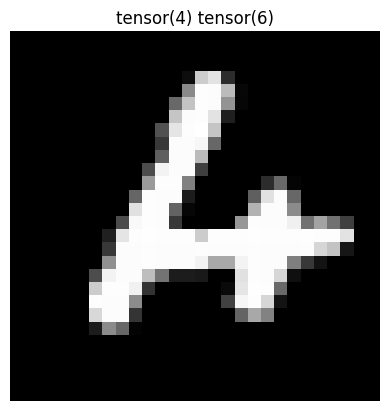

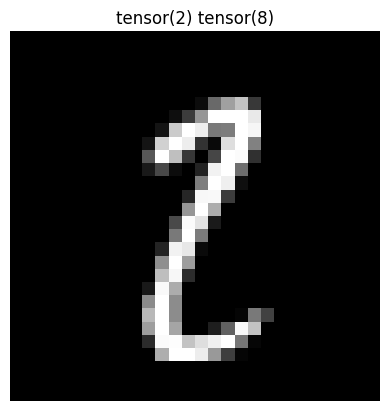

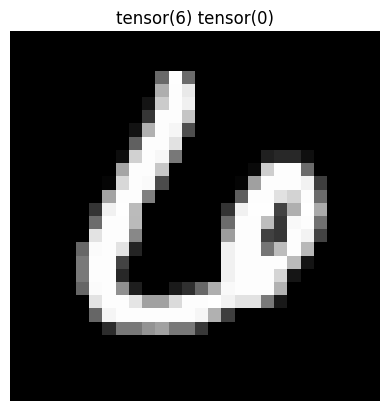

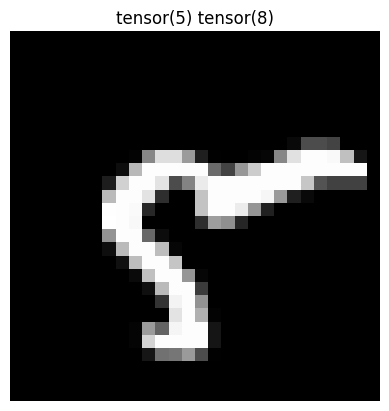

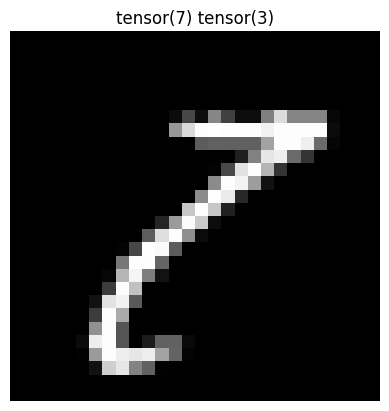

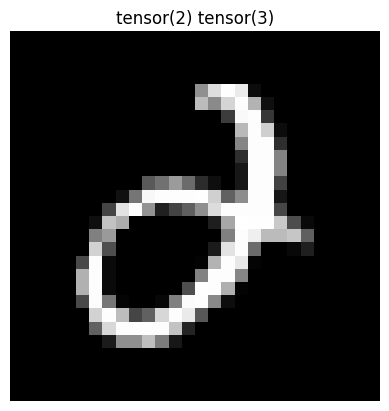

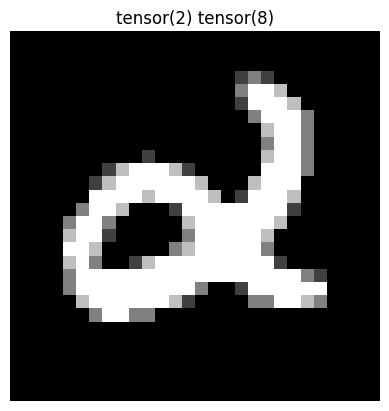

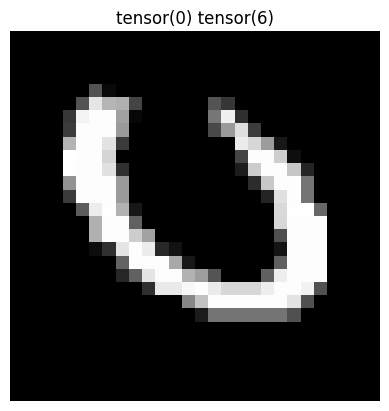

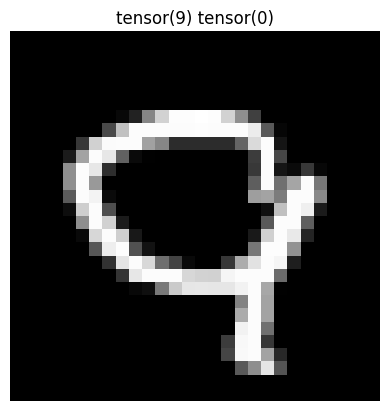

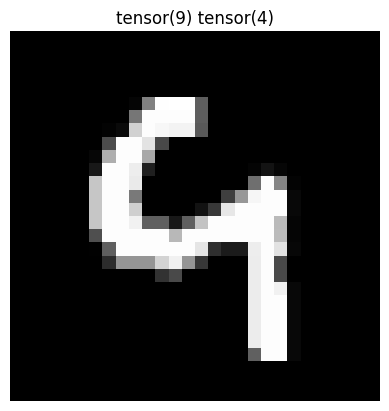

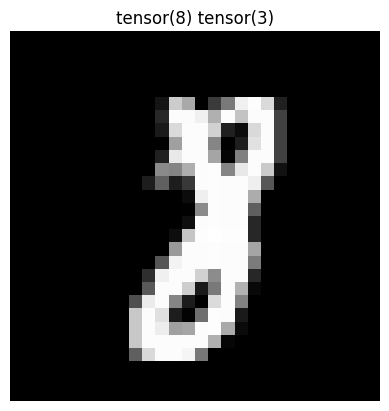

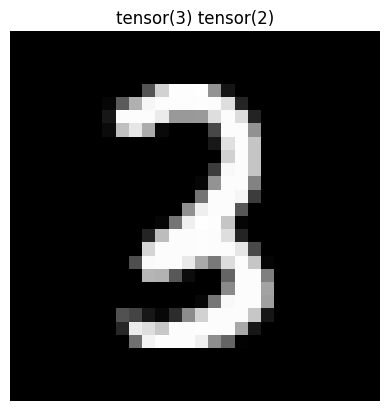

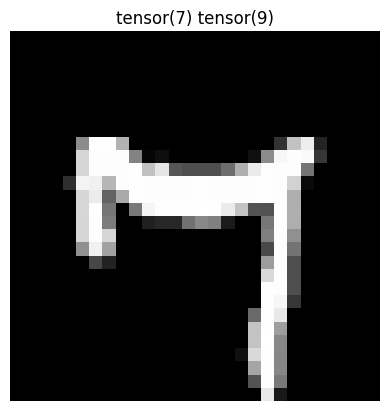

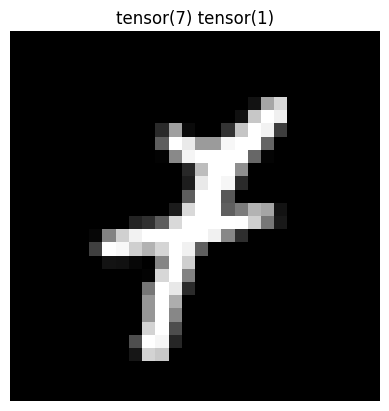

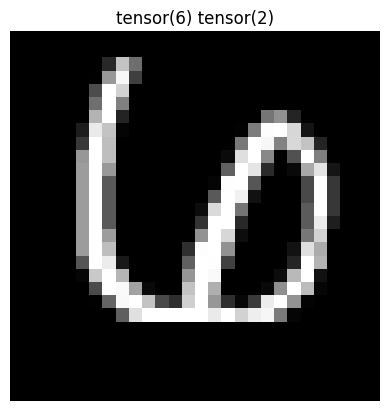

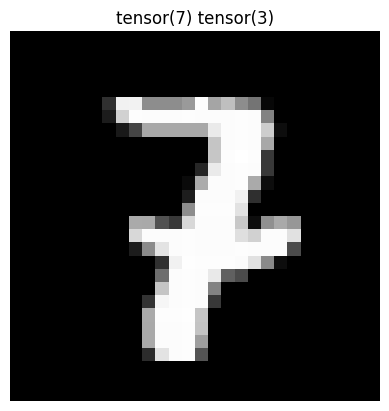

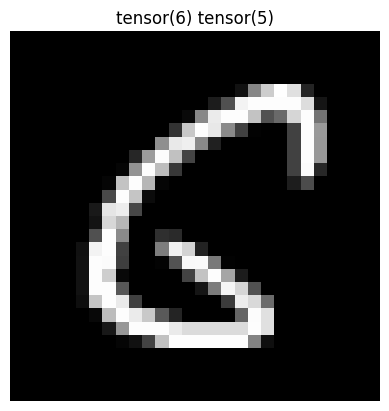

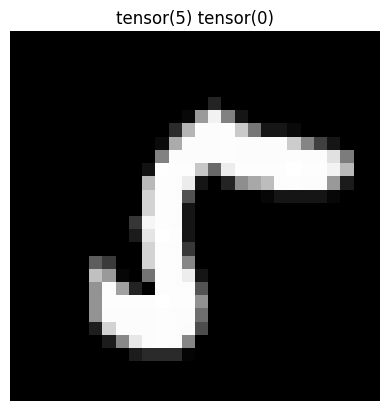

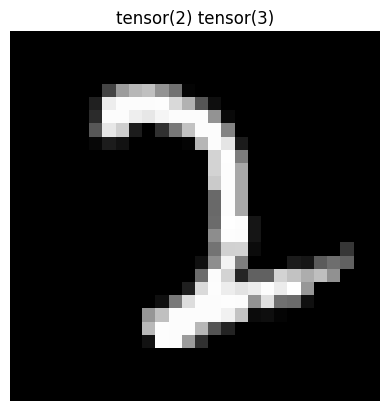

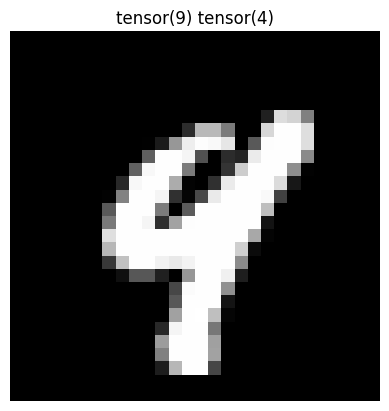

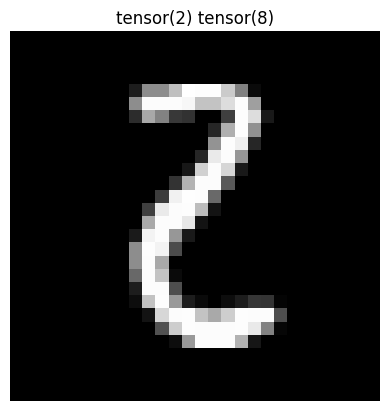

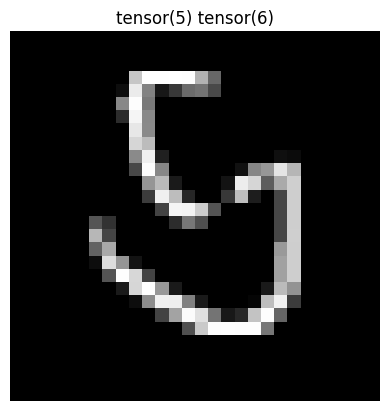

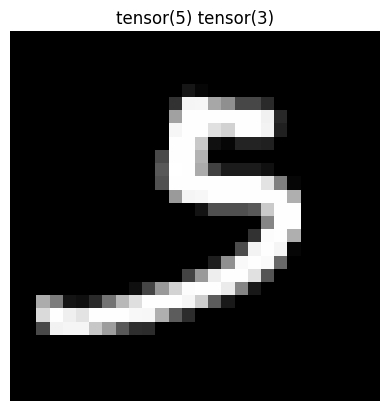

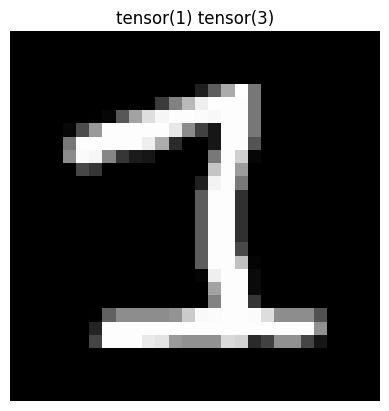

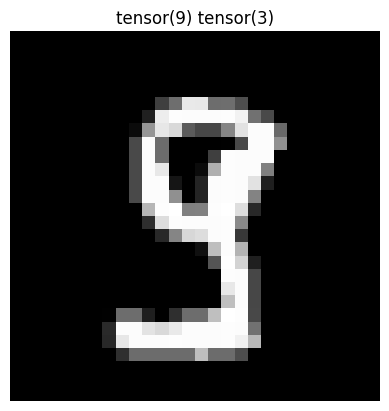

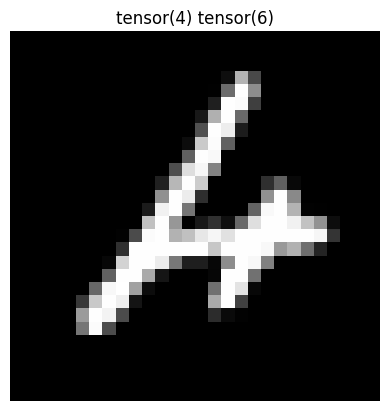

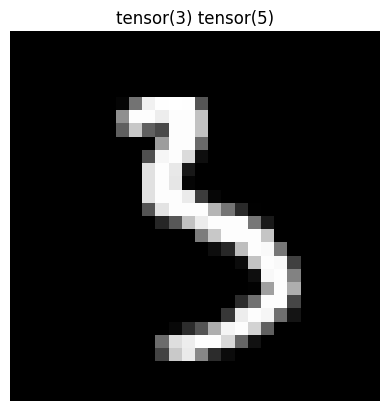

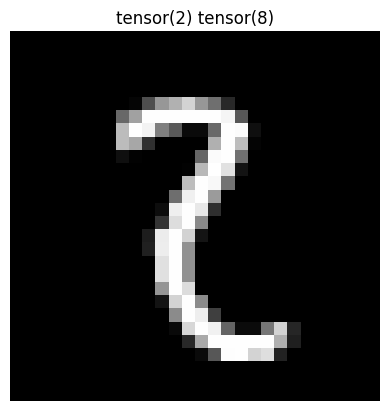

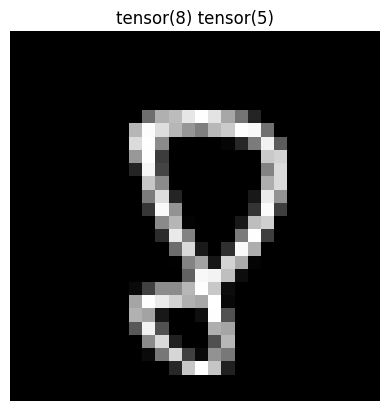

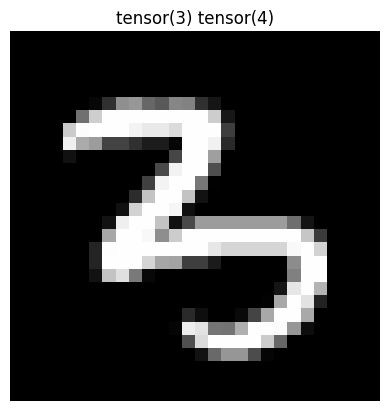

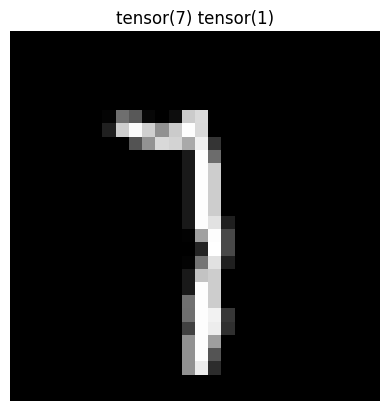

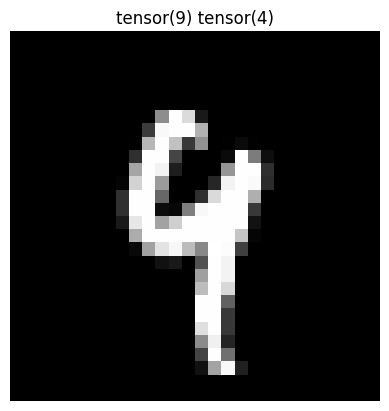

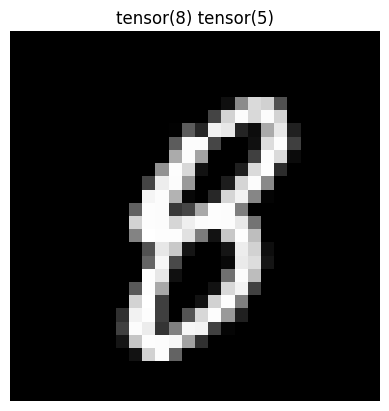

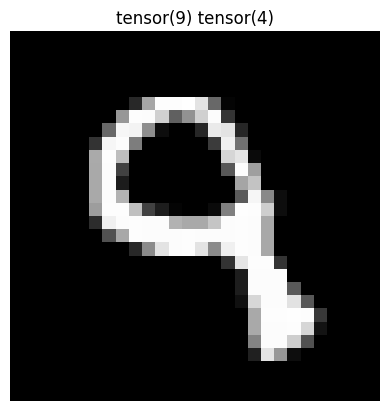

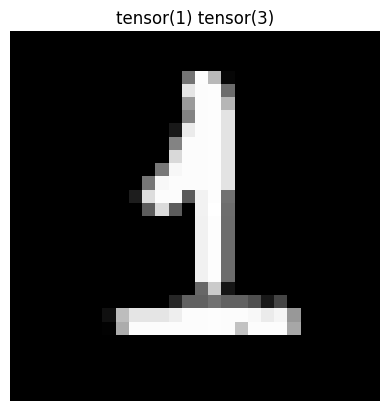

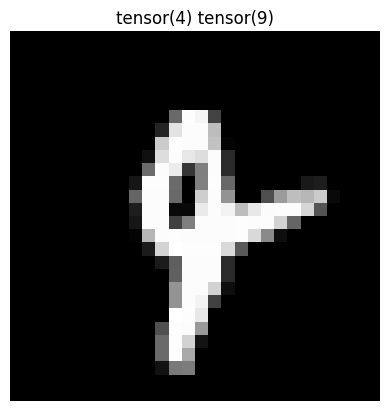

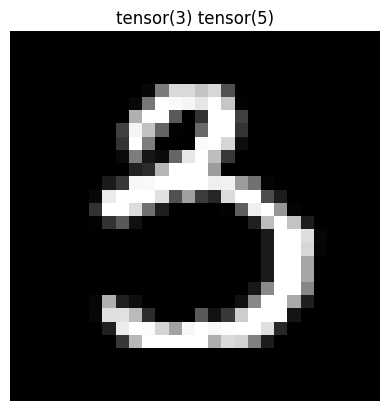

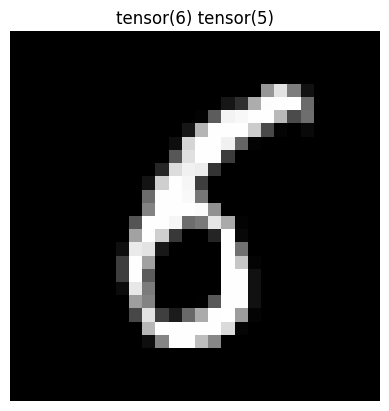

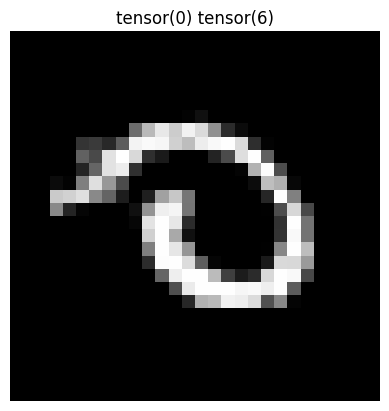

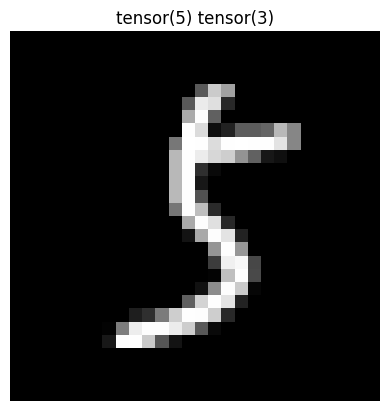

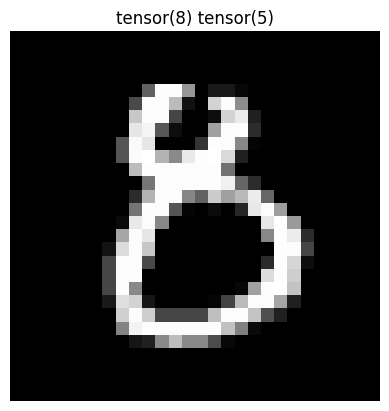

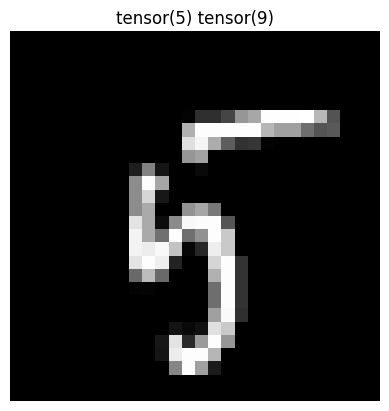

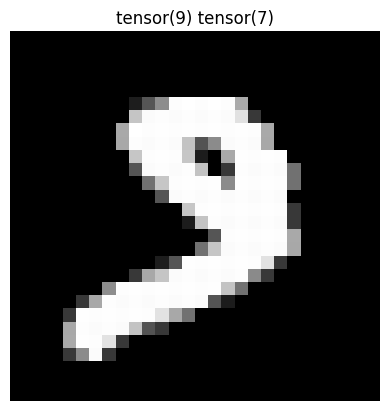

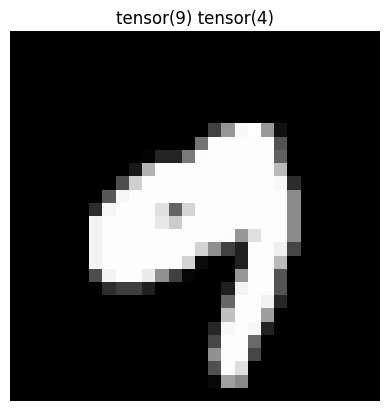

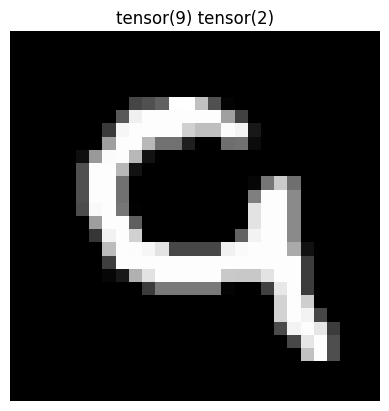

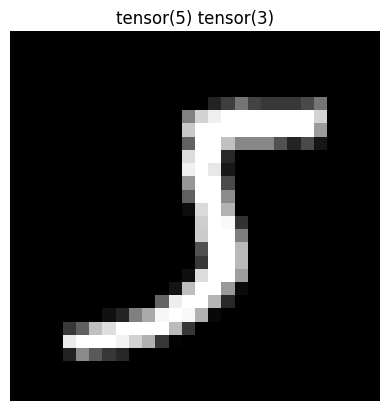

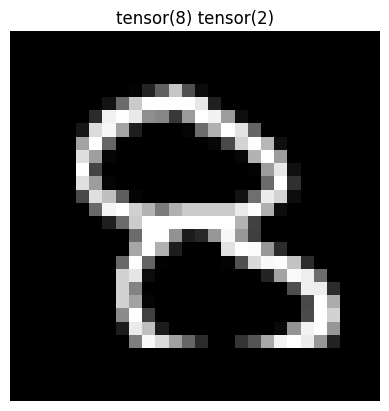

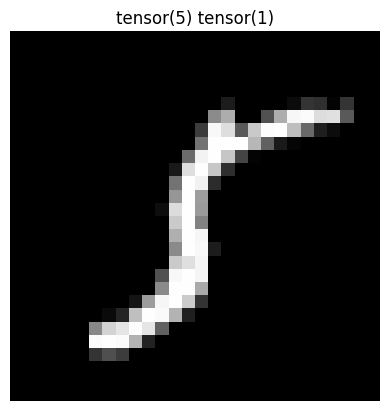

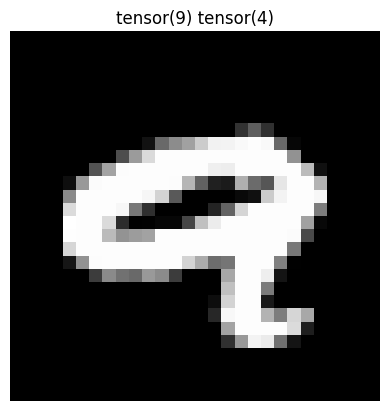

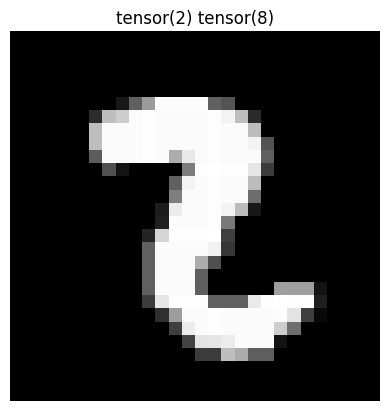

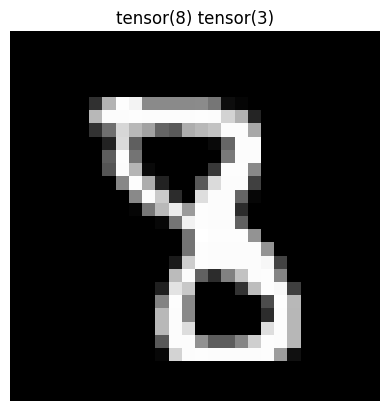

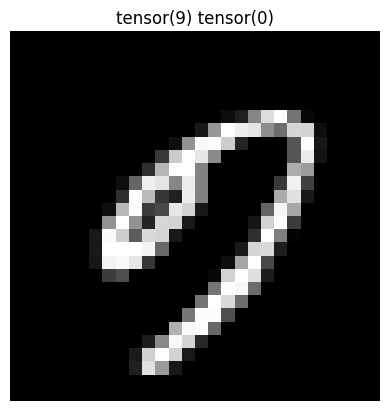

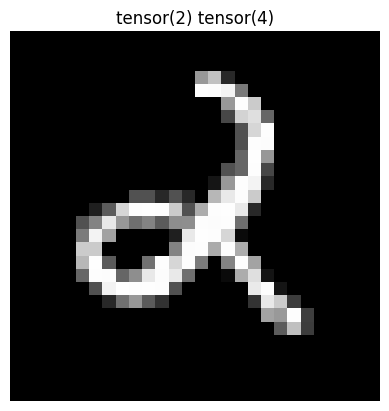

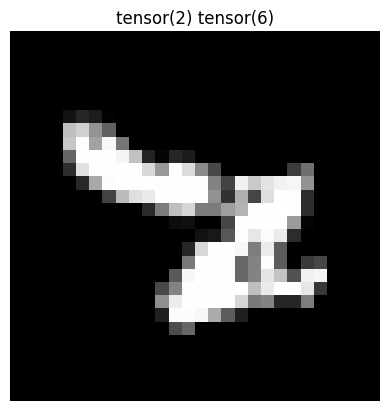

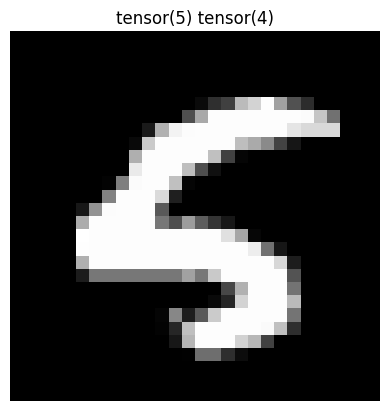

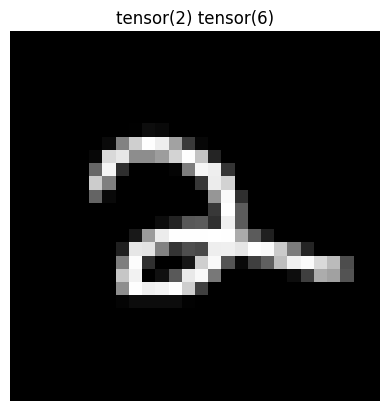

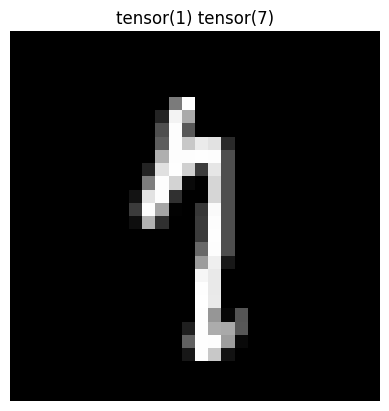

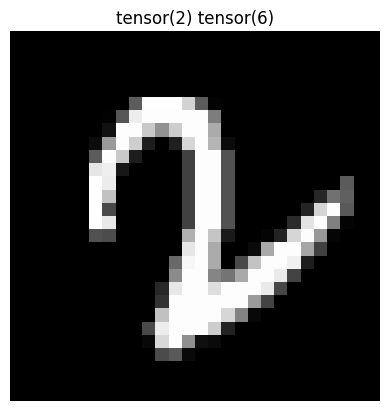

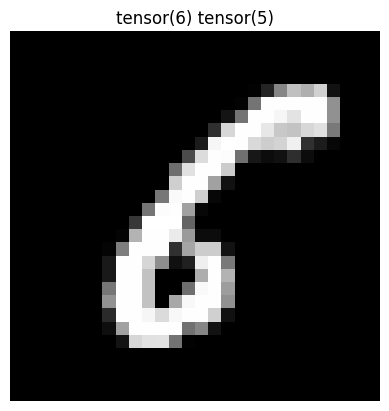

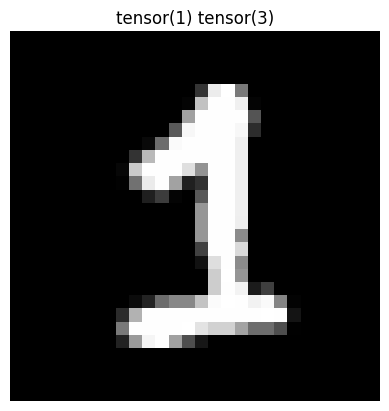

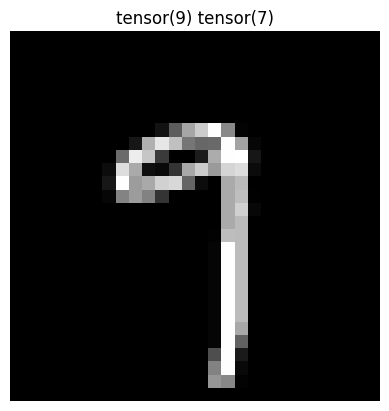

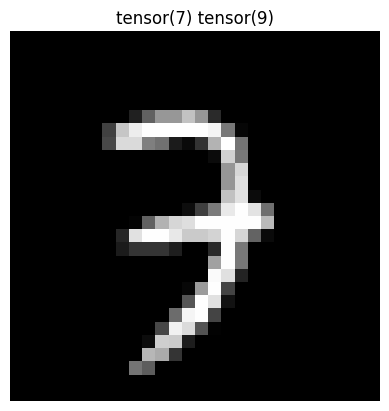

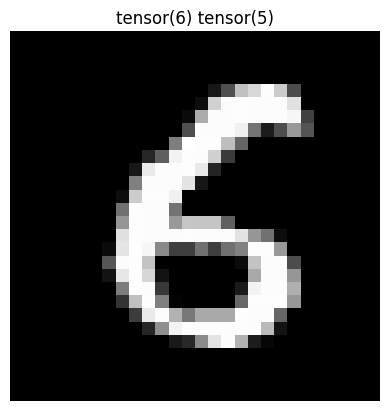

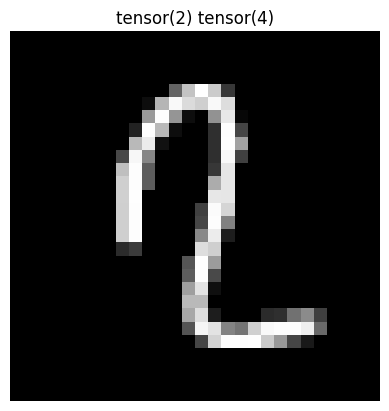

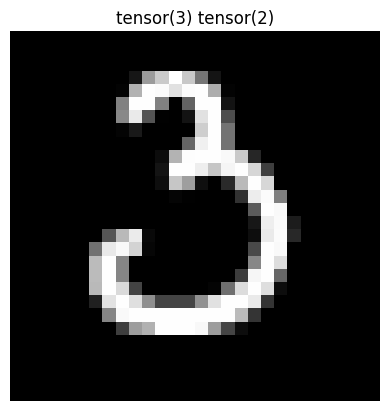

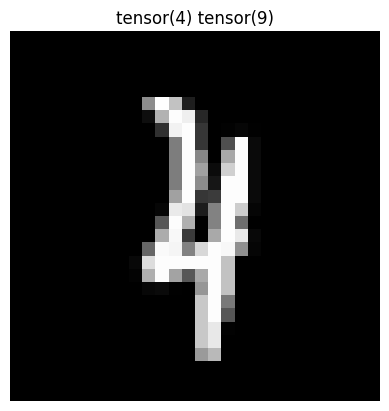

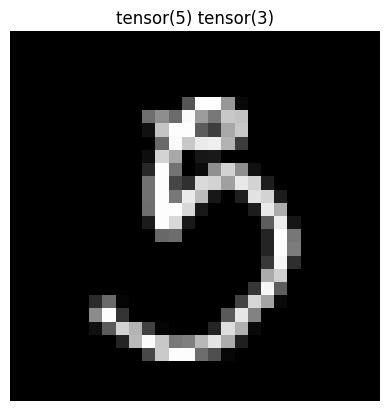

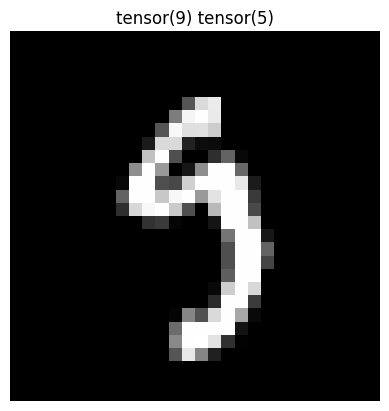

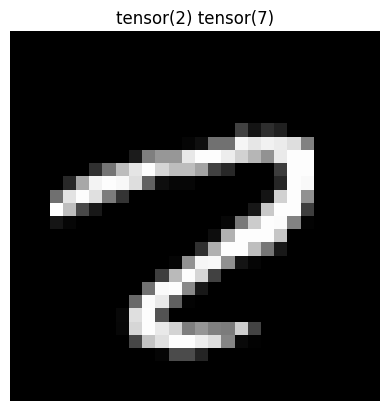

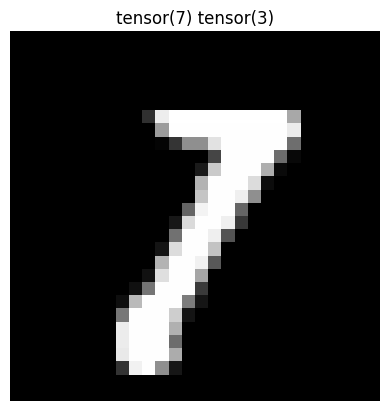

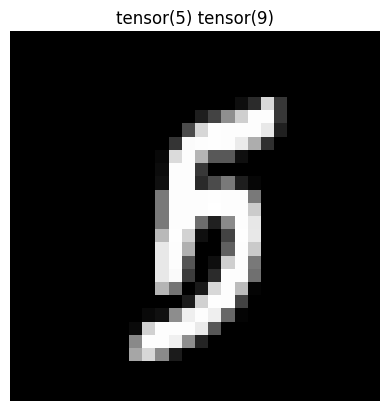

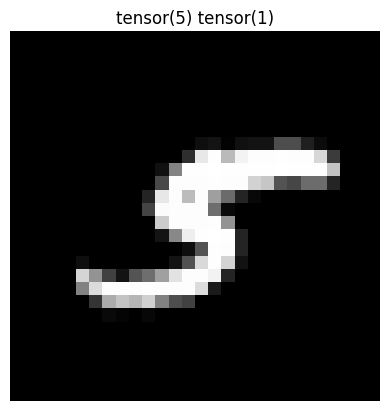

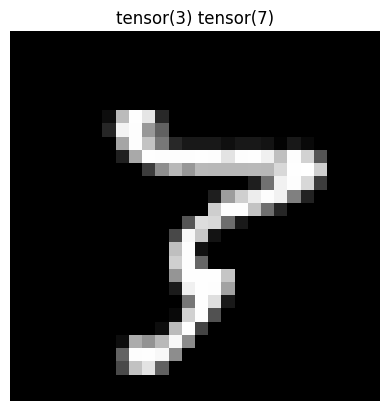

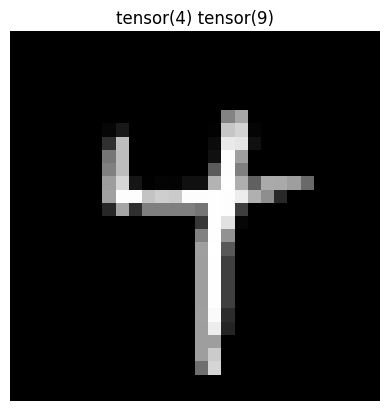

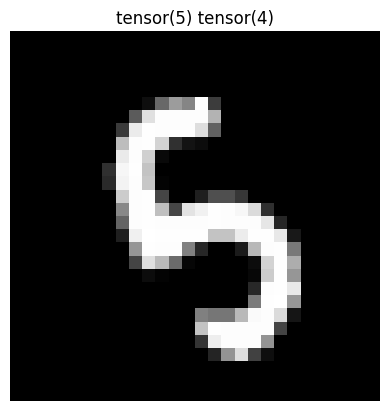

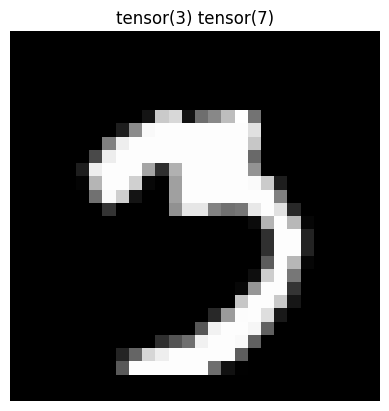

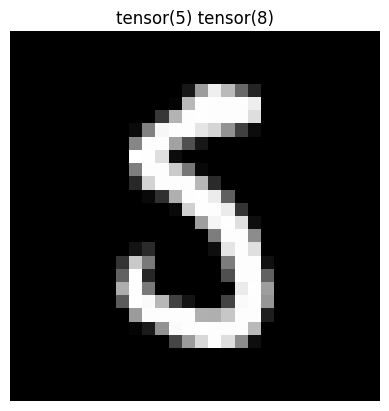

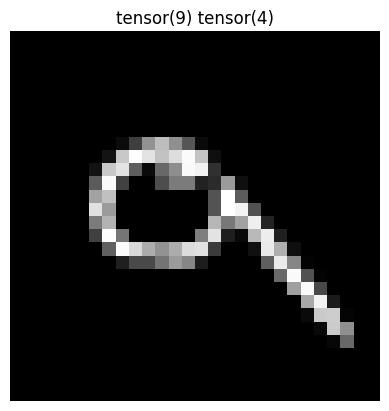

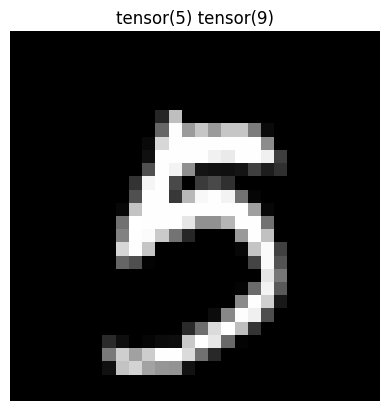

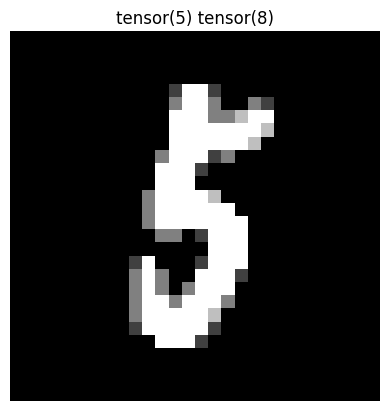

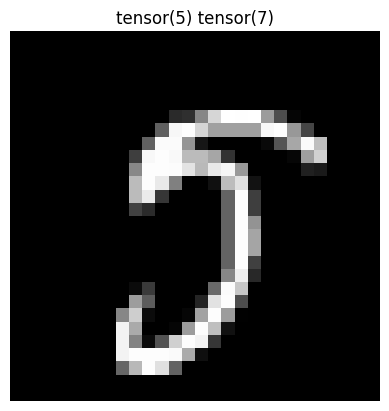

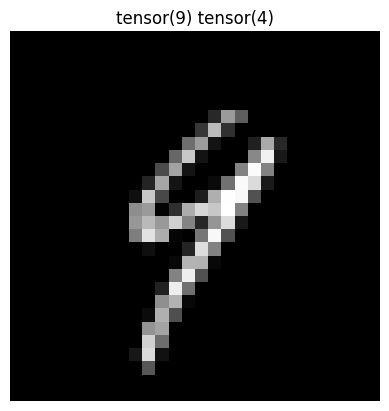

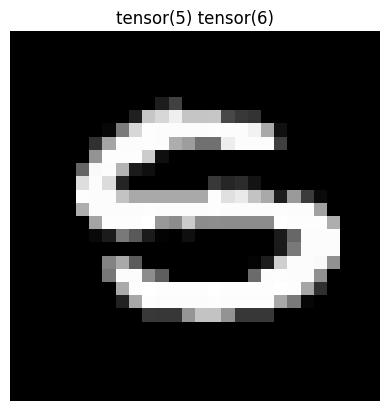

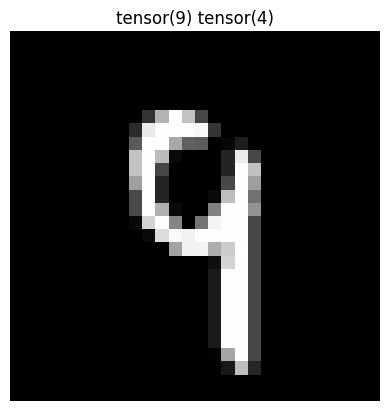

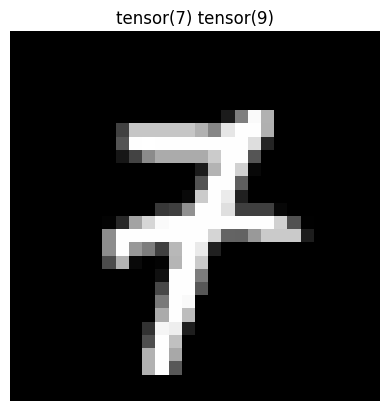

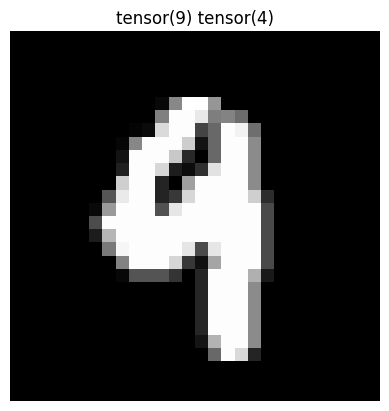

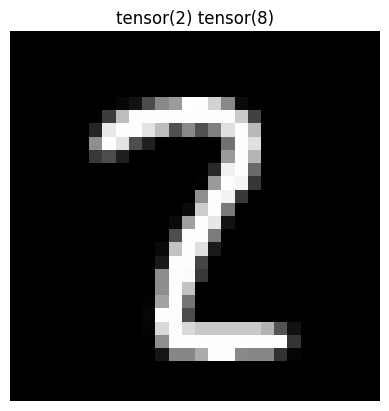

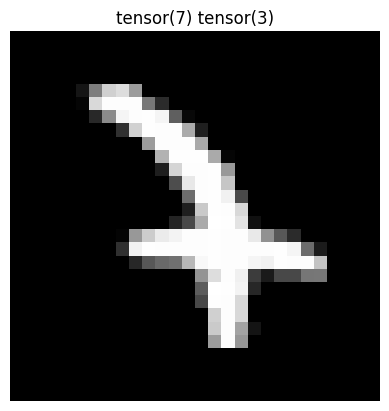

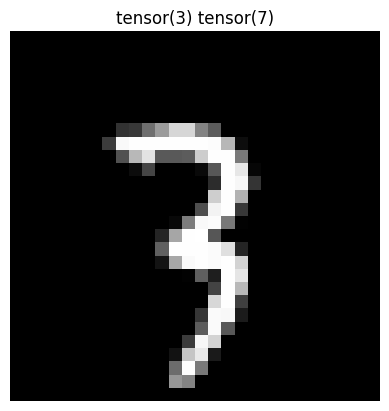

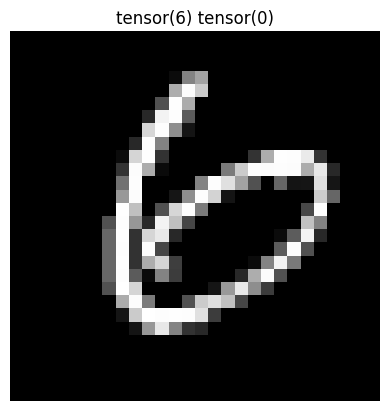

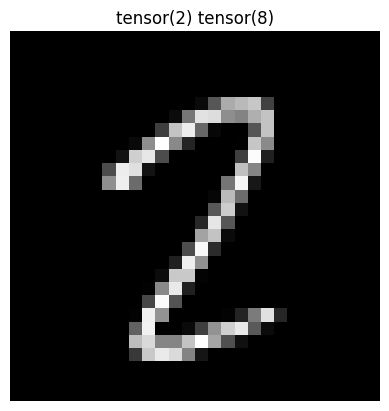

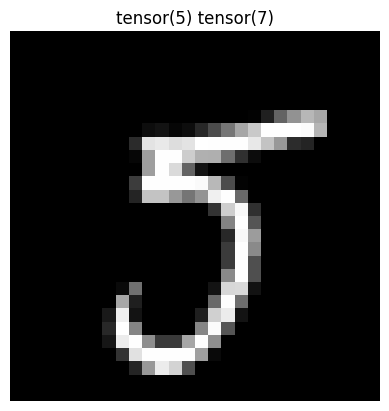

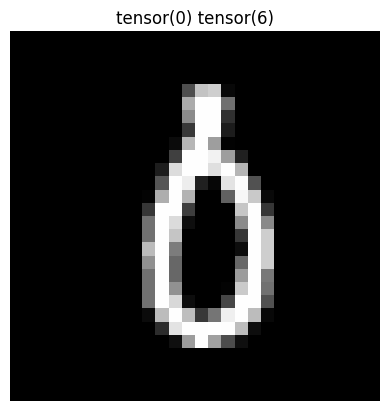

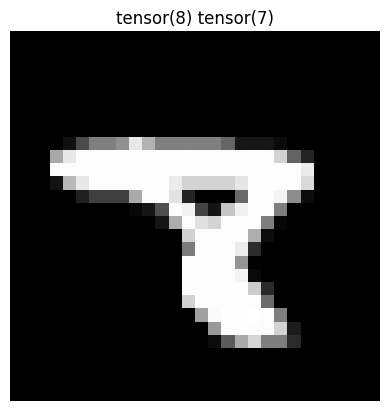

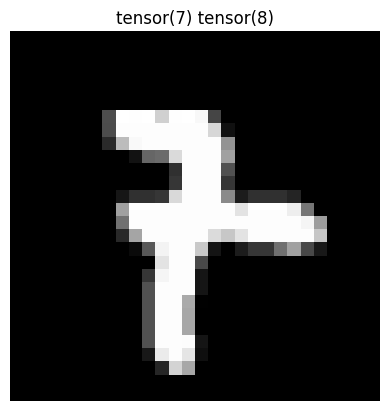

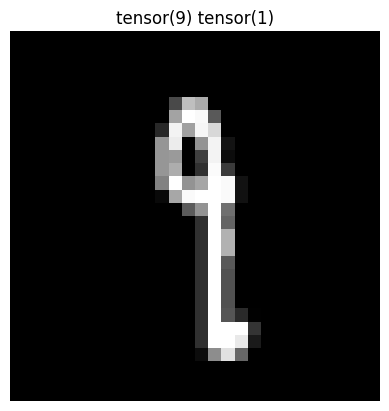

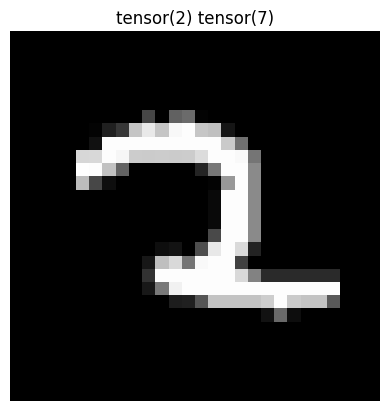

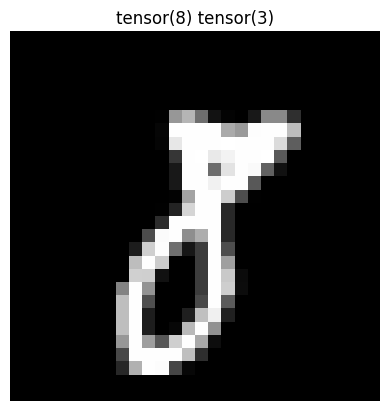

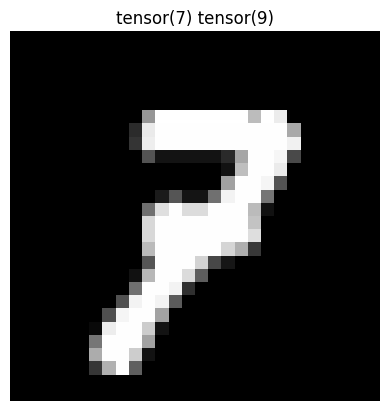

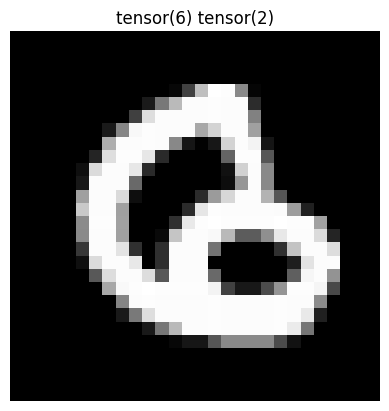

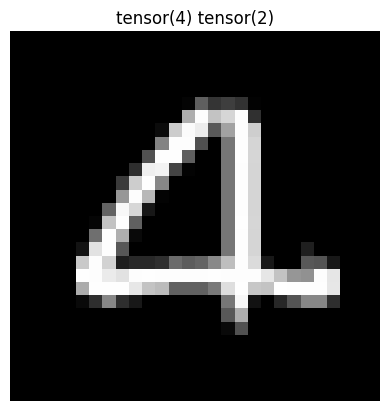

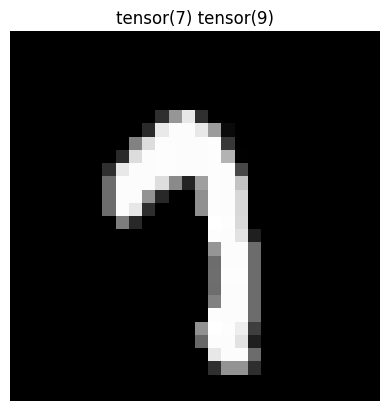

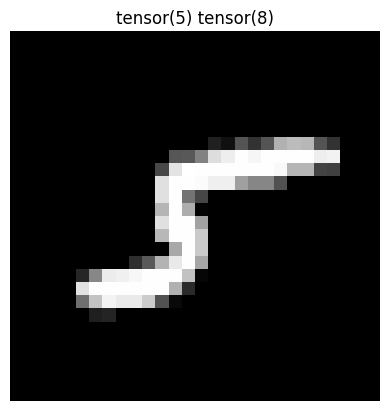

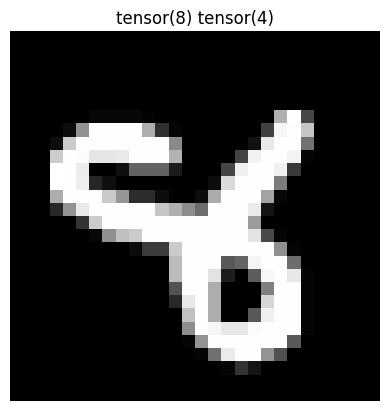

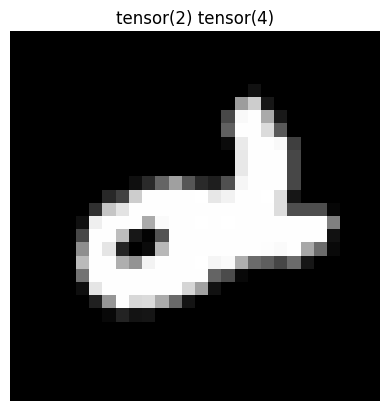

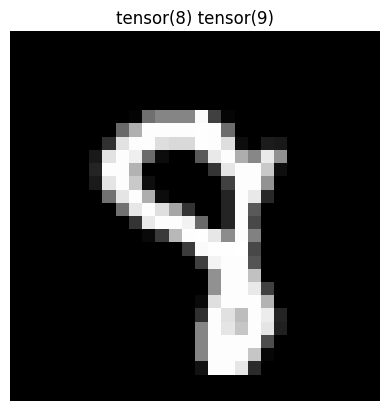

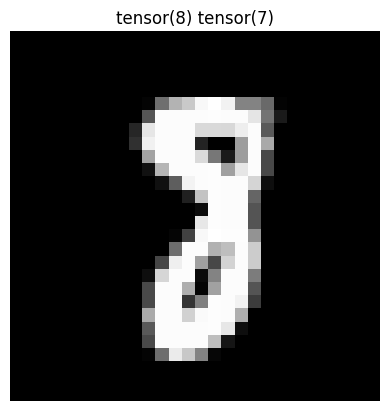

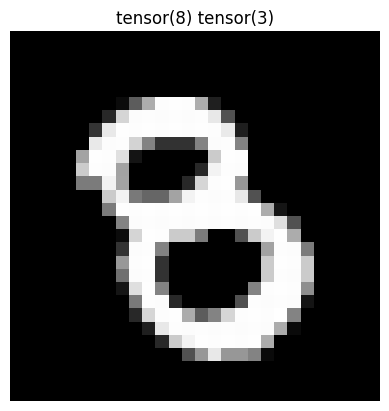

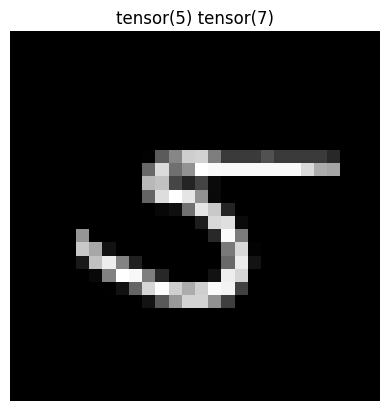

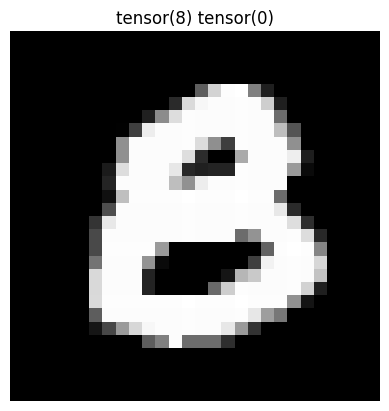

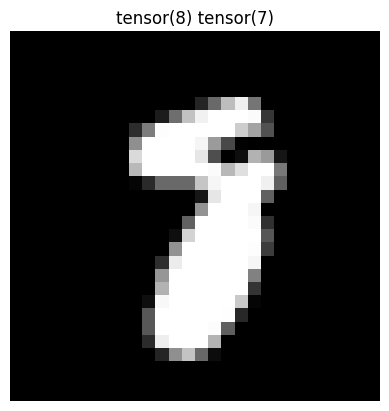

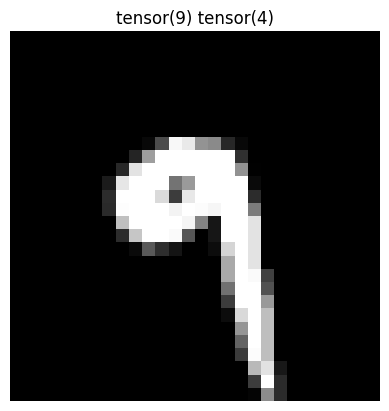

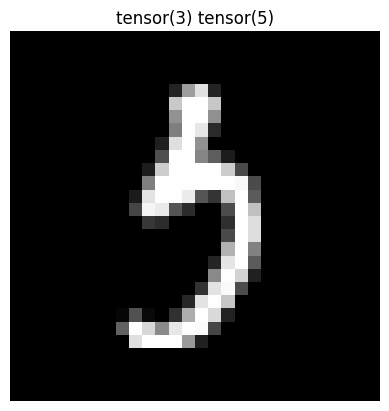

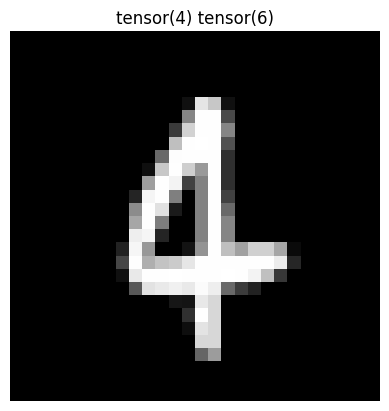

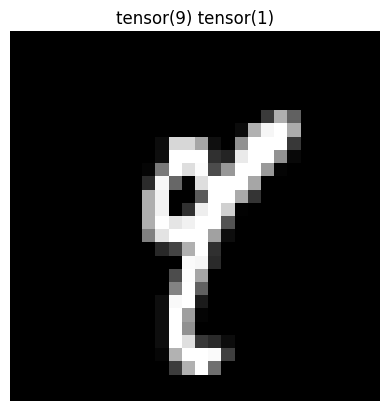

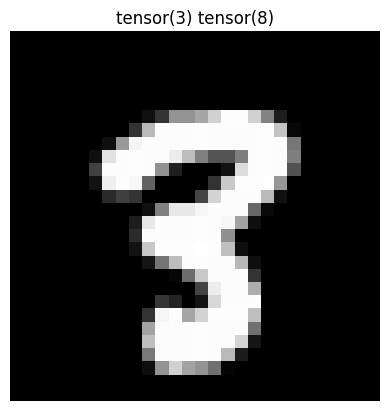

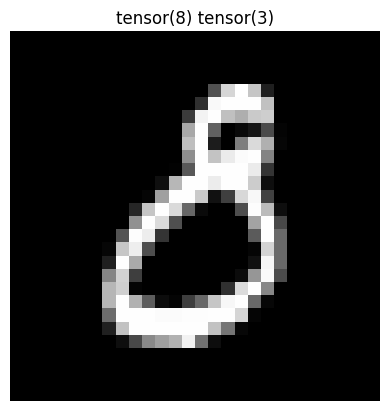

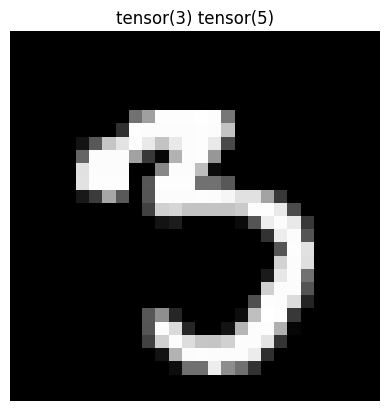

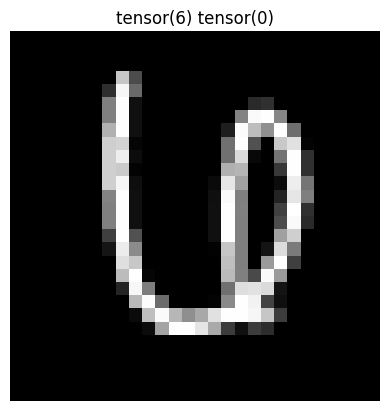

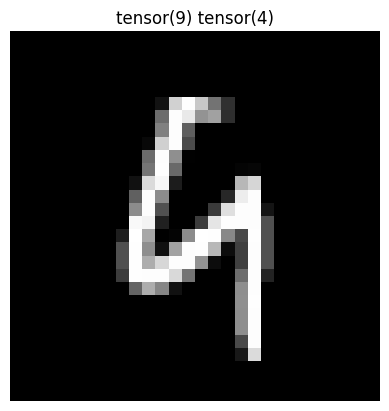

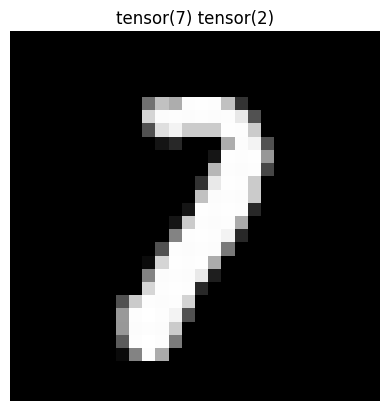

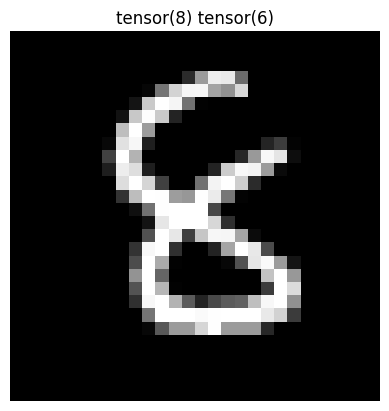

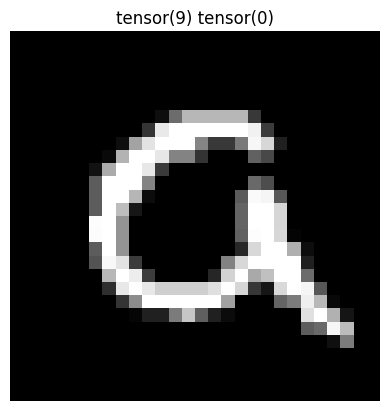

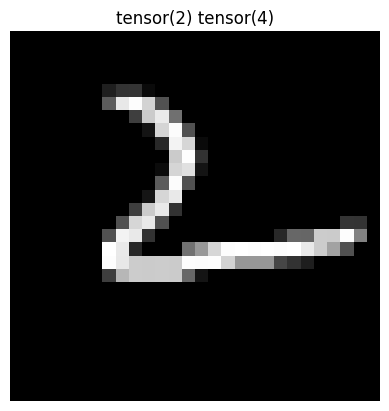

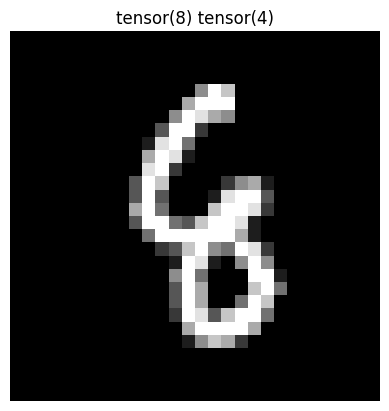

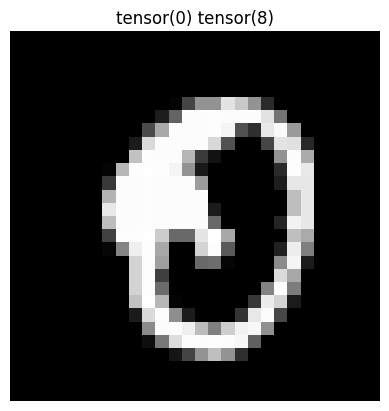

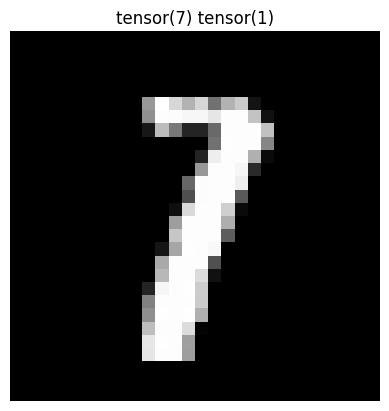

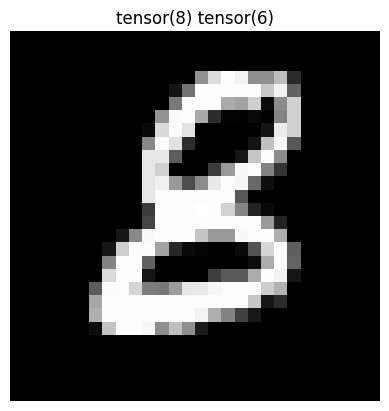

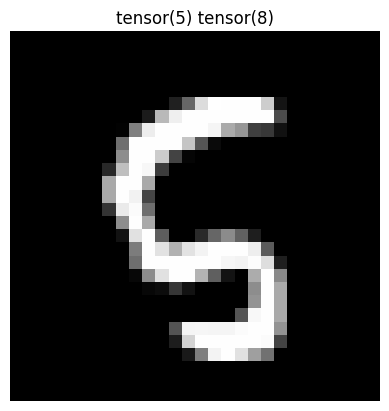

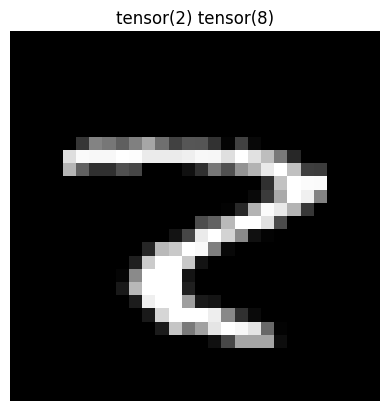

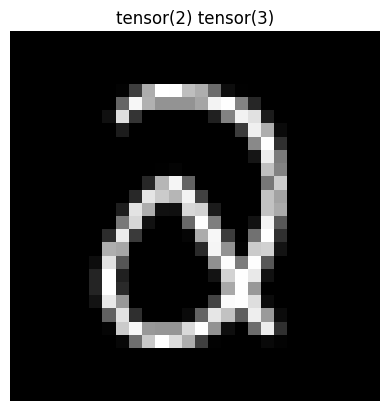

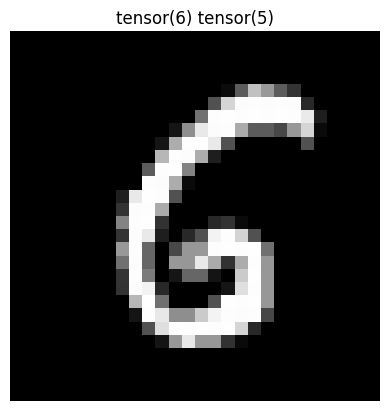

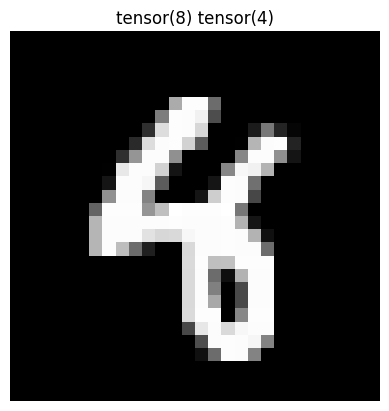

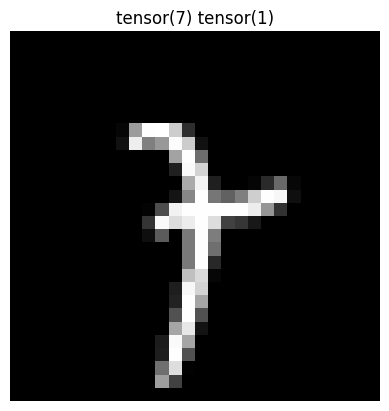

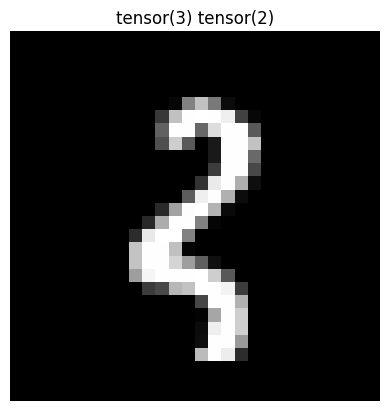

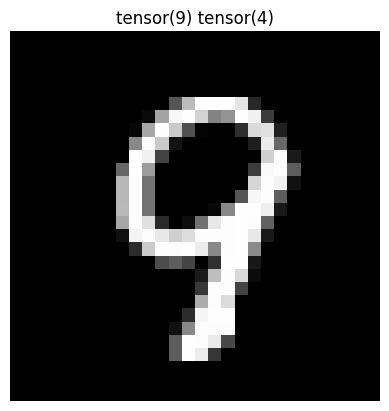

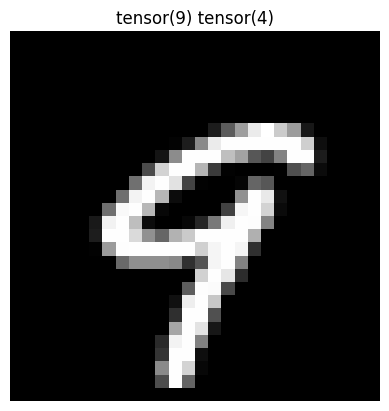

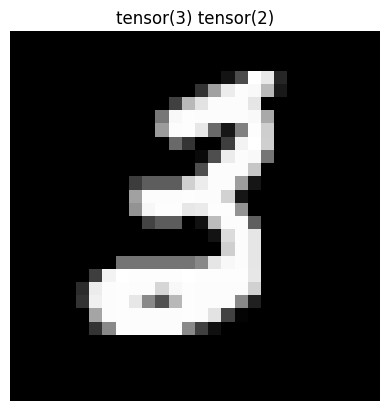

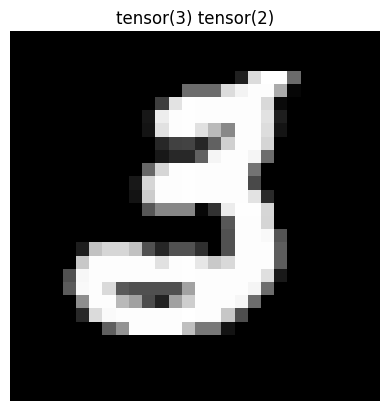

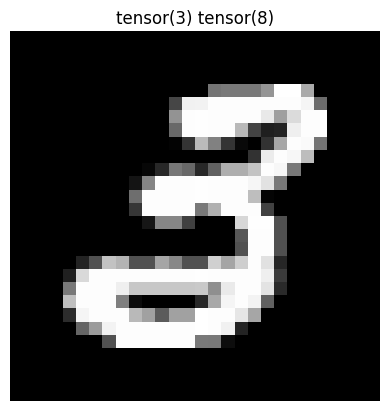

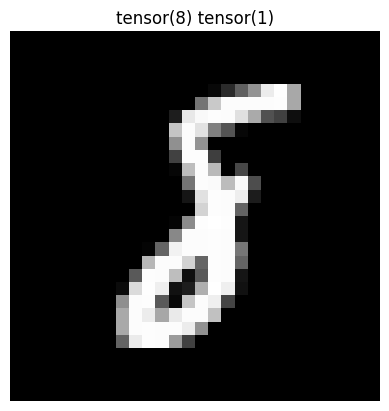

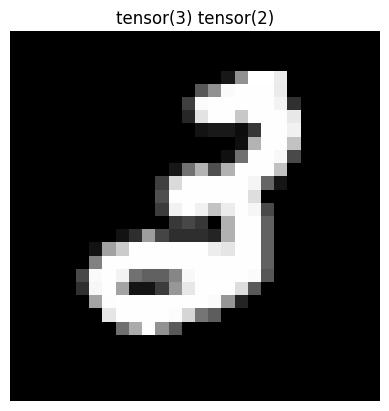

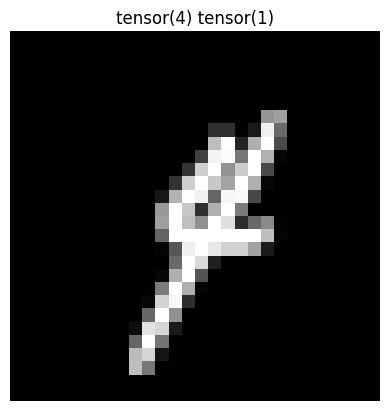

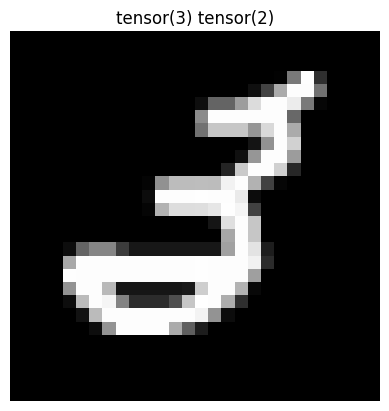

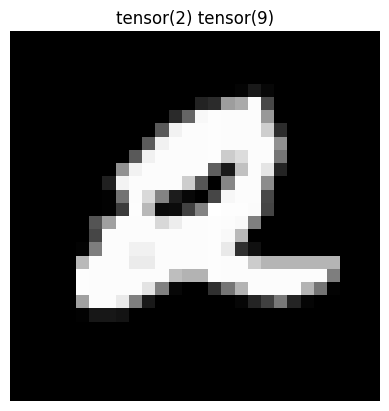

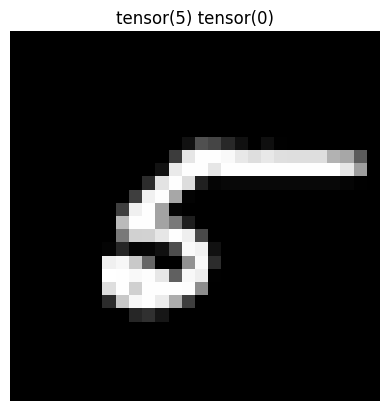

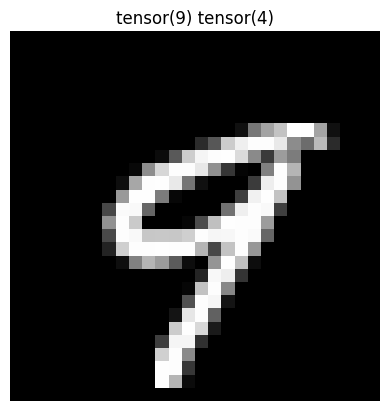

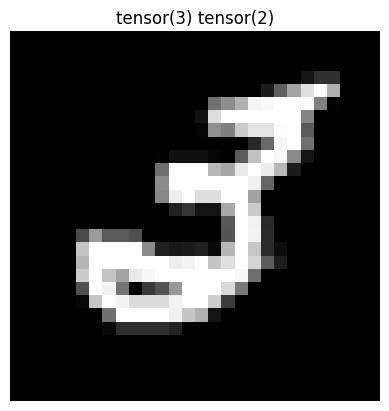

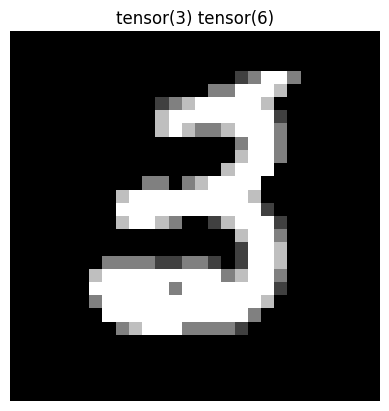

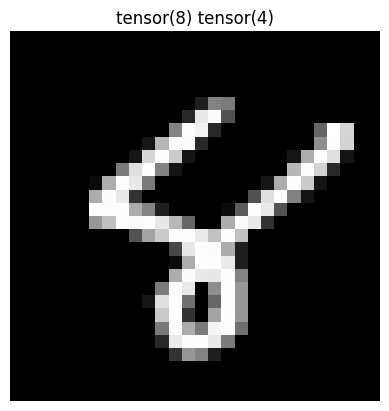

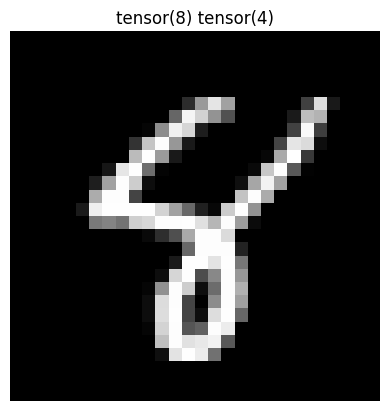

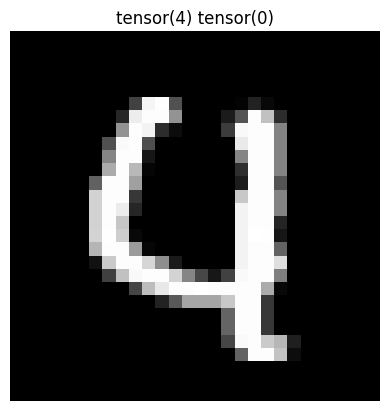

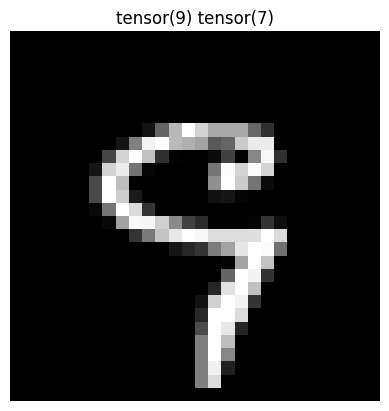

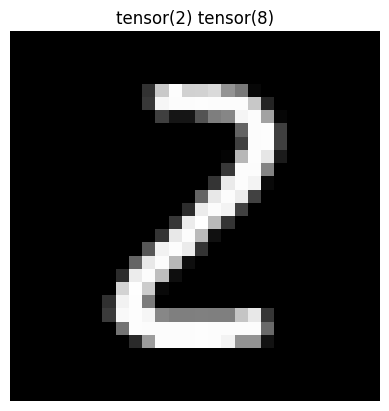

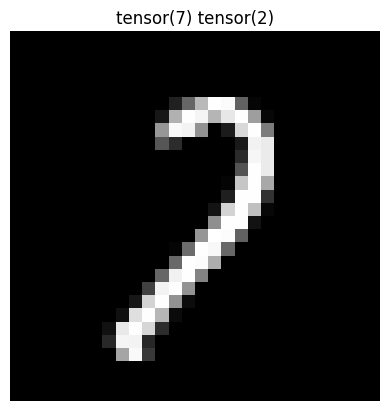

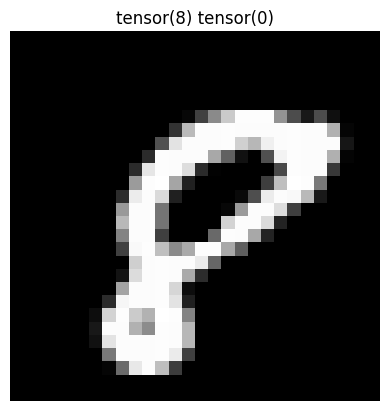

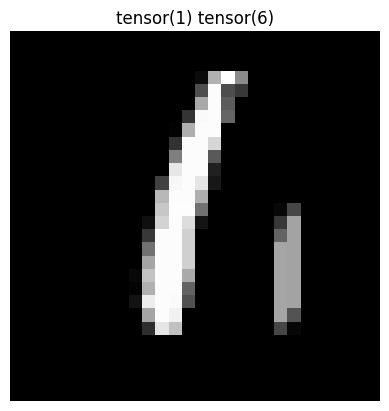

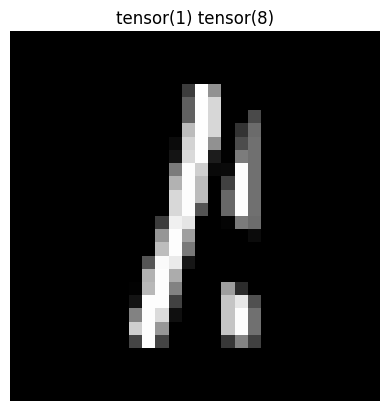

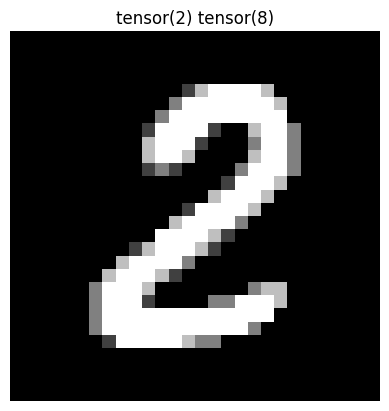

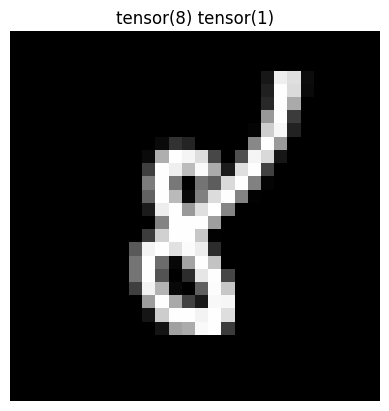

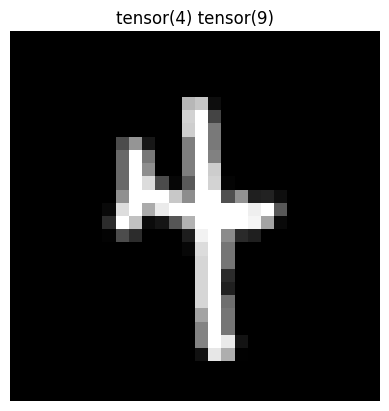

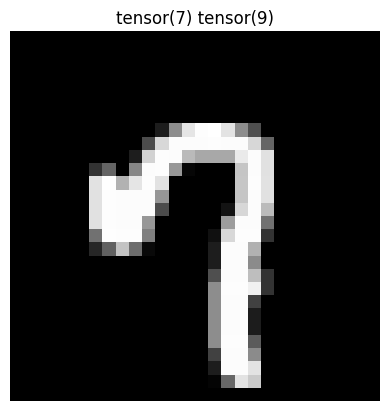

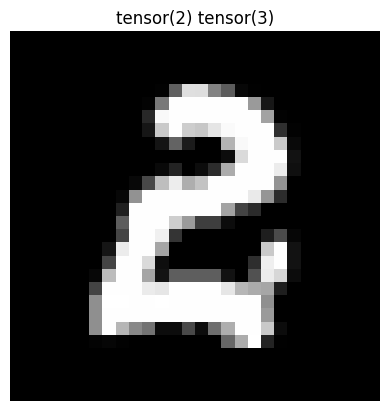

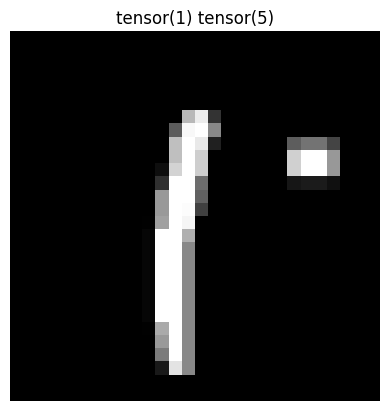

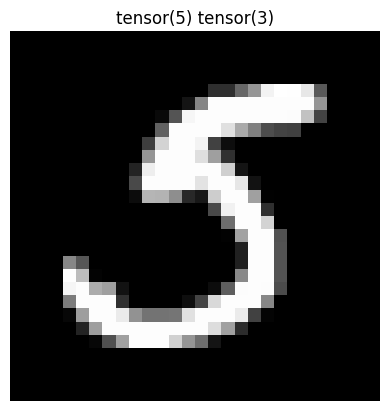

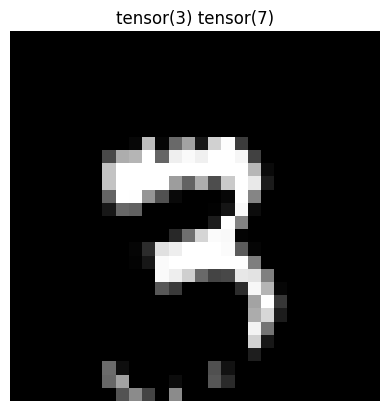

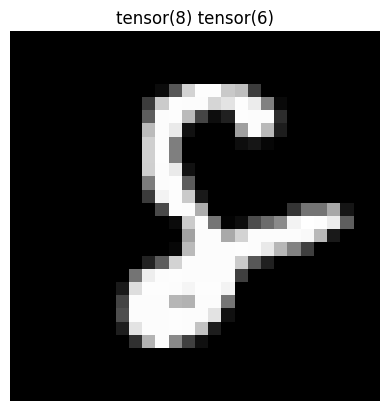

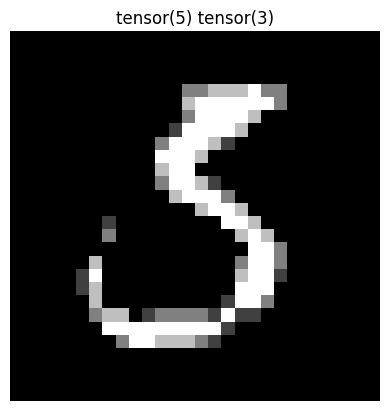

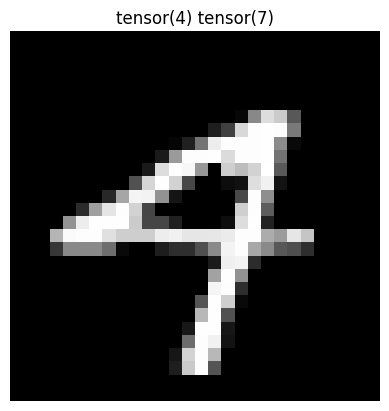

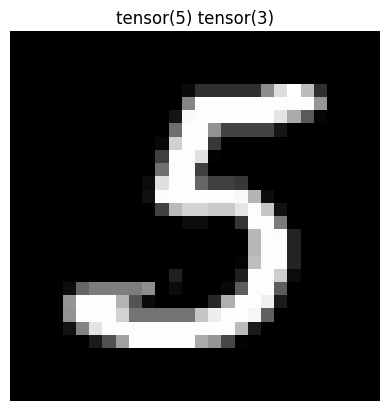

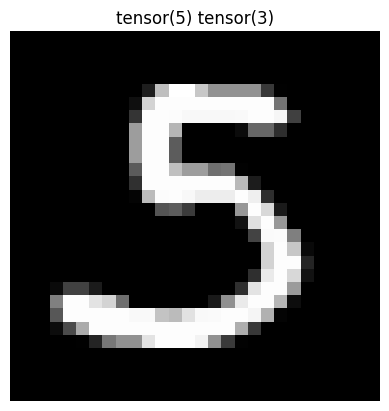

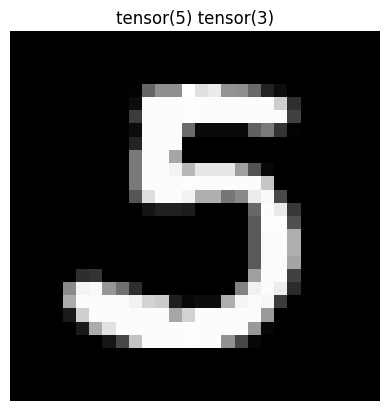

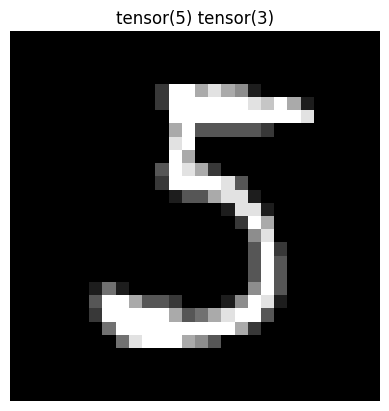

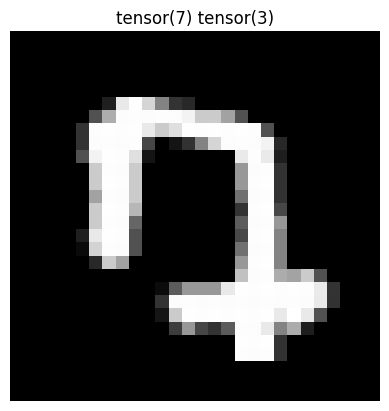

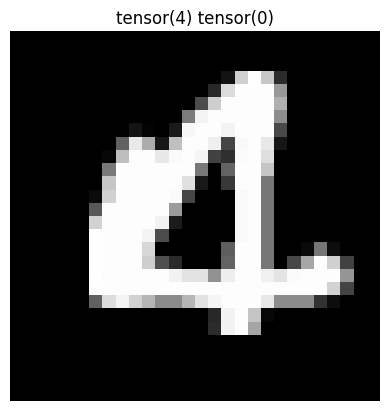

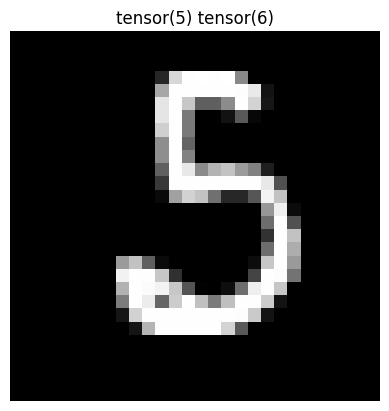

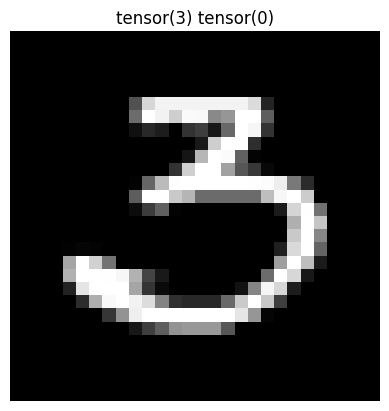

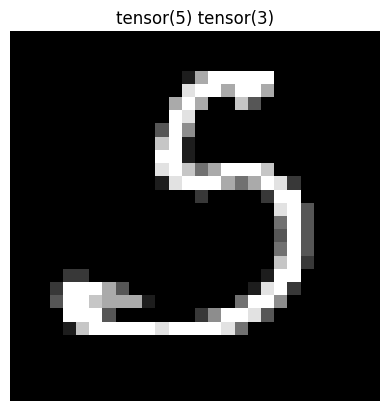

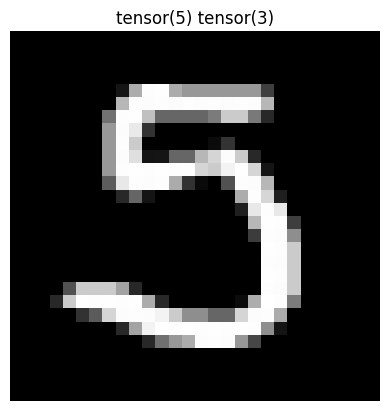

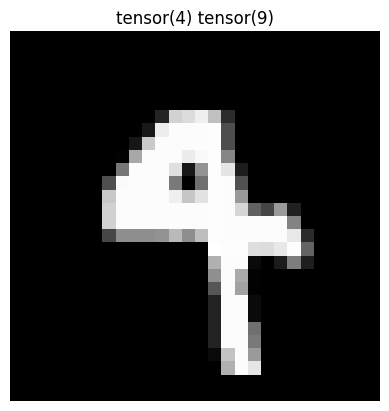

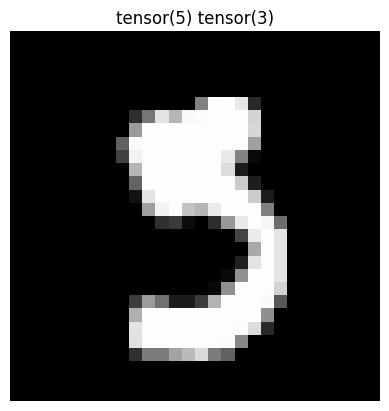

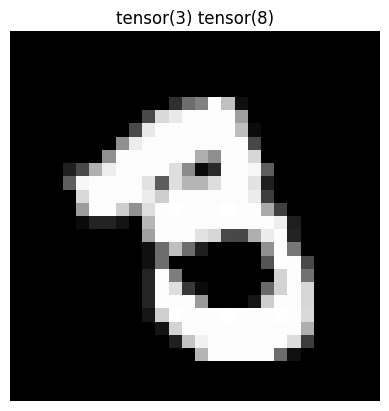

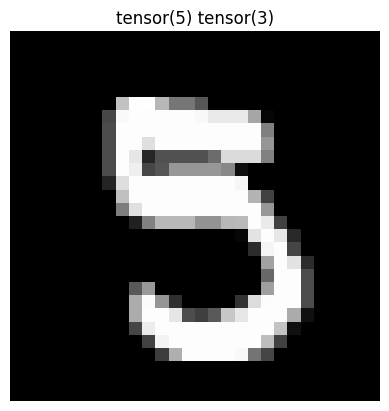

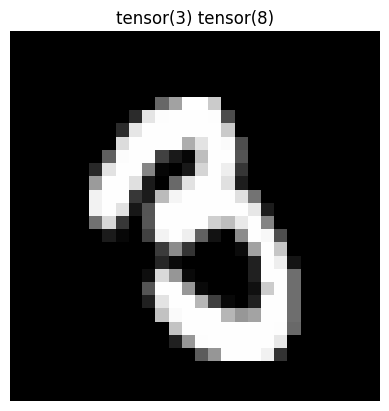

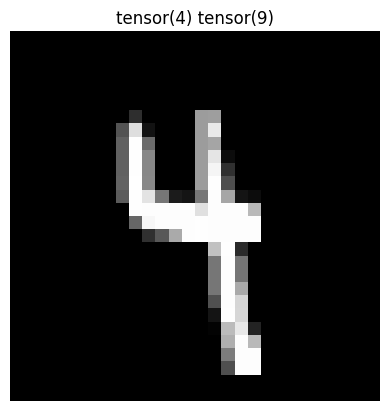

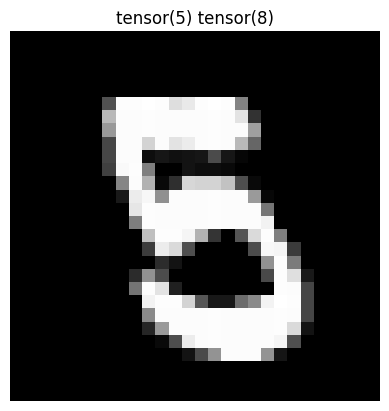

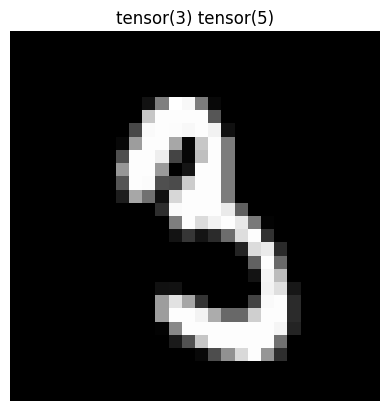

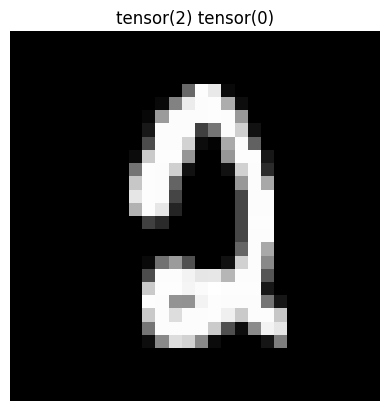

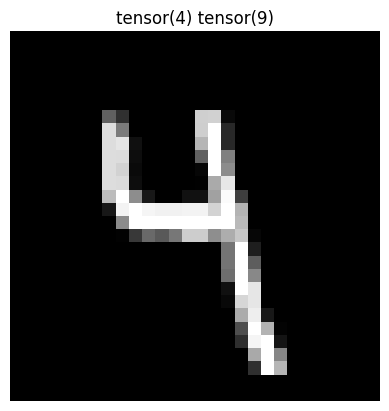

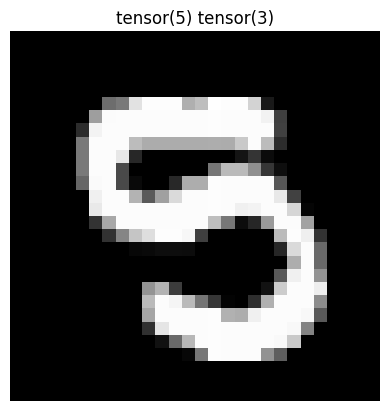

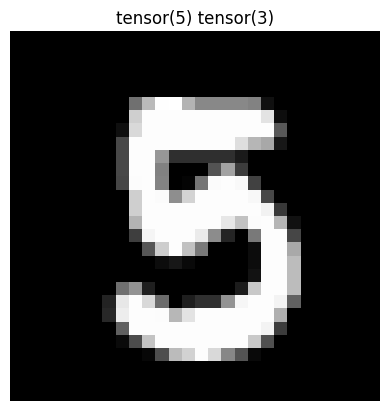

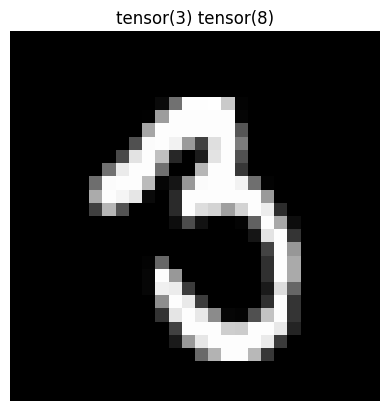

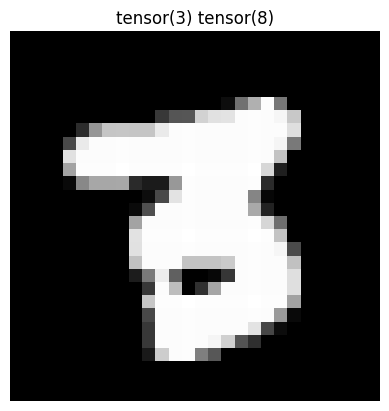

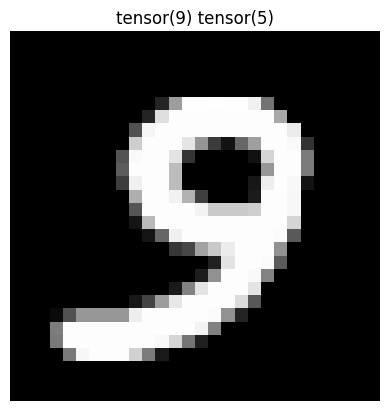

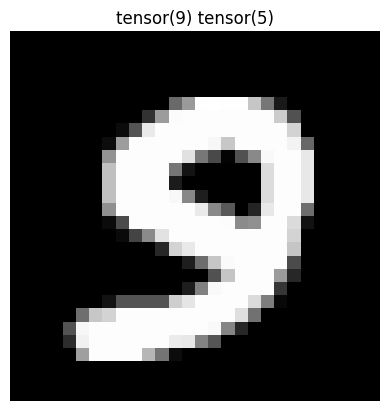

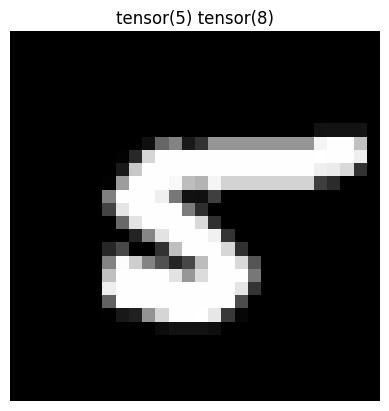

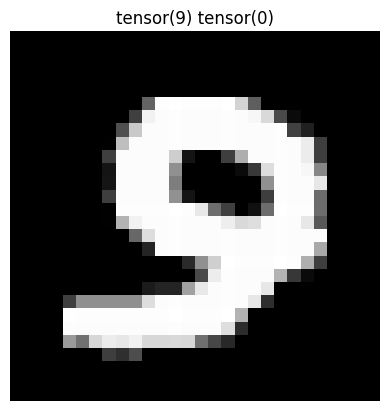

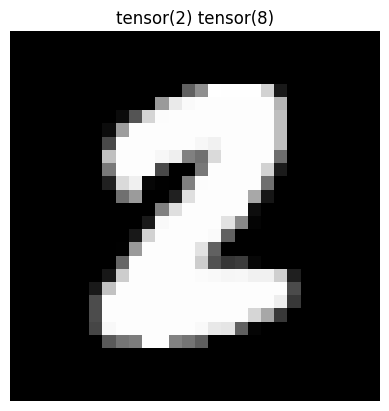

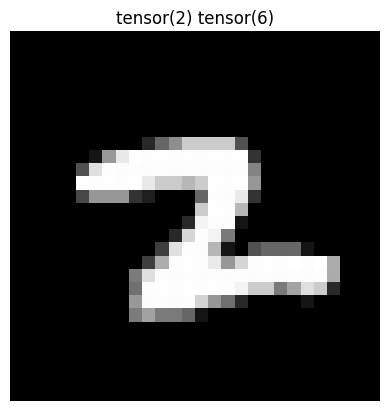

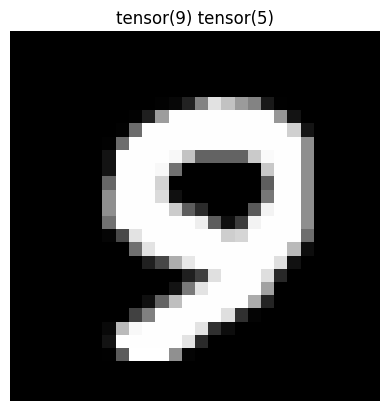

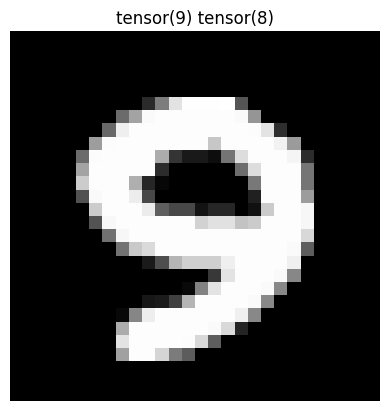

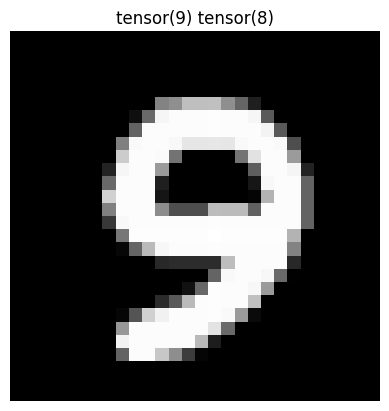

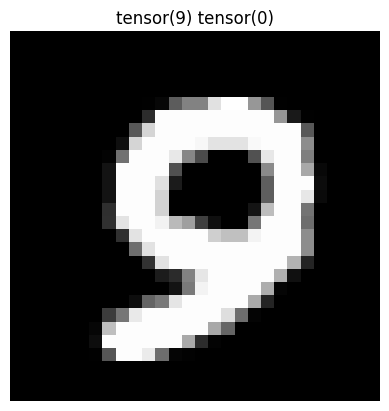

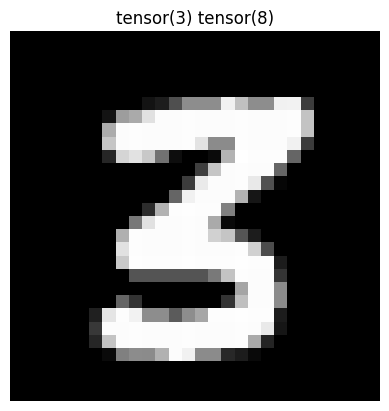

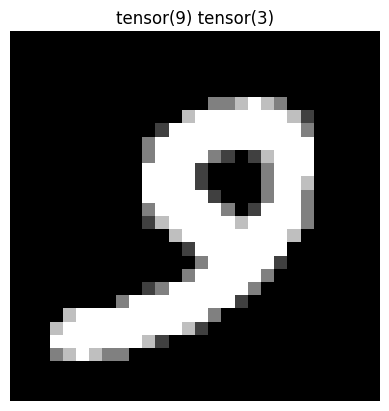

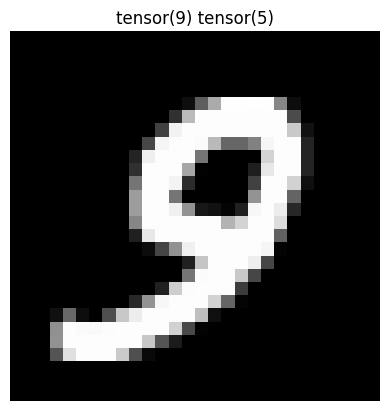

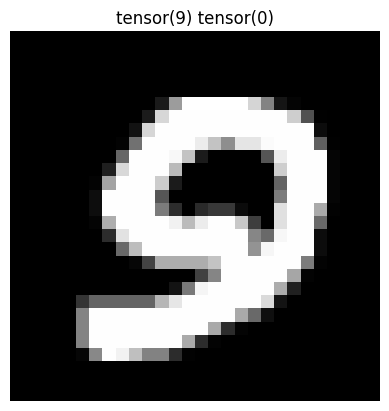

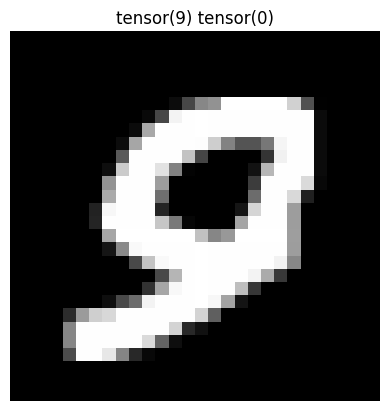

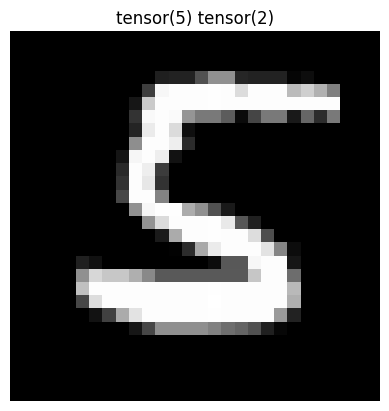

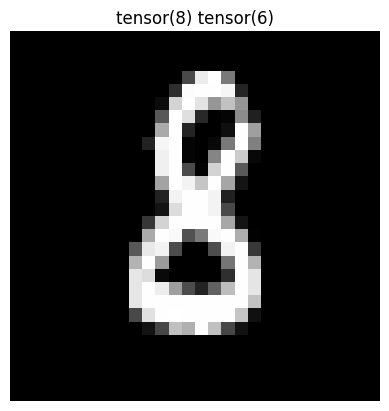

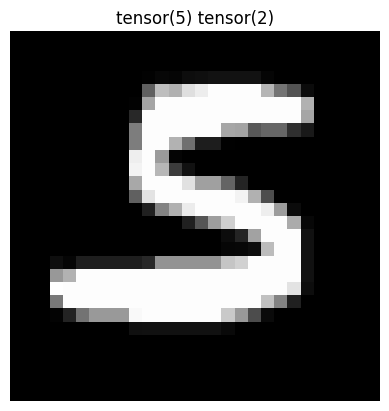

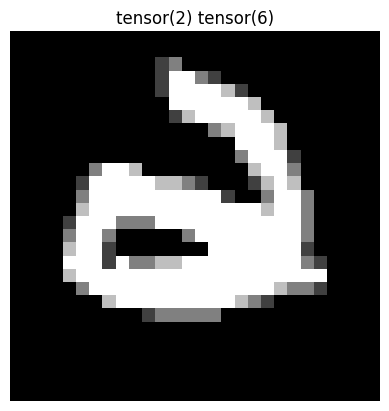

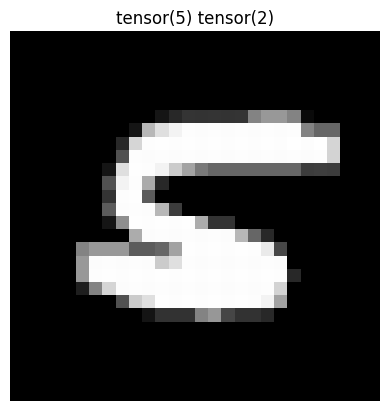

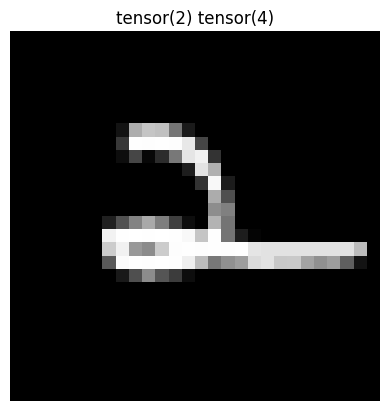

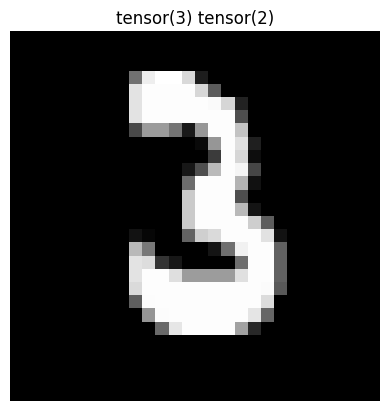

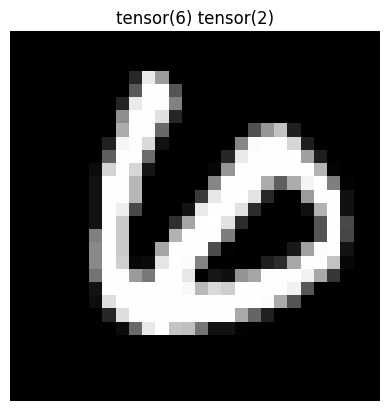

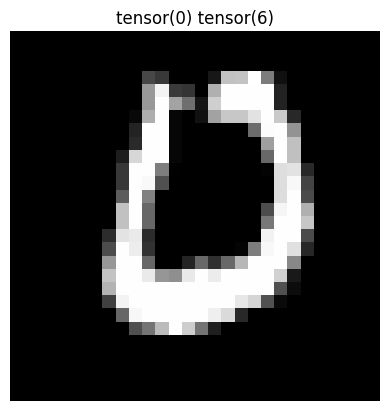

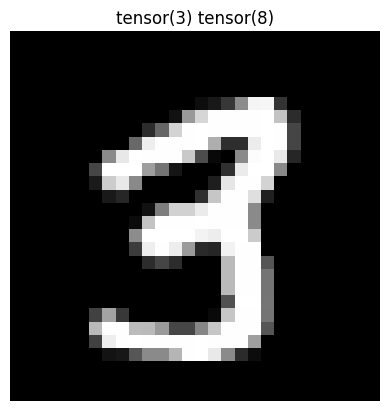

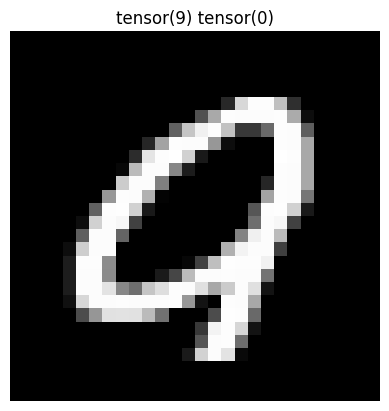

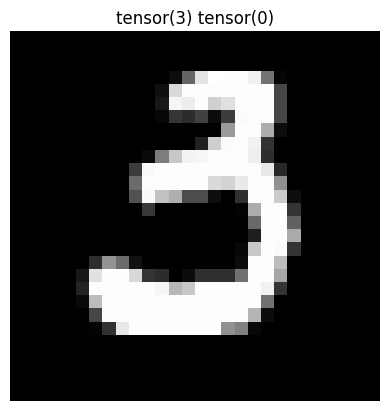

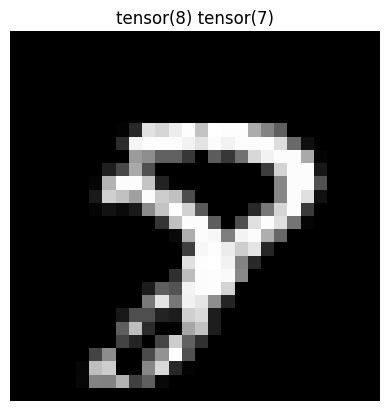

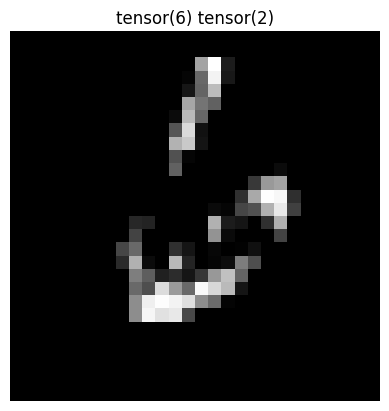

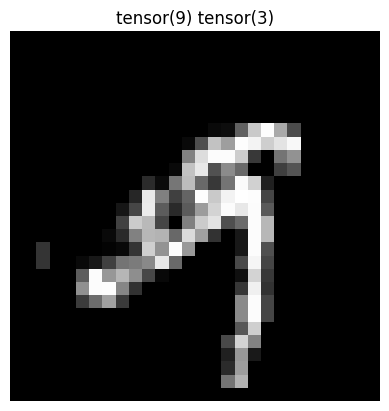

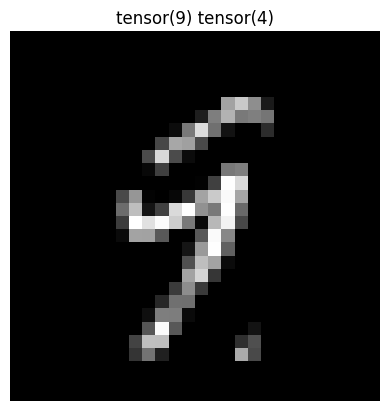

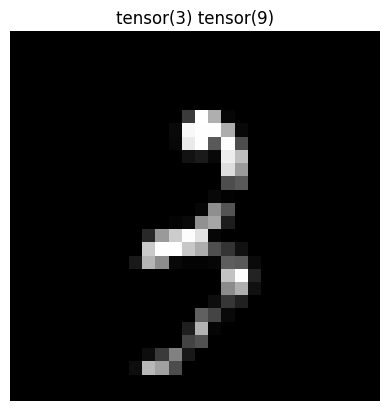

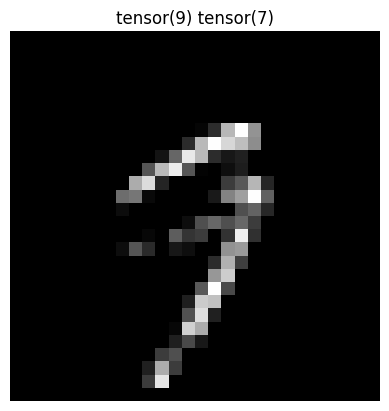

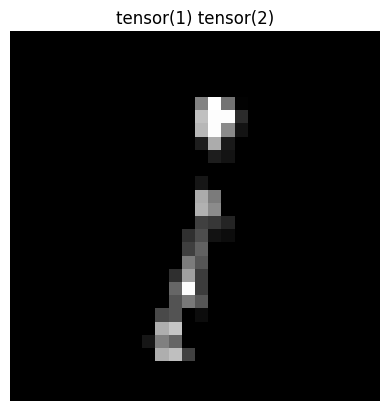

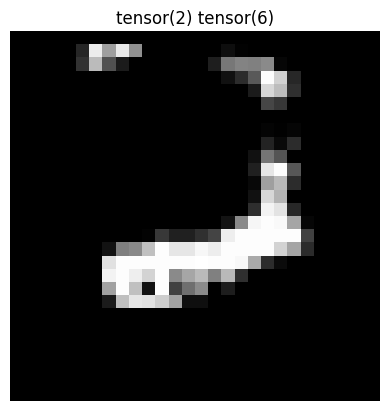

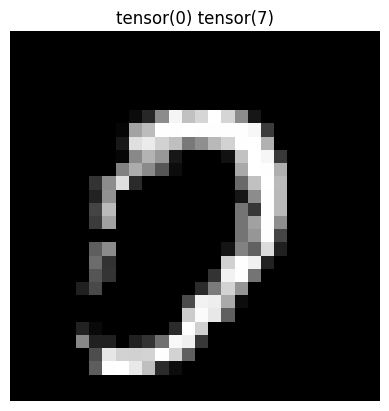

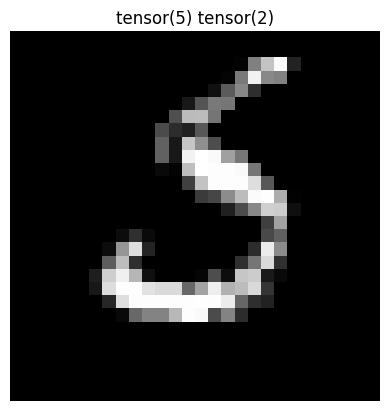

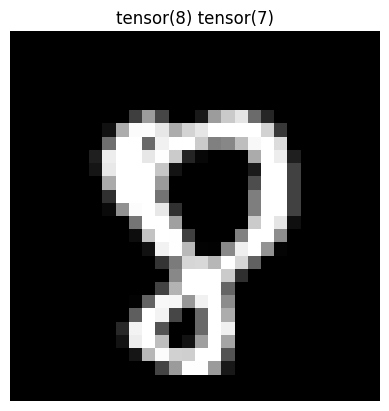

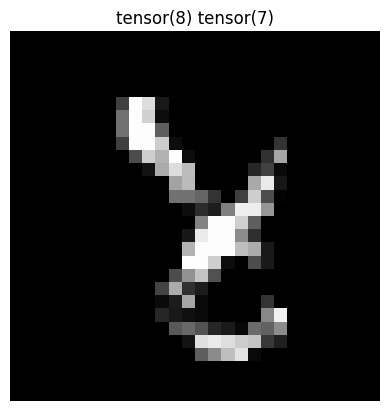

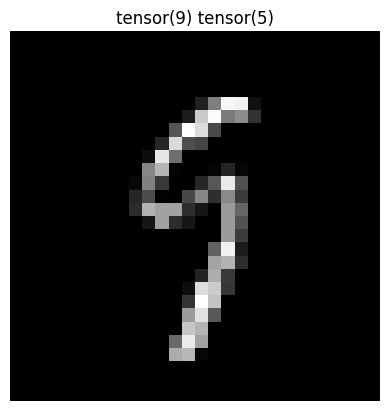

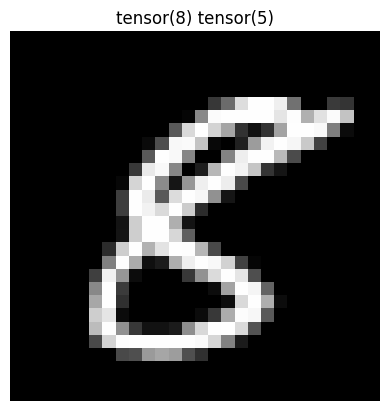

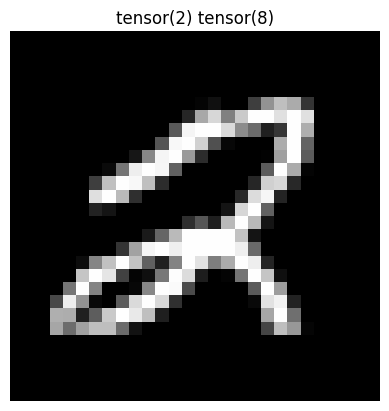

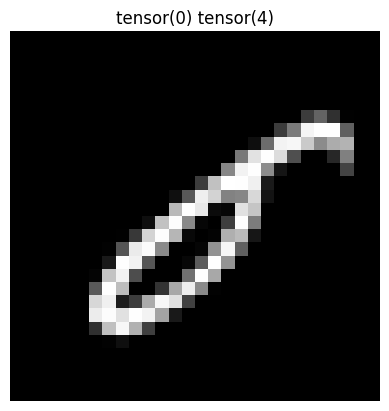

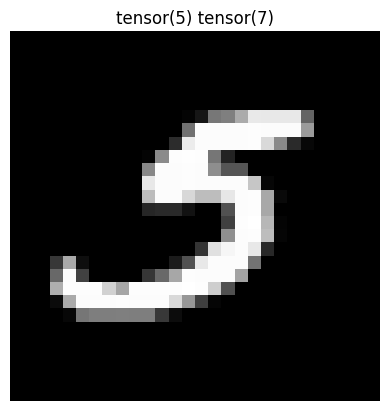

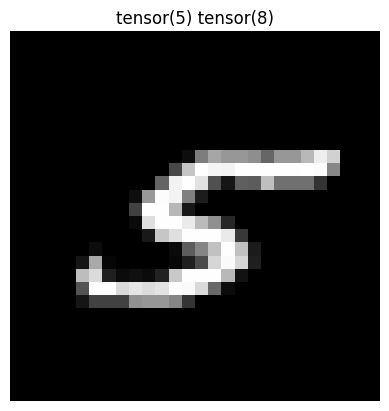

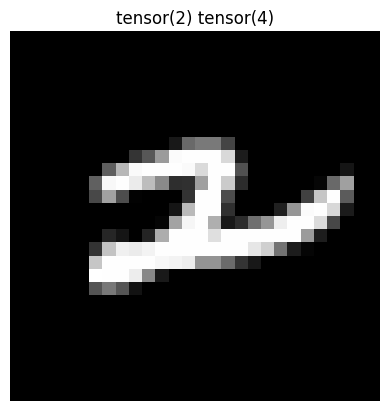

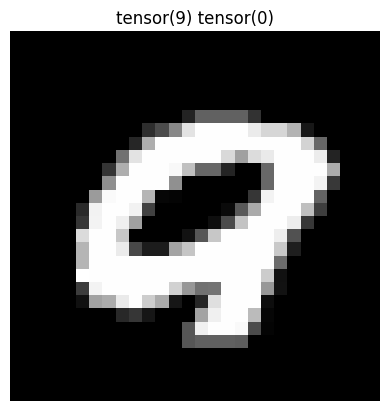

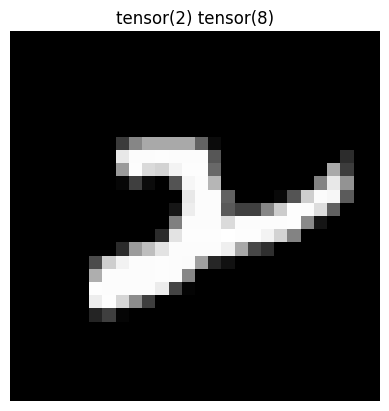

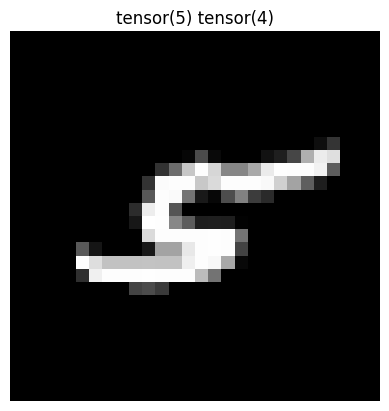

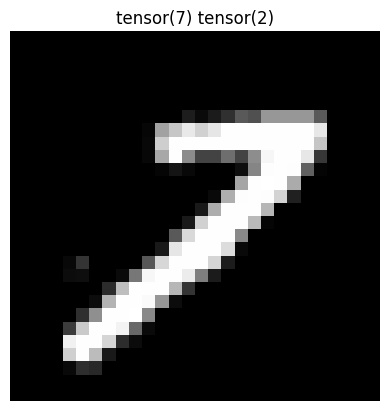

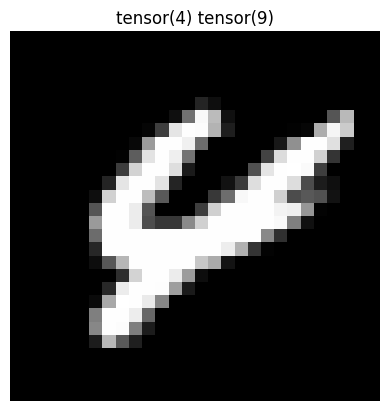

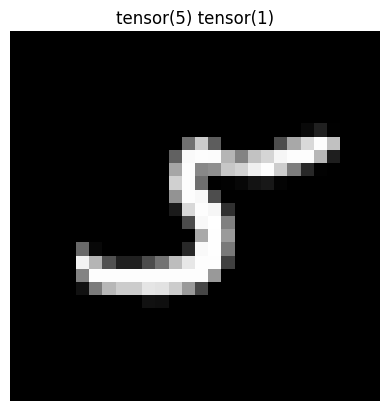

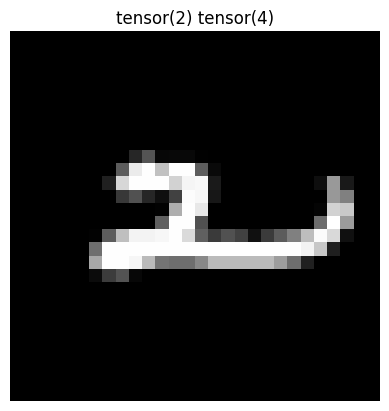

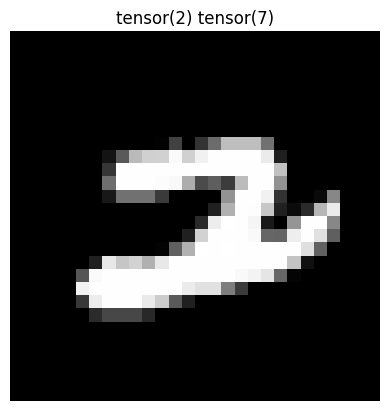

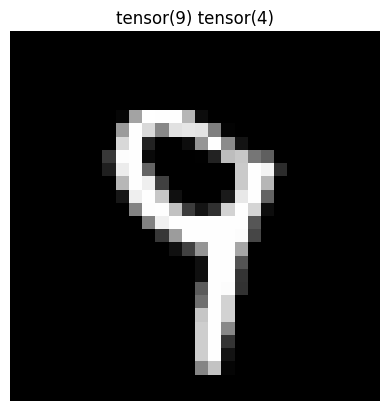

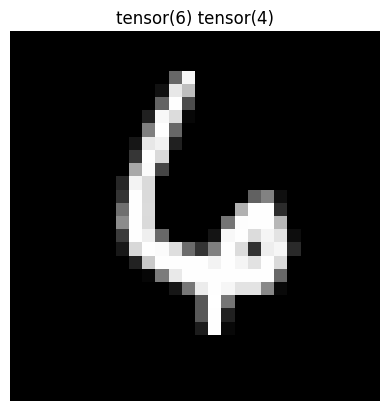

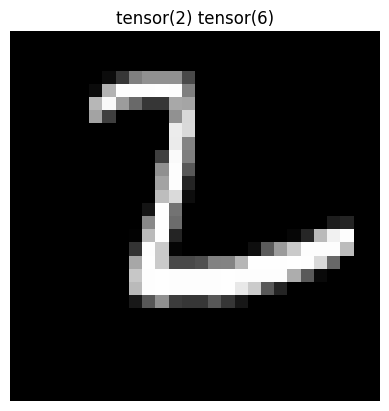

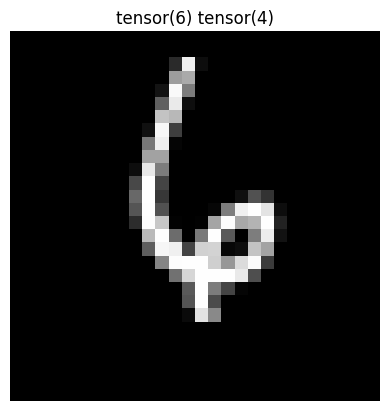

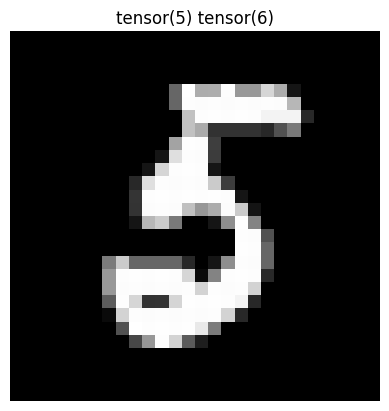

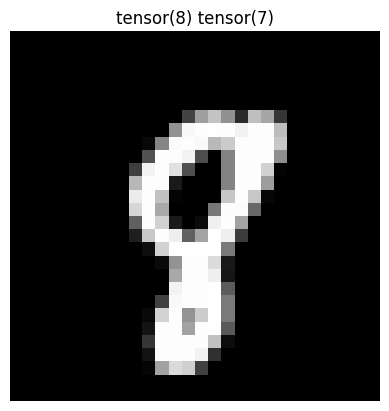

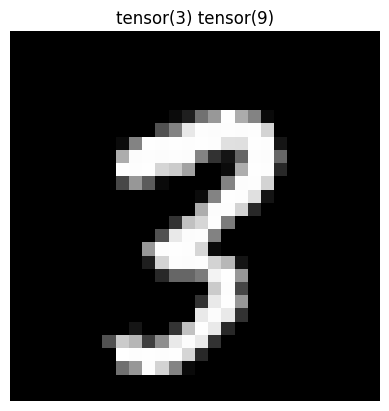

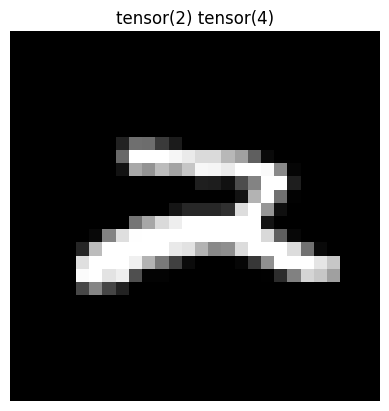

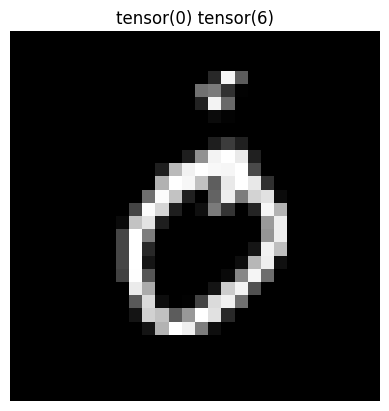

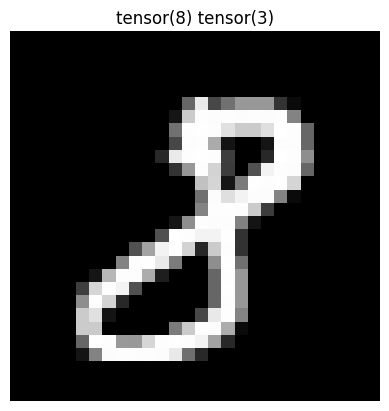

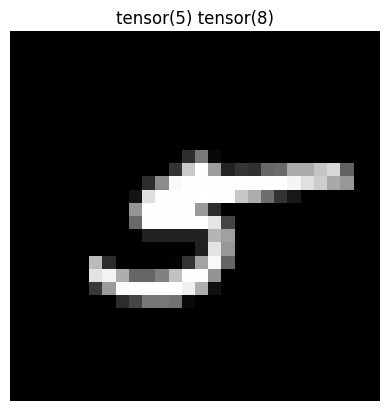

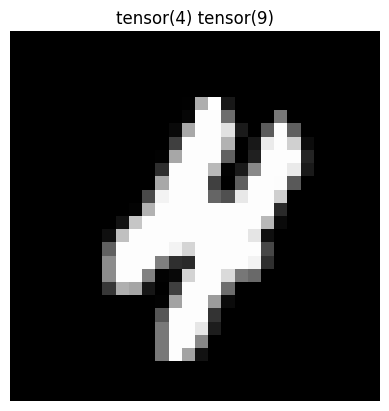

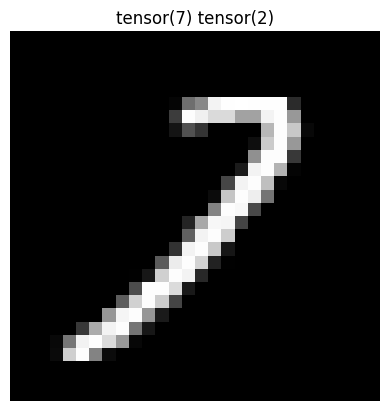

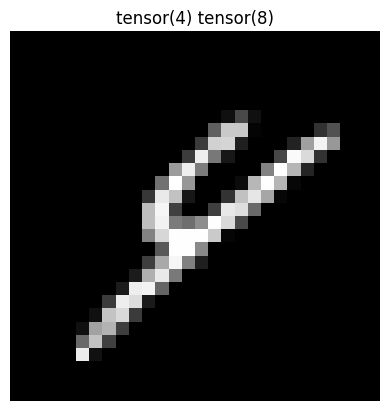

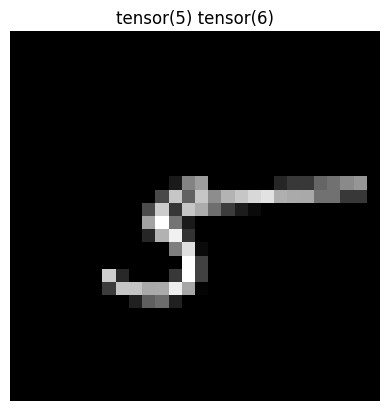

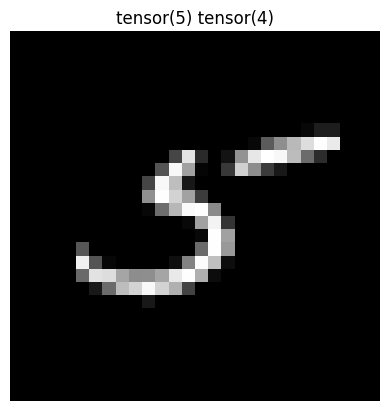

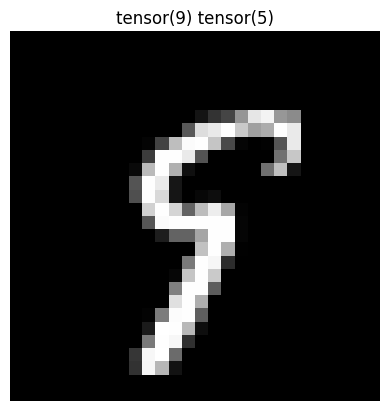

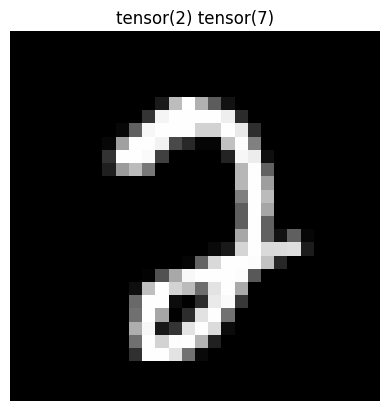

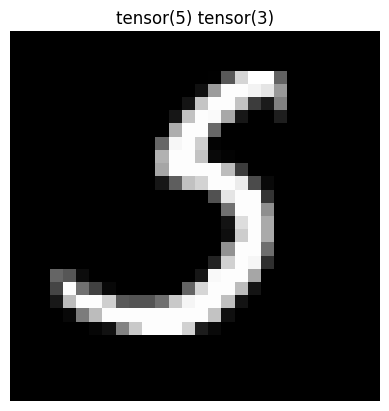

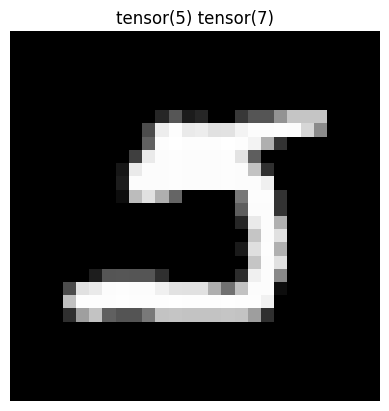

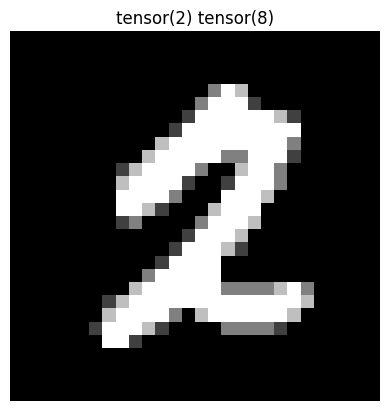

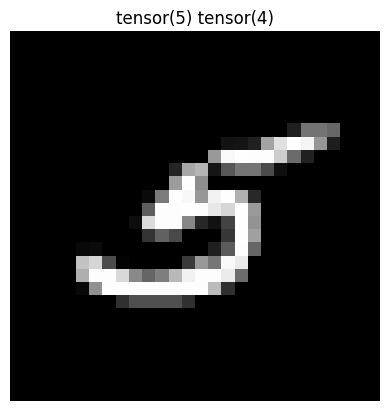

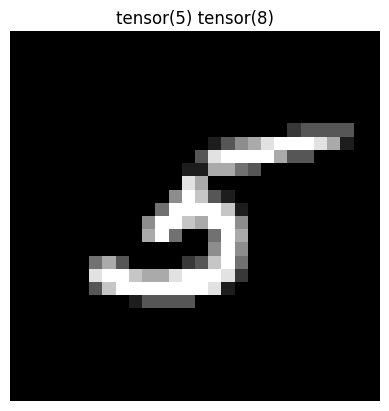

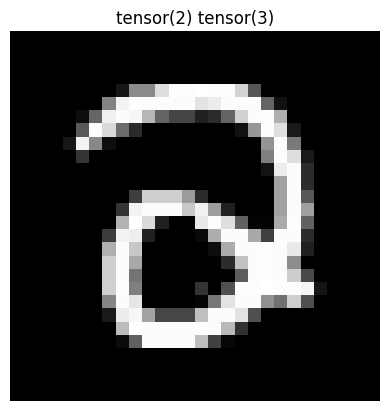

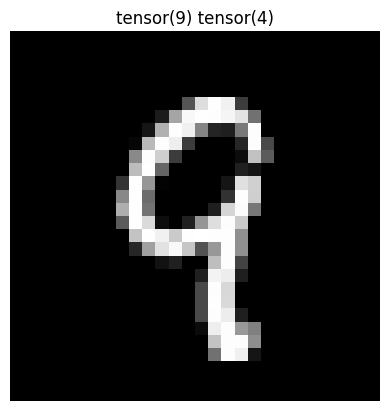

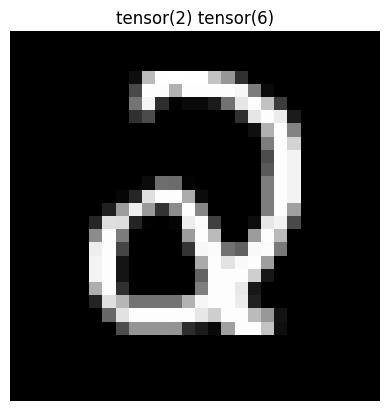

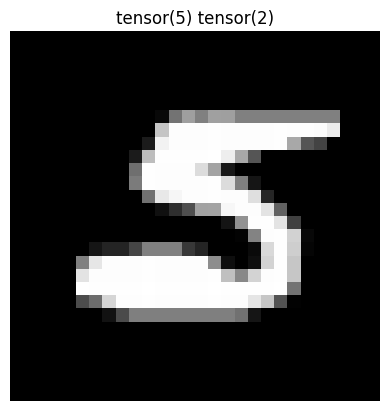

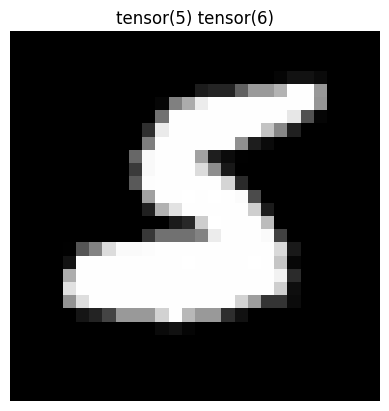

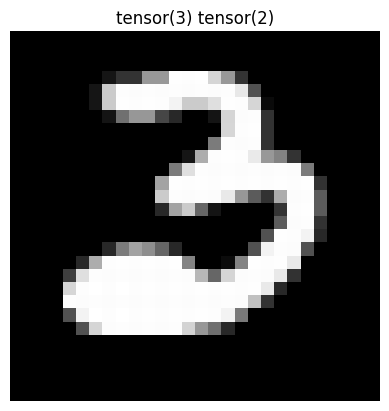

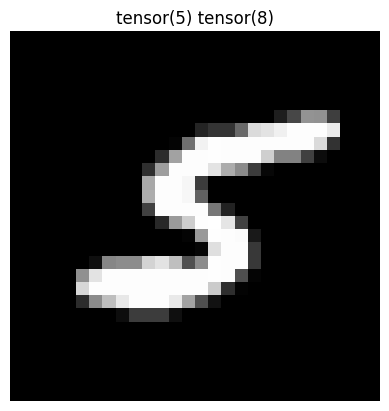

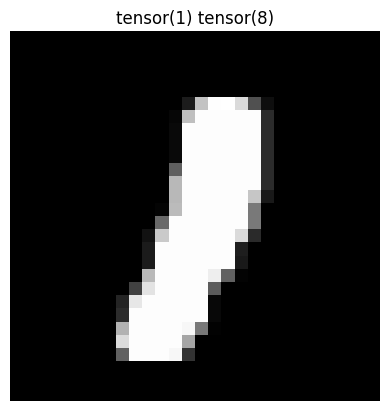

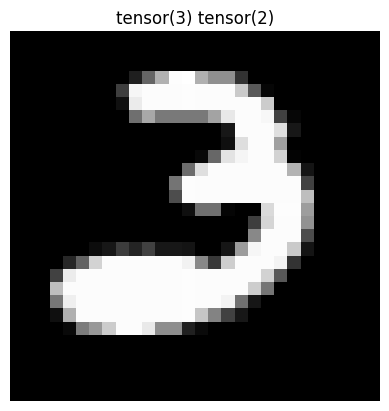

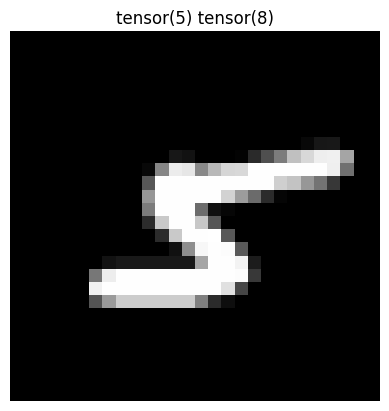

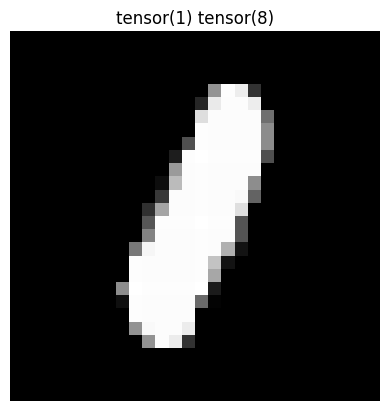

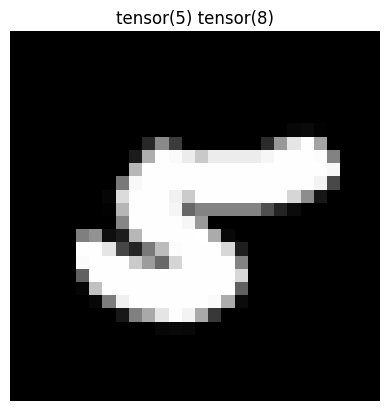

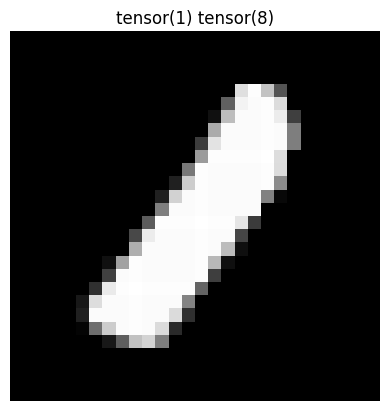

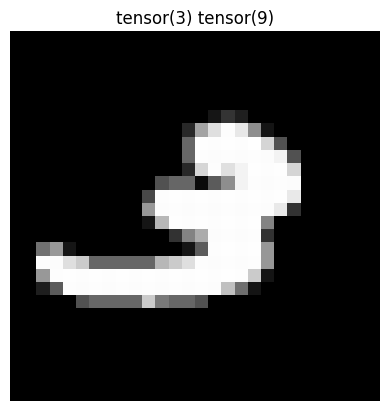

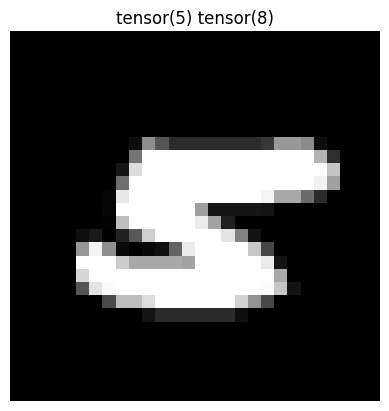

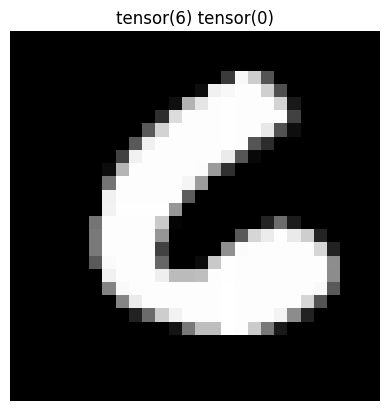

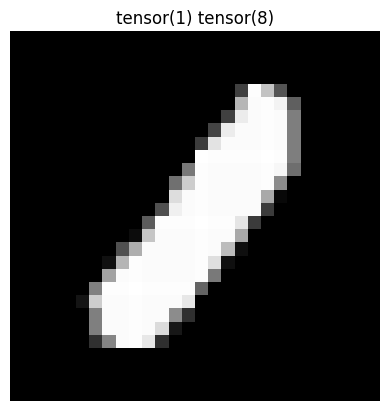

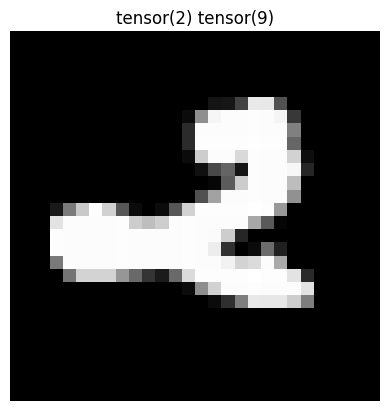

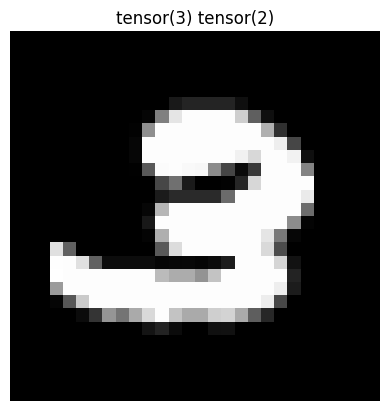

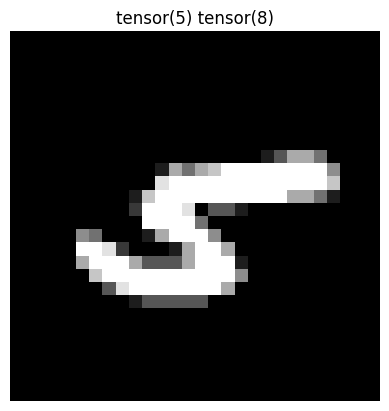

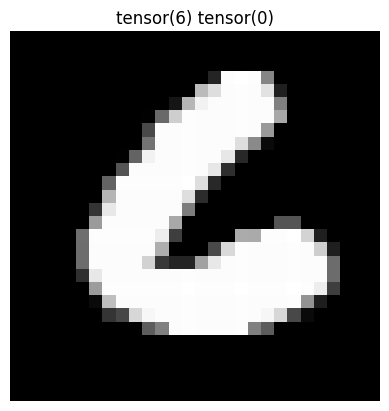

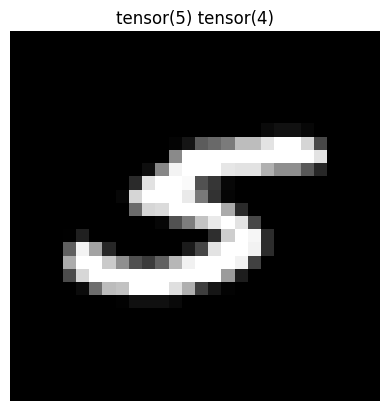

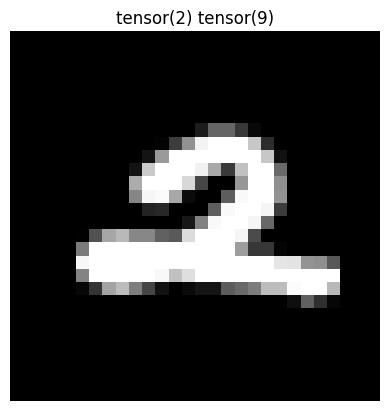

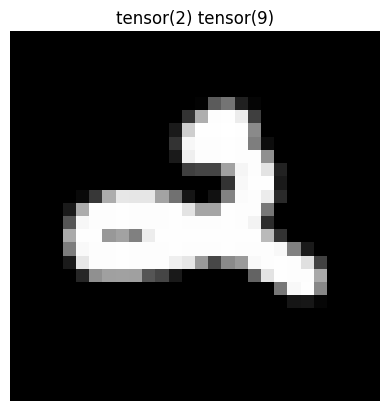

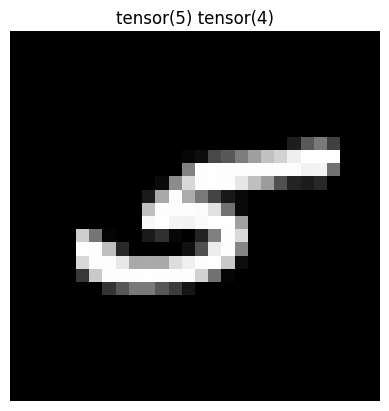

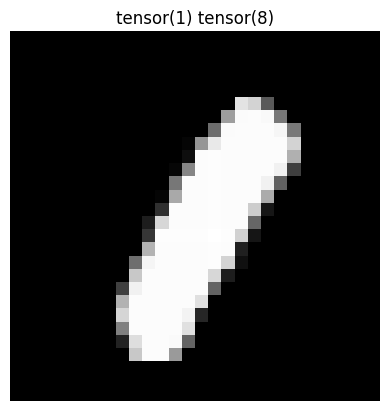

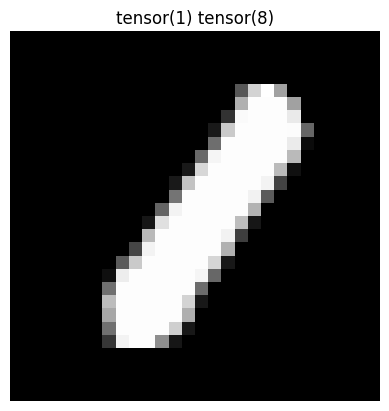

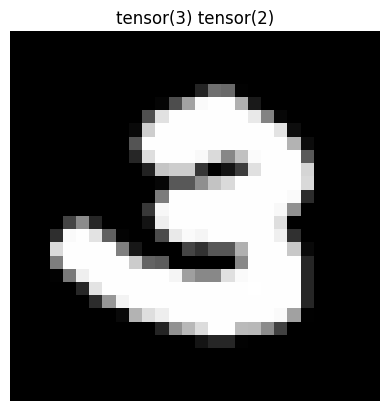

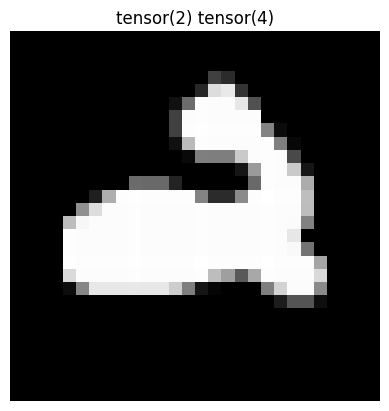

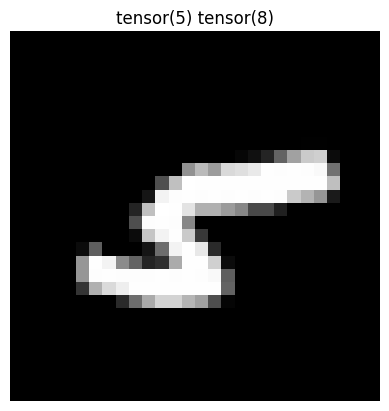

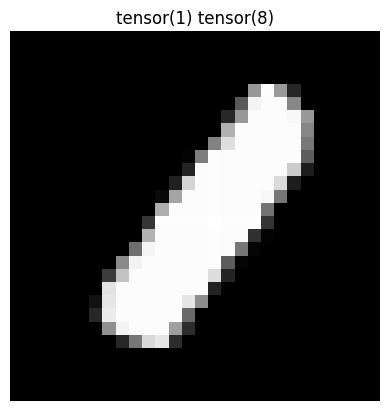

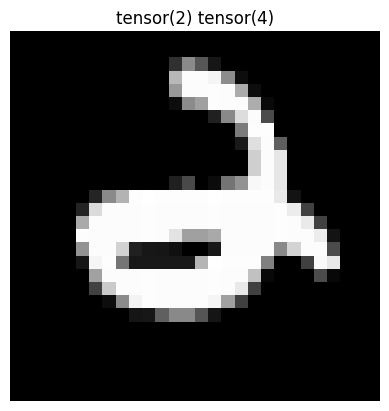

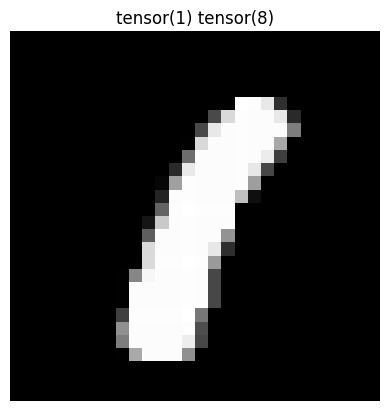

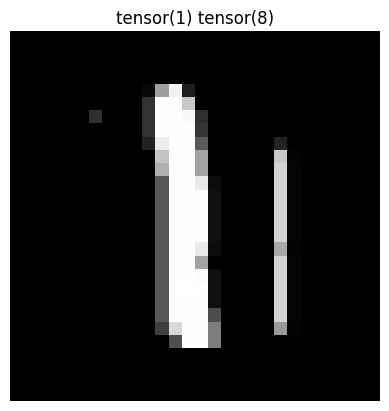

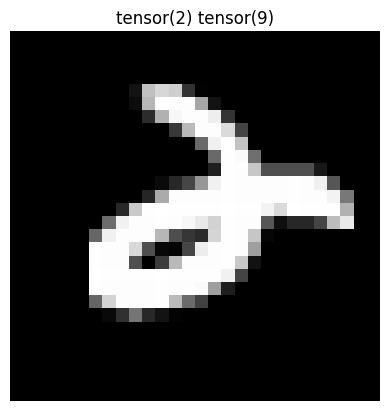

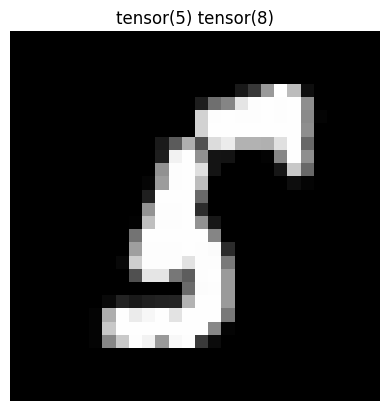

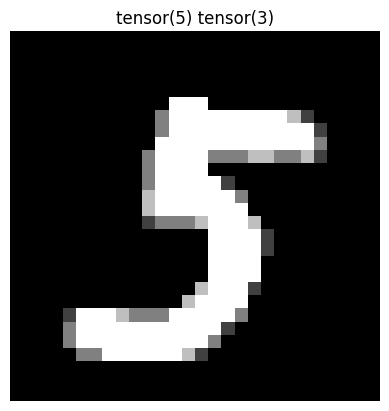

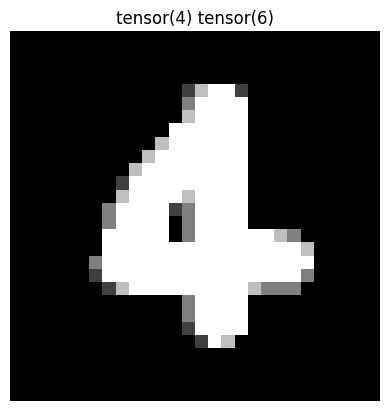

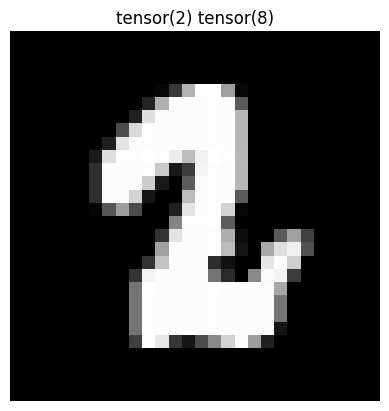

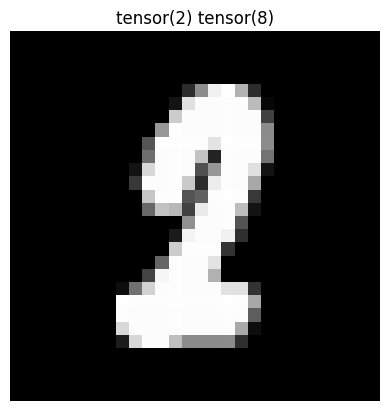

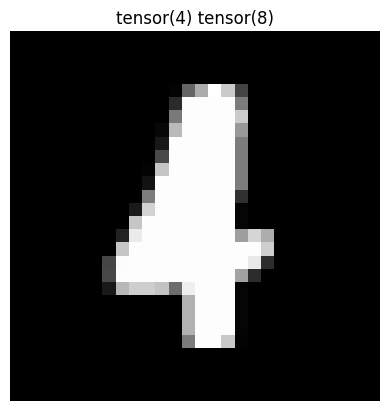

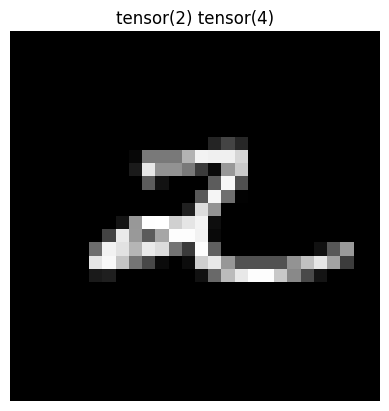

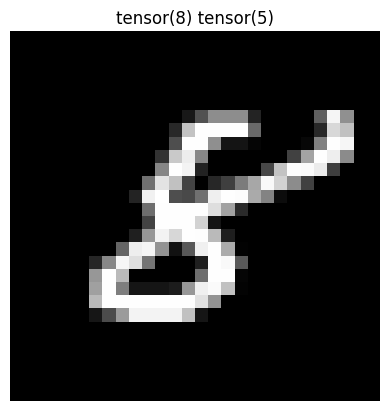

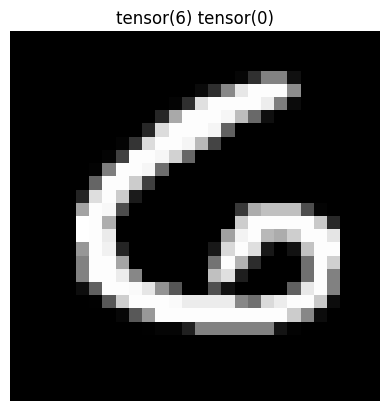

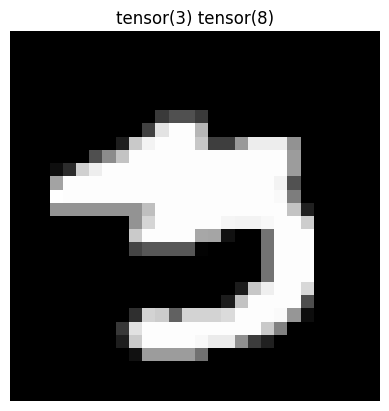

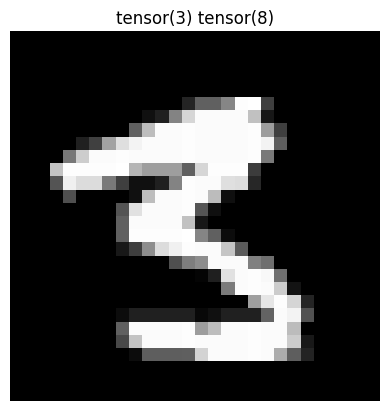

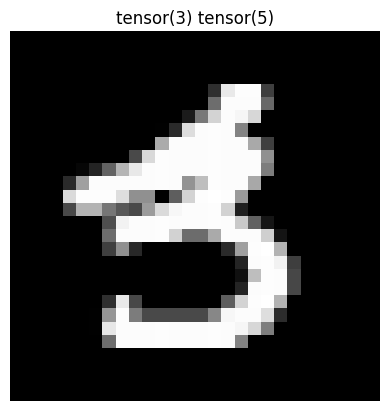

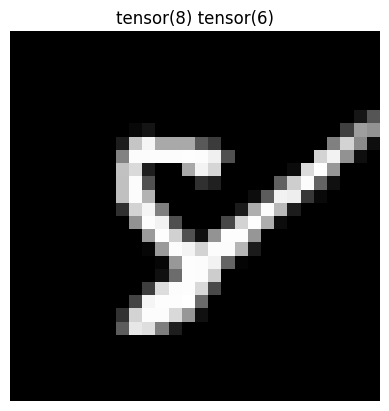

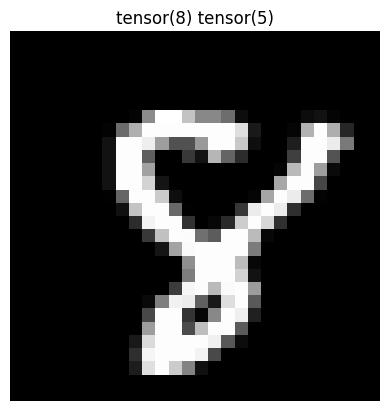

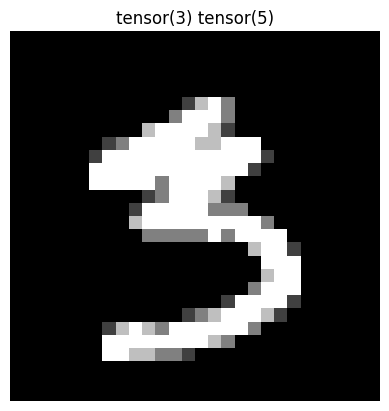

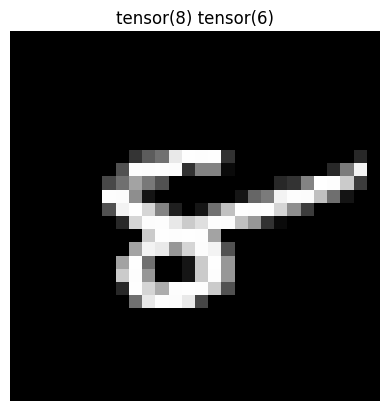

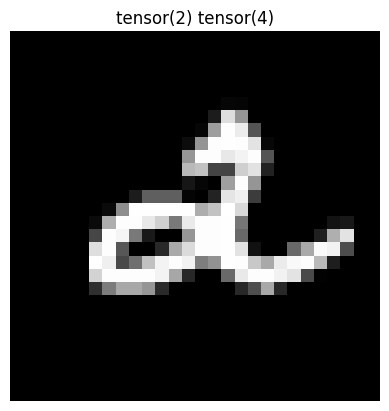

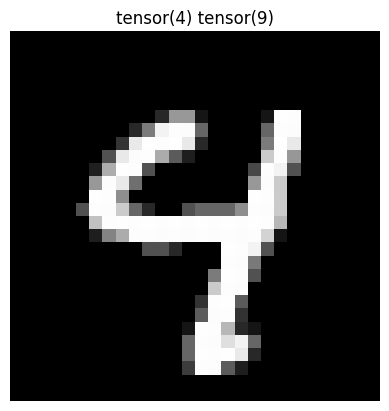

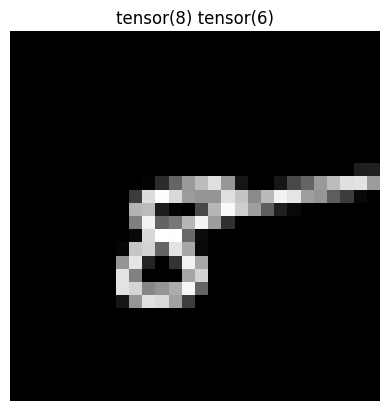

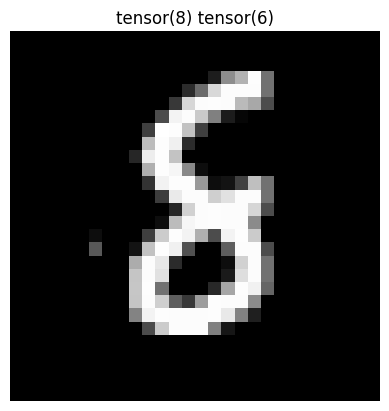

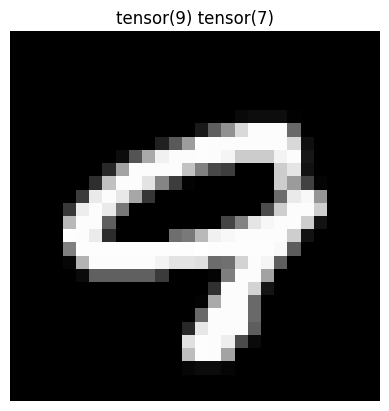

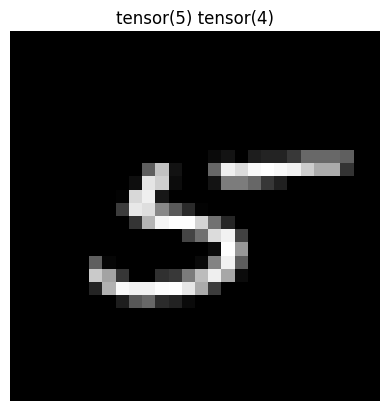

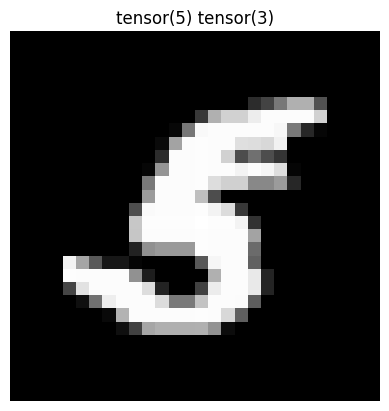

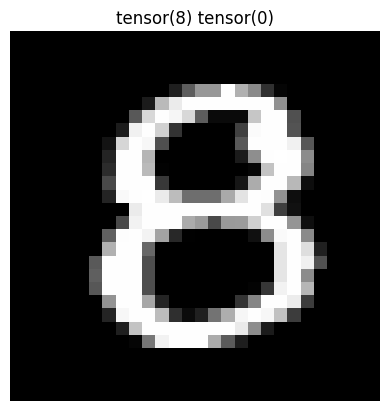

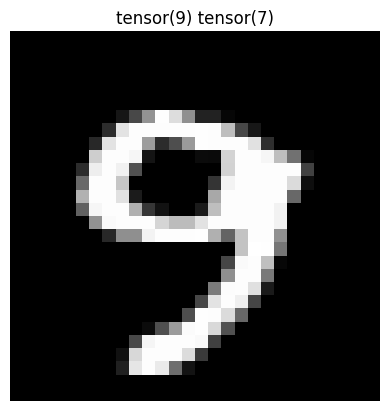

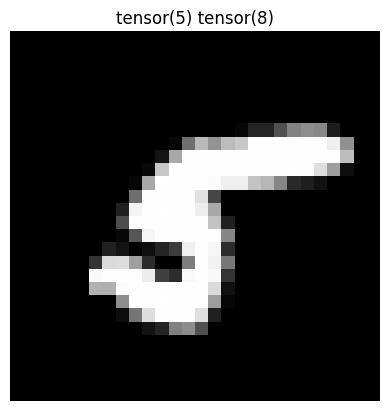

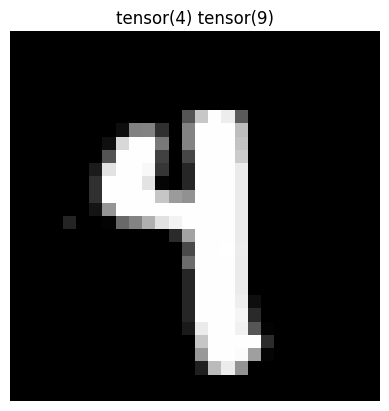

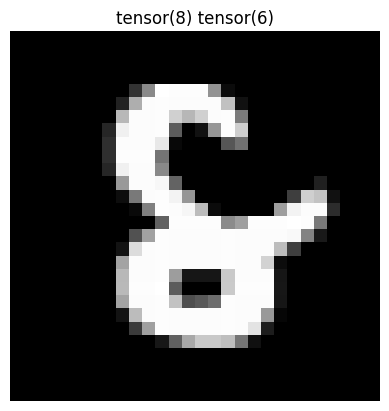

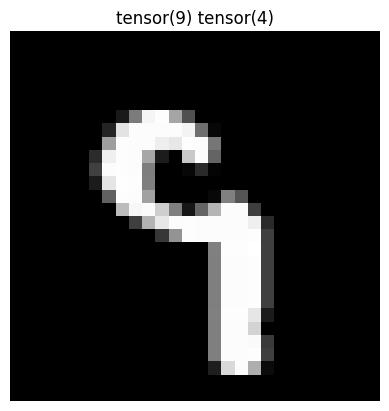

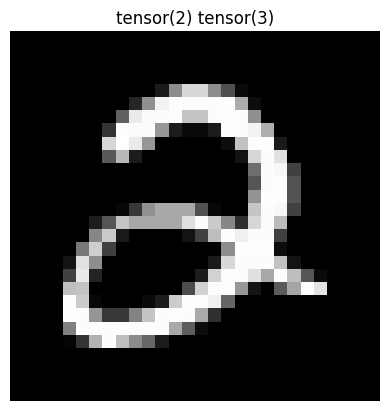

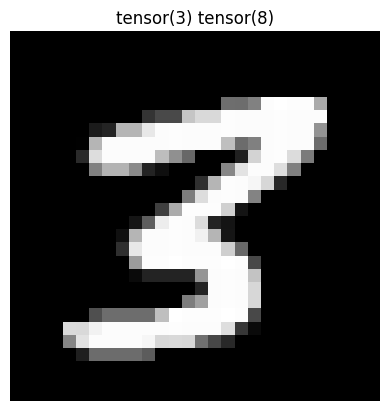

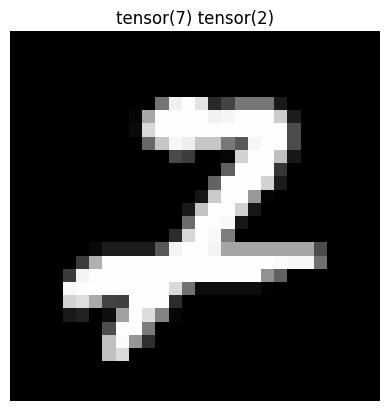

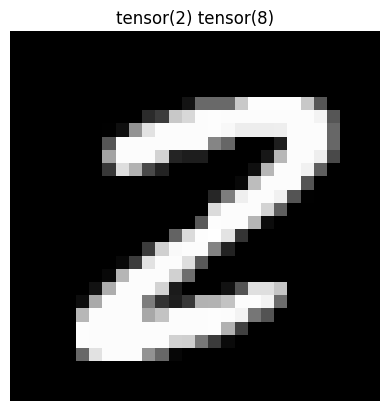

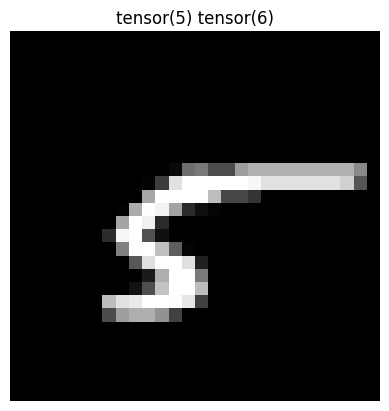

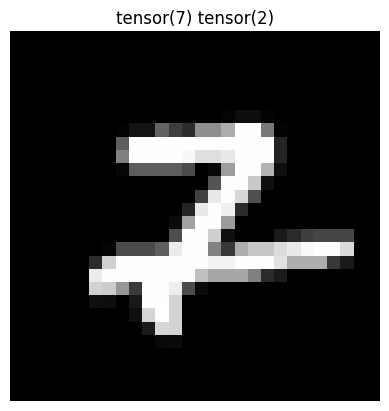

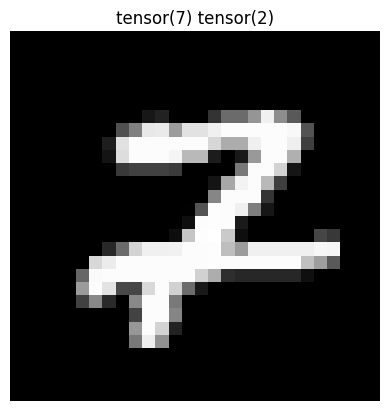

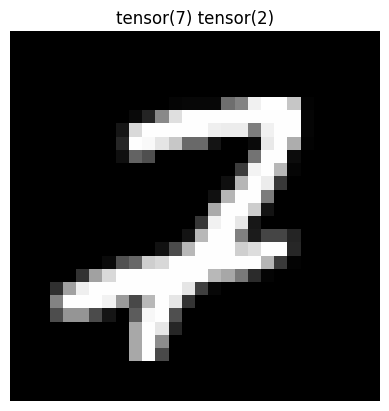

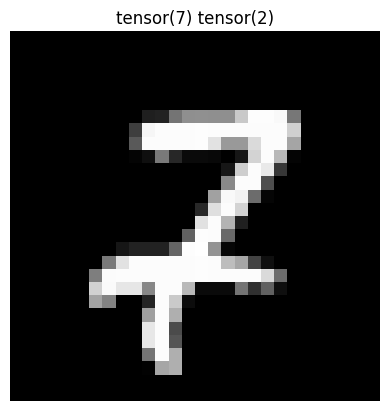

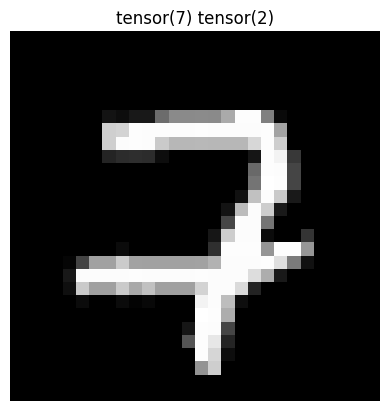

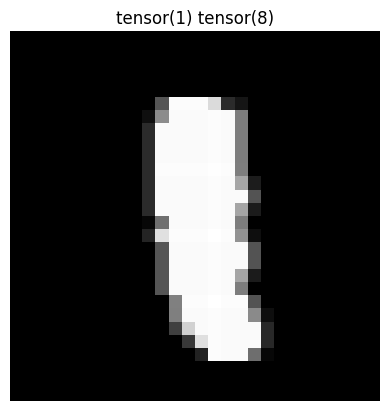

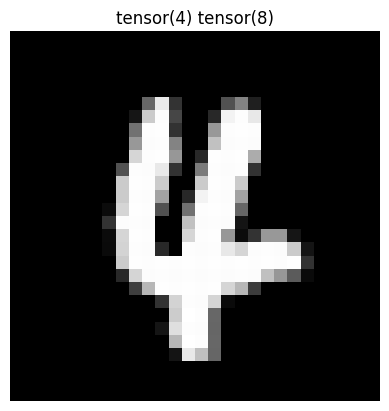

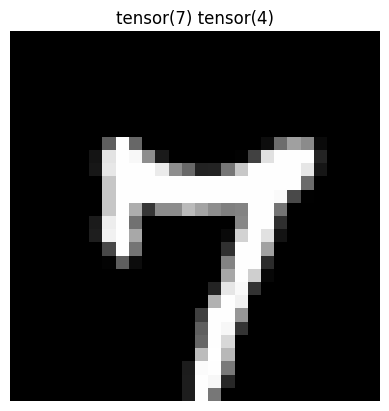

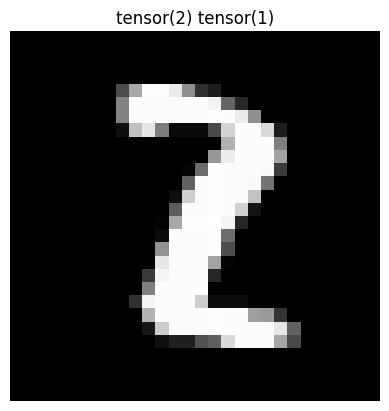

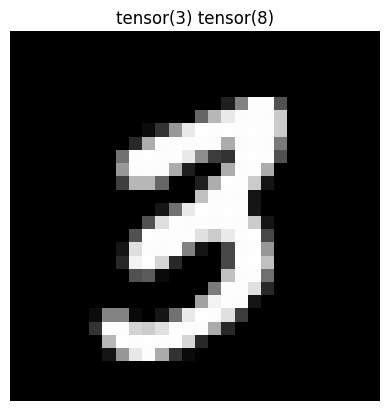

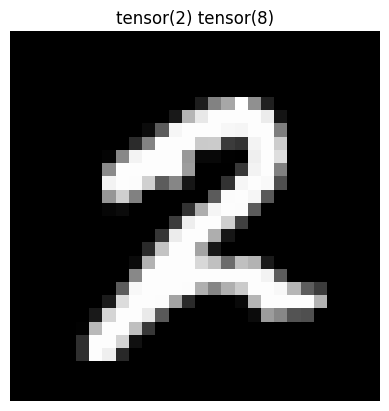

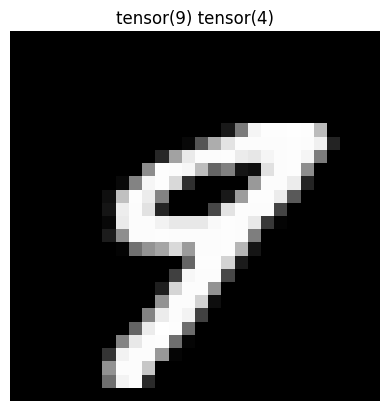

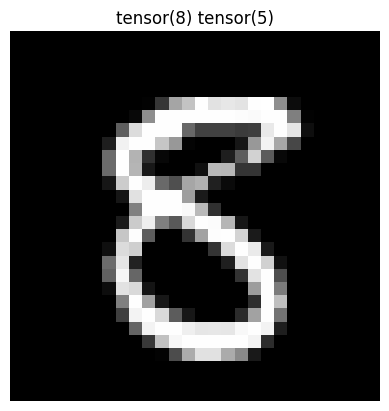

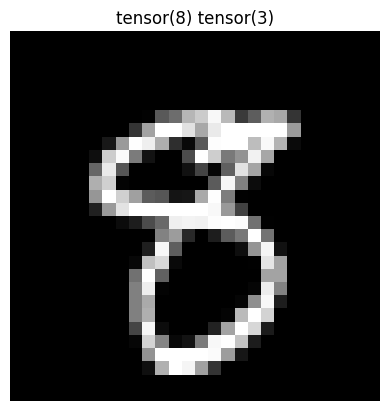

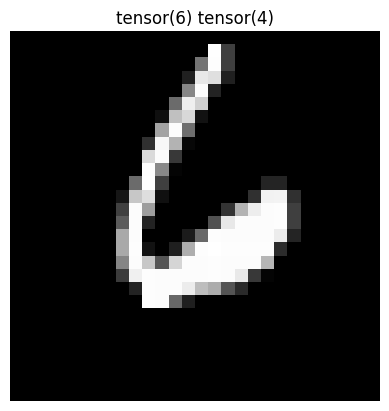

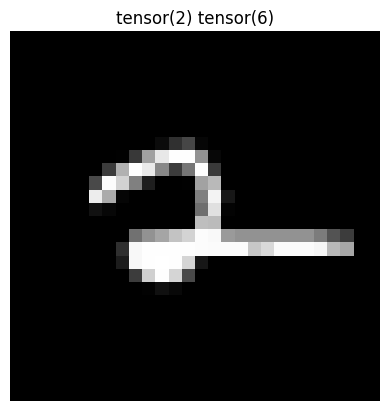

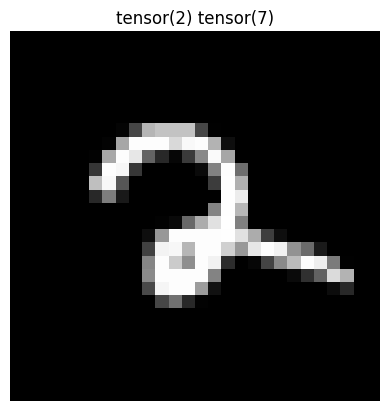

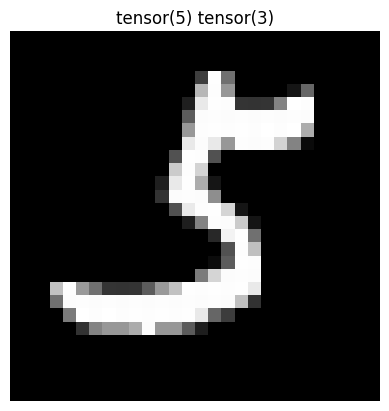

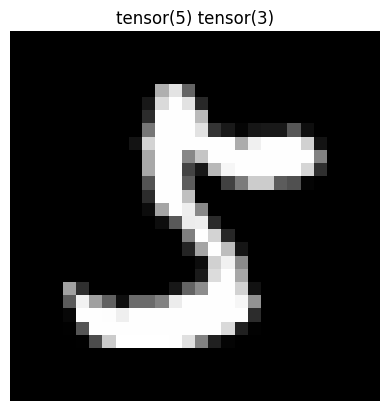

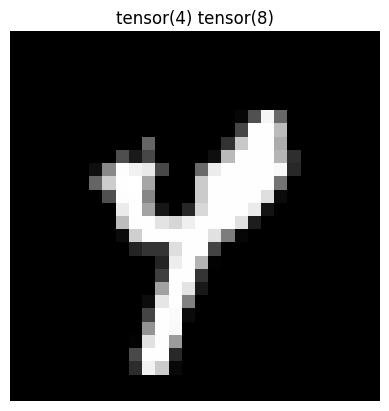

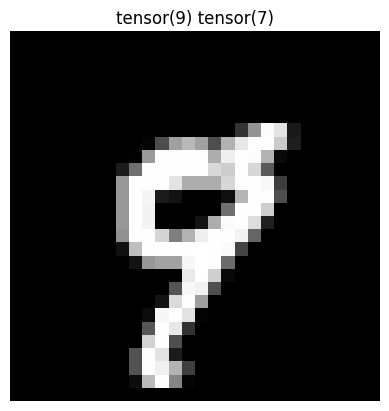

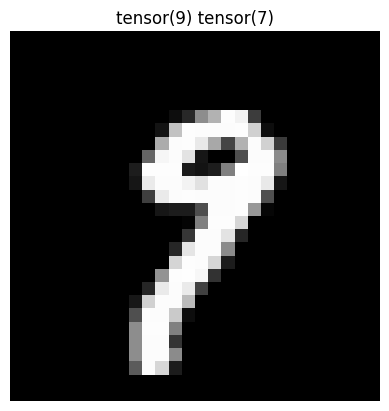

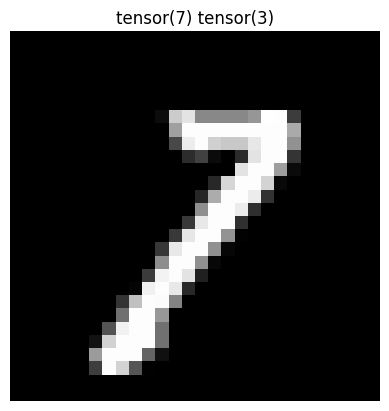

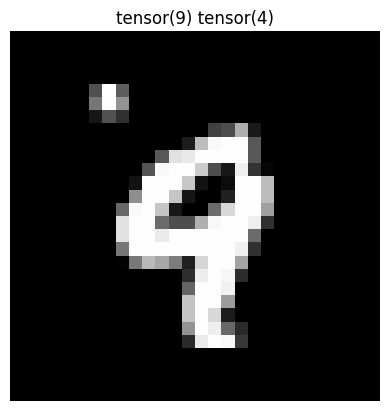

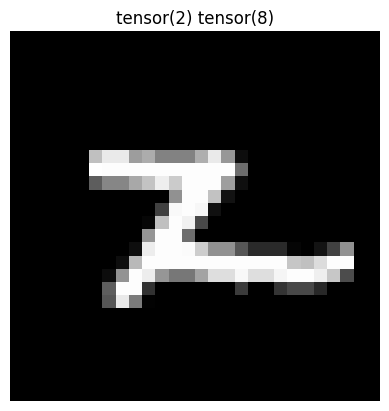

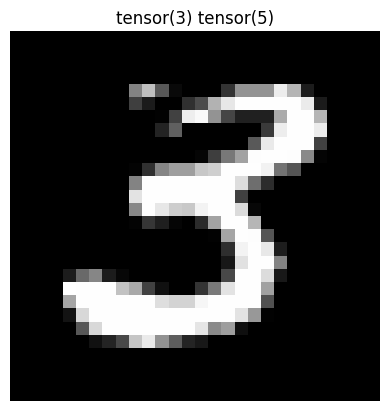

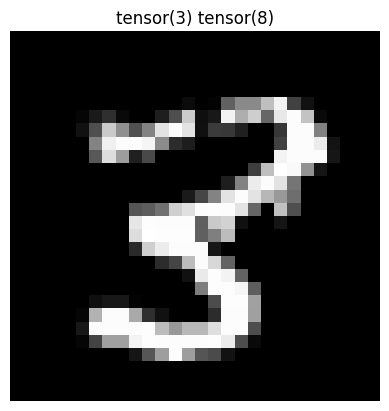

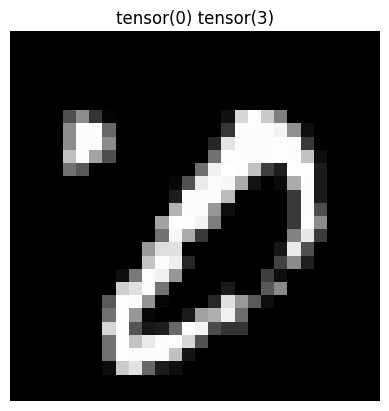

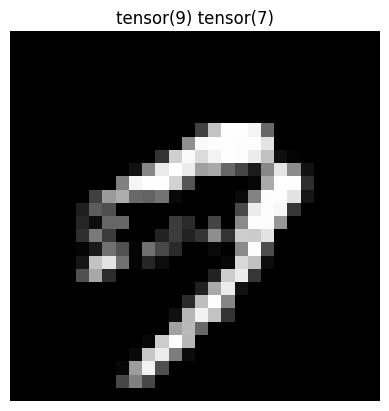

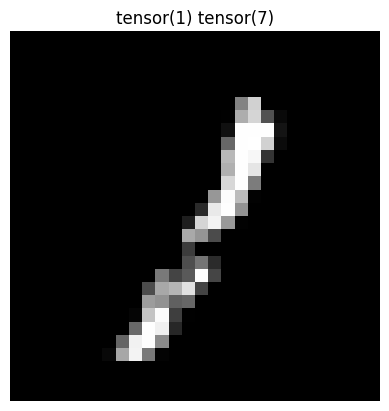

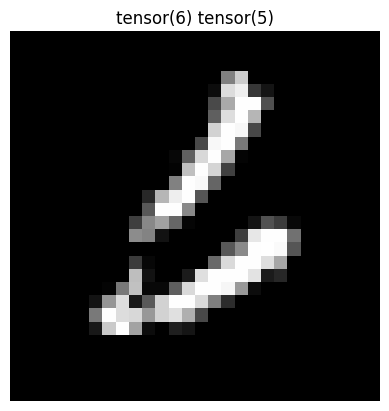

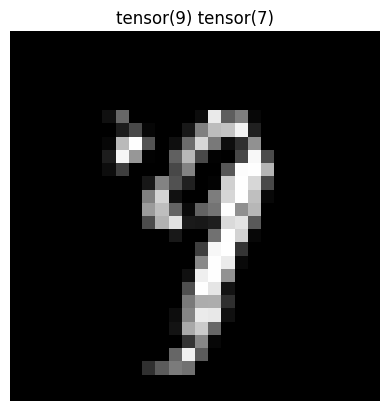

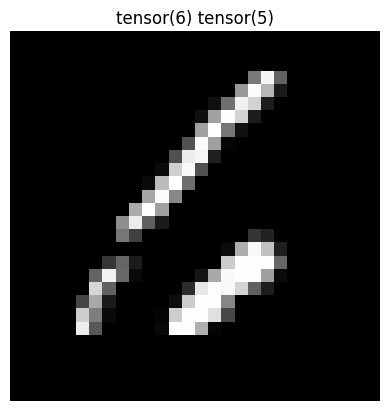

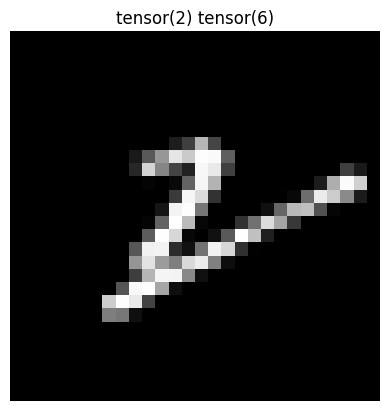

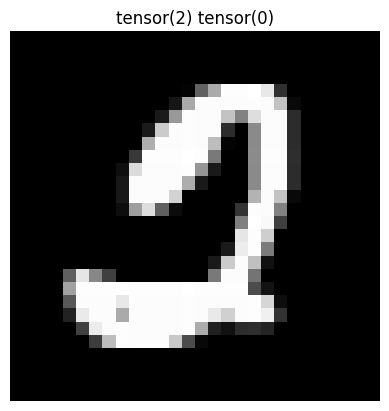

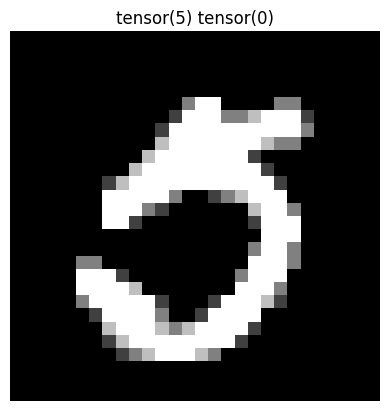

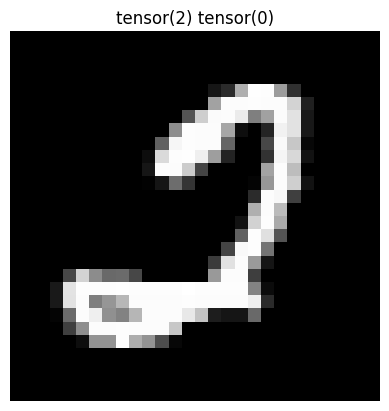

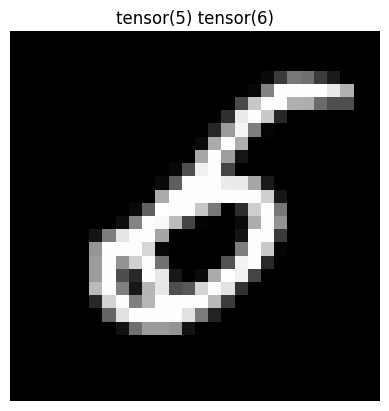

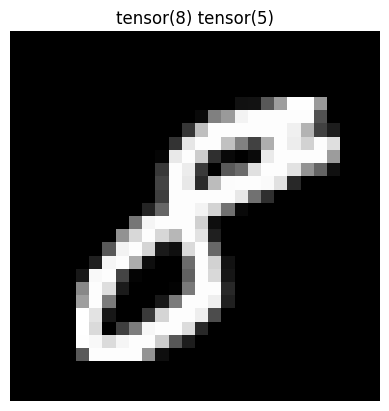

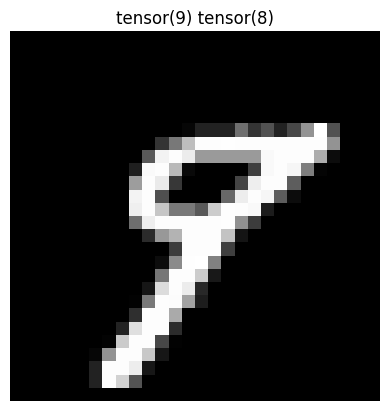

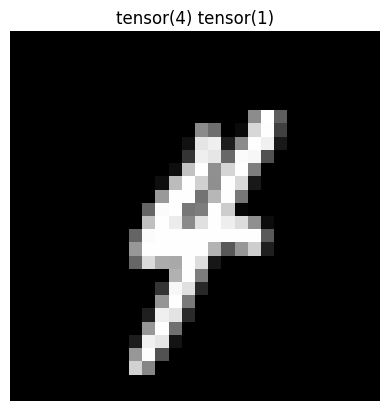

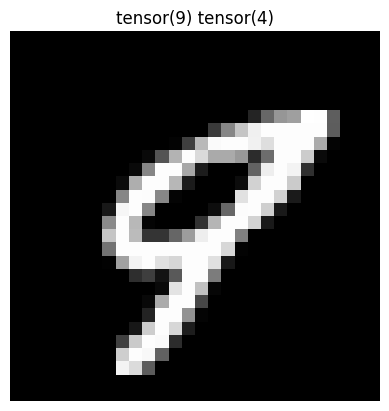

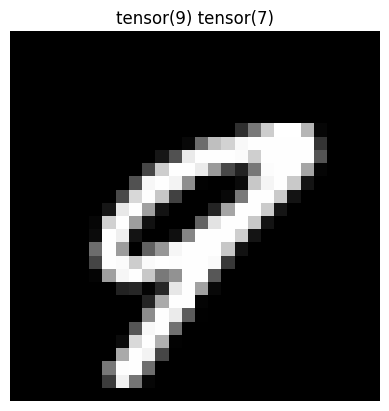

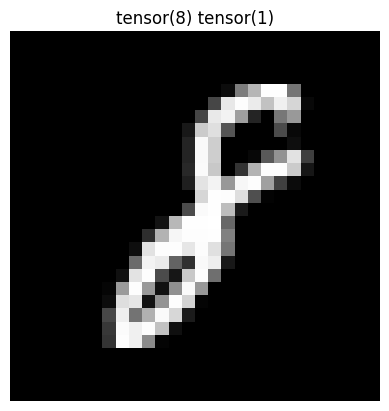

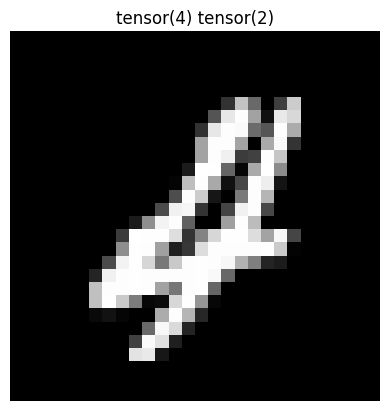

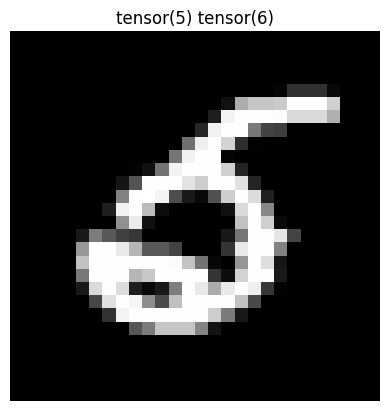

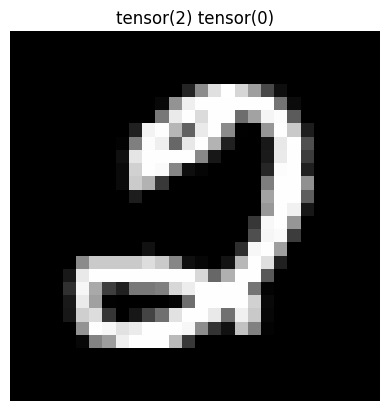

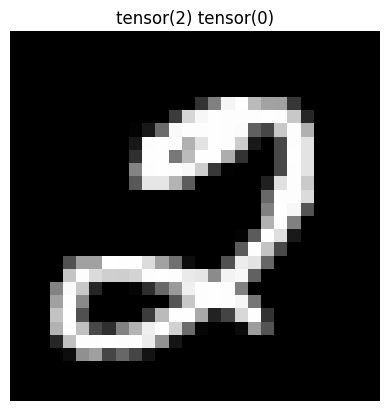

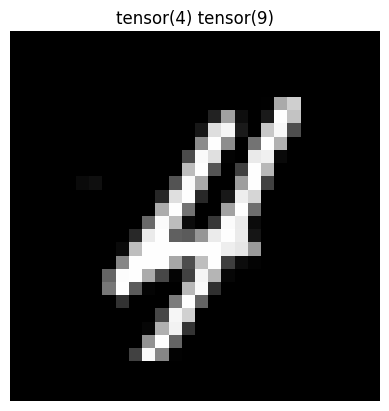

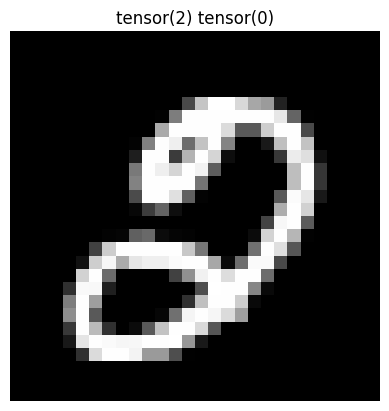

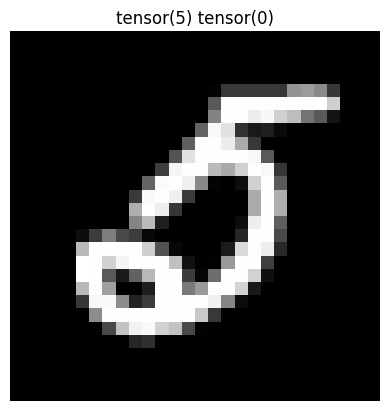

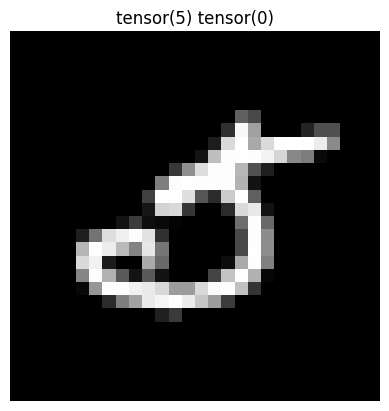

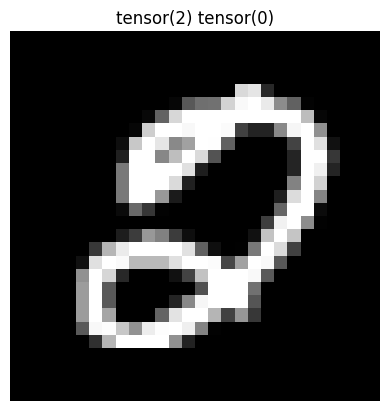

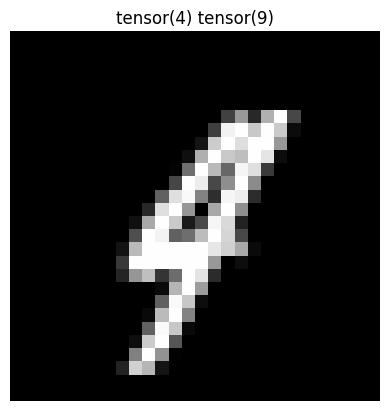

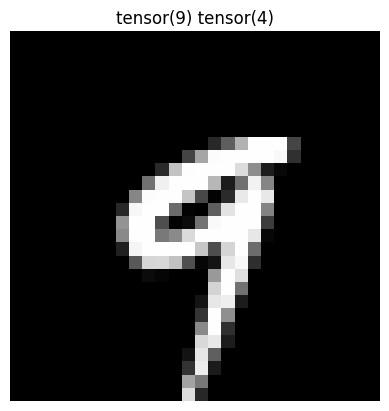

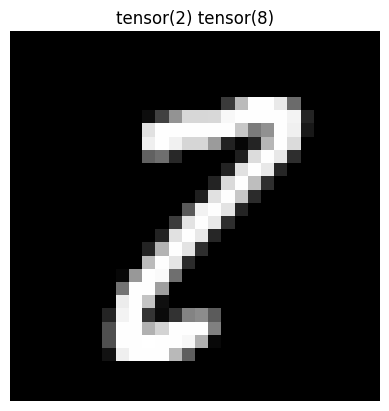

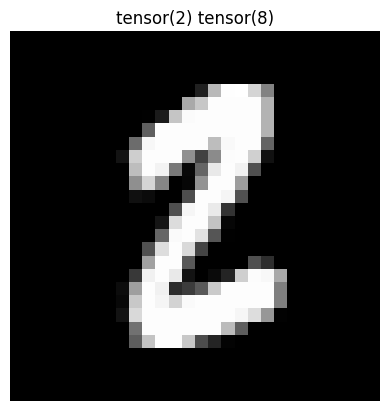

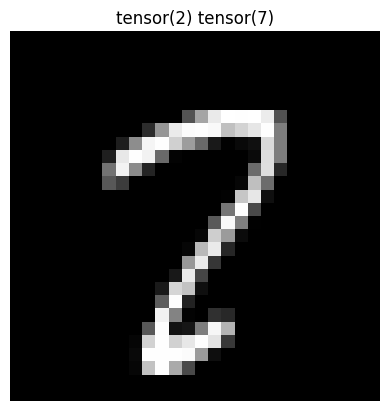

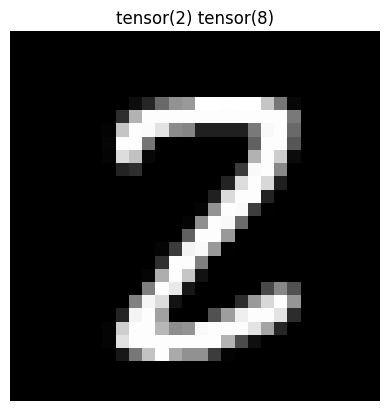

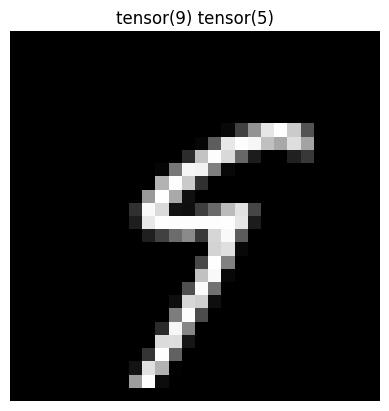

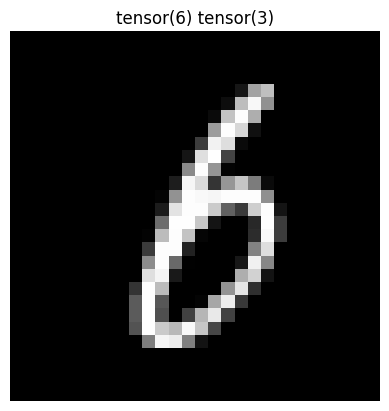

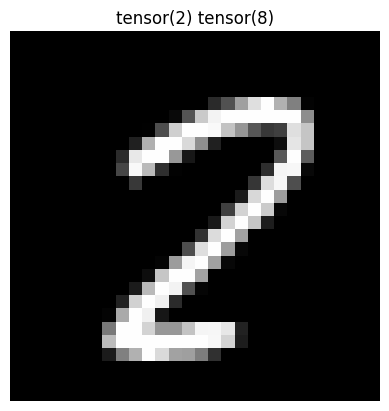

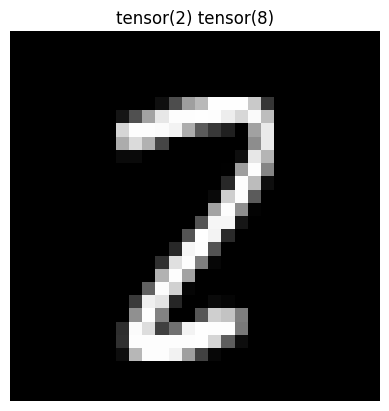

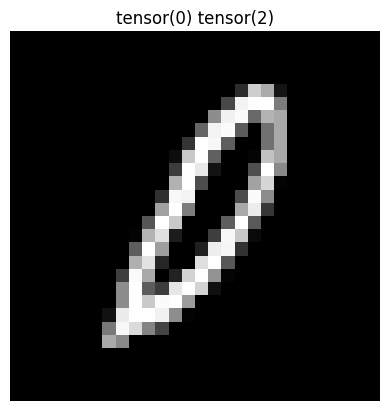

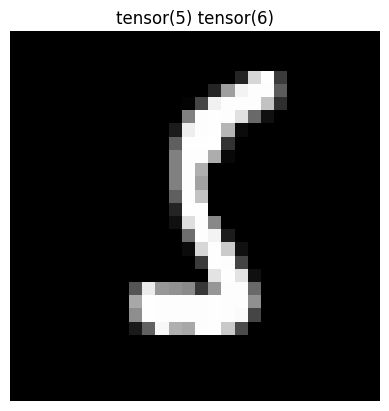

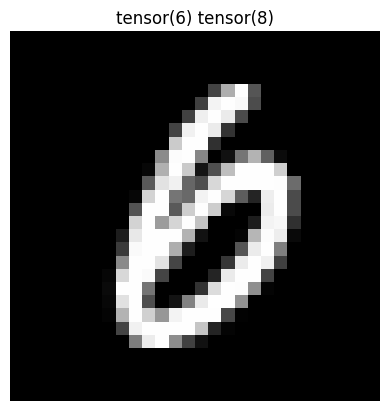

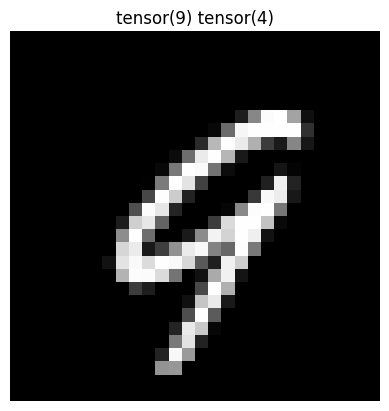

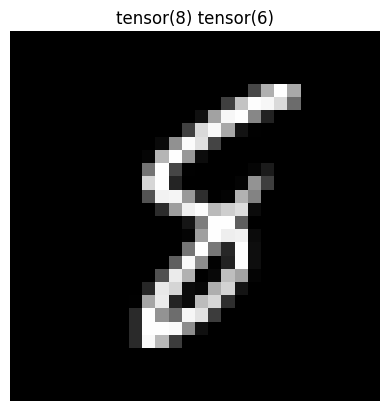

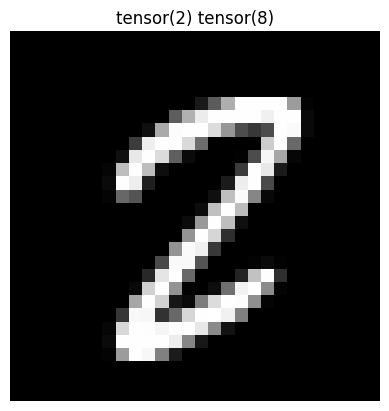

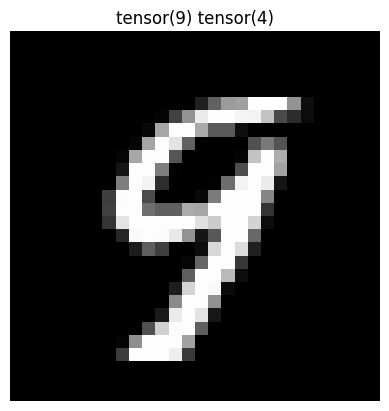

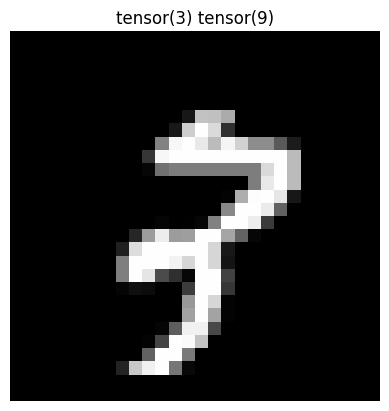

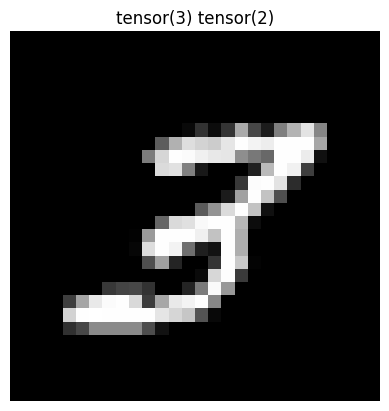

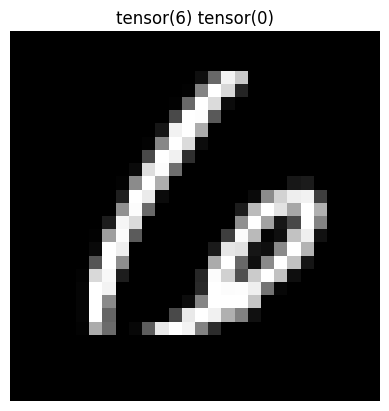

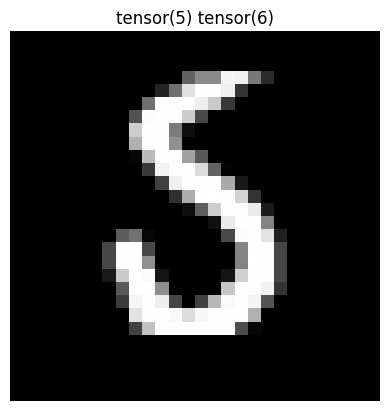

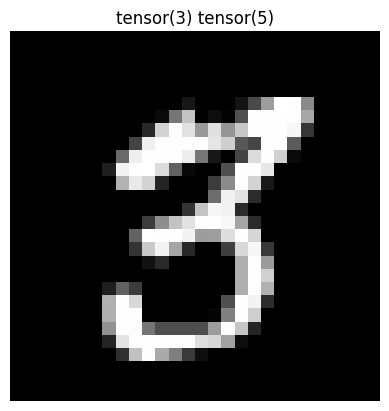

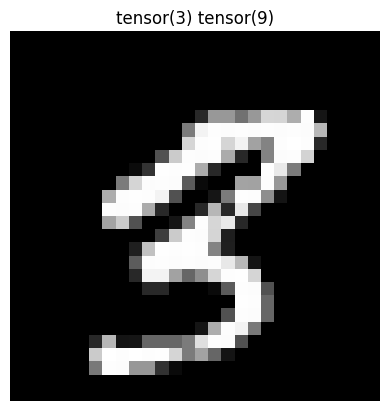

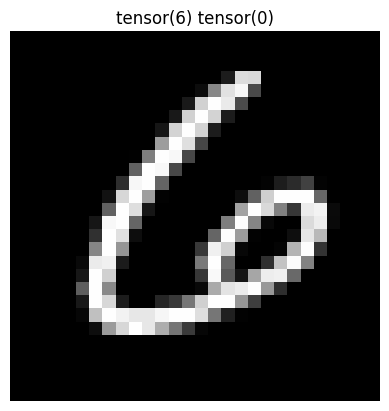

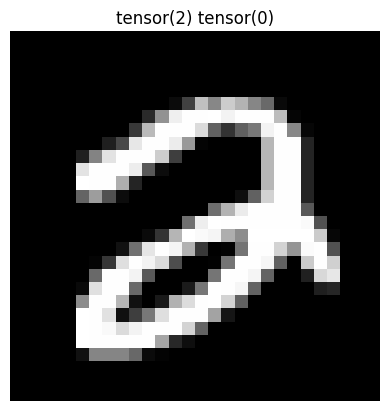

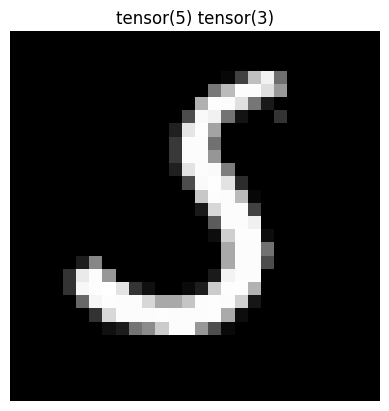

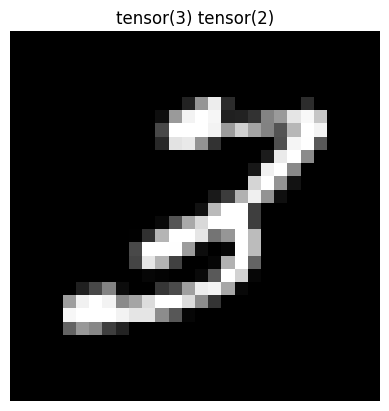

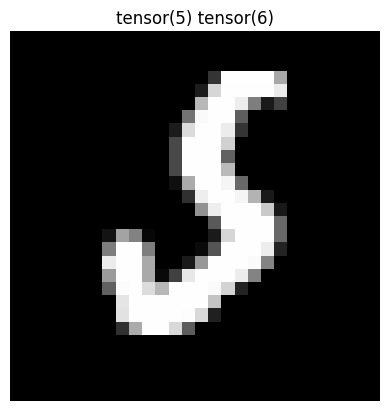

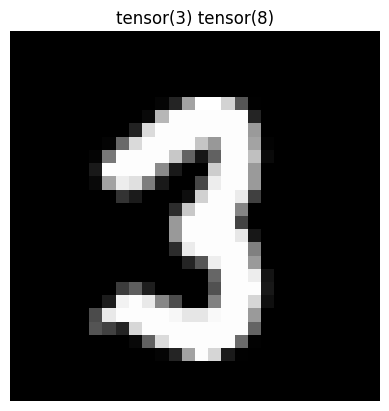

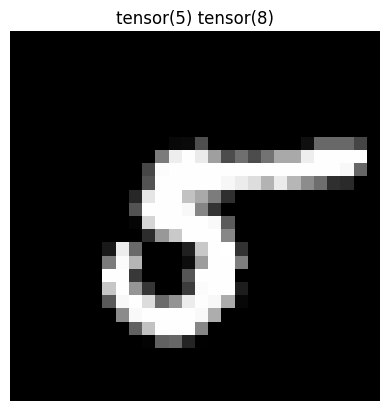

781


In [75]:
with torch.no_grad():
    model.eval()
    
    outputs_test = model(all_test_inputs)

count = 0

for k in range(outputs_test.size()[0]):
    if outputs_test[k].argmax().item() != all_test_labels[k].item():
        count += 1
        plot(all_test_inputs[k], all_test_labels[k], outputs_test[k].argmax())
    
print(count)
    

In [77]:
with torch.no_grad():
    model.eval()
    outputs_test = model(all_test_inputs)
    test_loss = loss_fn(outputs_test, all_test_labels) 
    print('test loss is {}'.format(test_loss))

test loss is 1.5530041456222534


C:\Users\Dima\AppData\Local\Temp\ipykernel_2368\3967903500.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [85]:
test_acc = torch.sum(outputs_test.argmax(dim=1) == all_test_labels)
final_test_acc = test_acc/10000
final_test_acc

tensor(0.9219)